FAC Y FACP PARA IDENTIFICAR EL ORDEN DEL MODELO

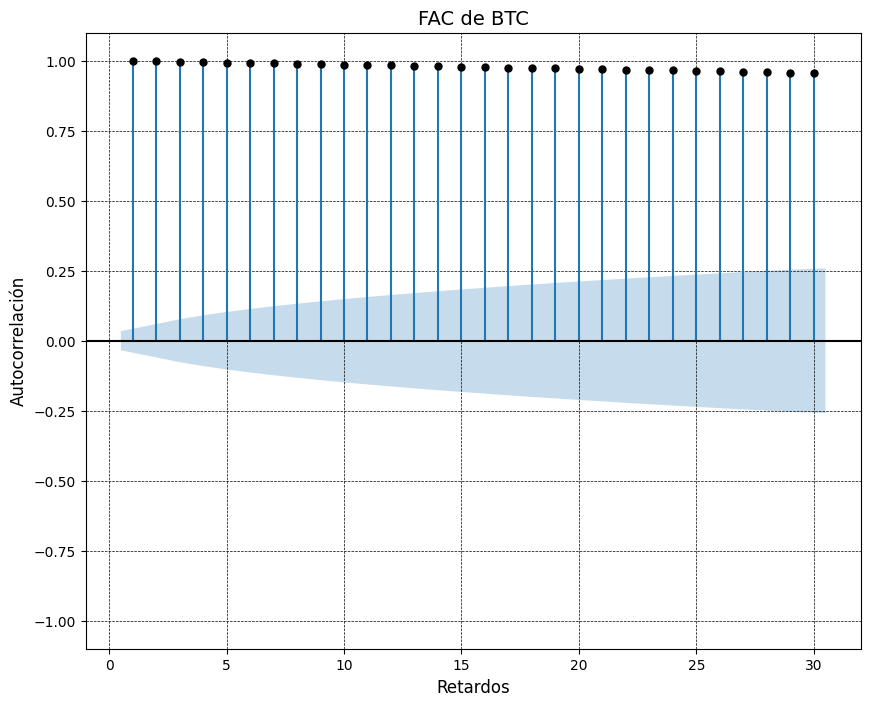

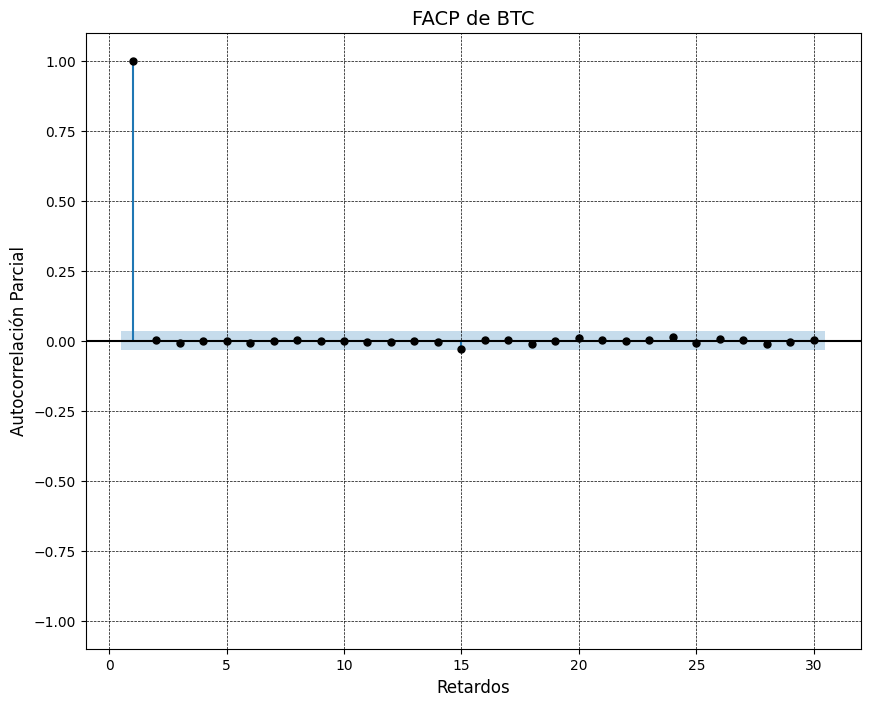

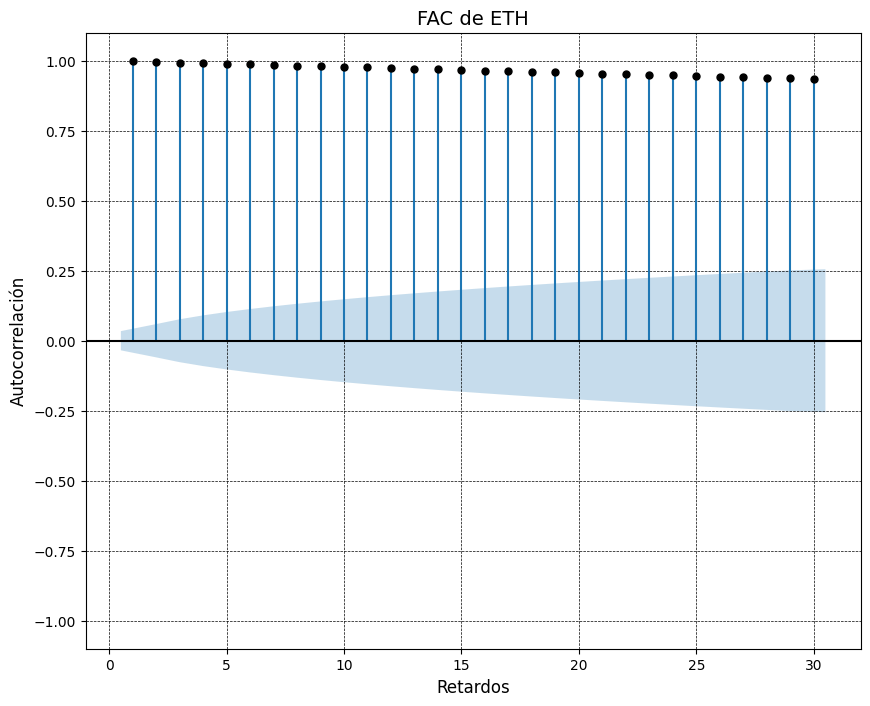

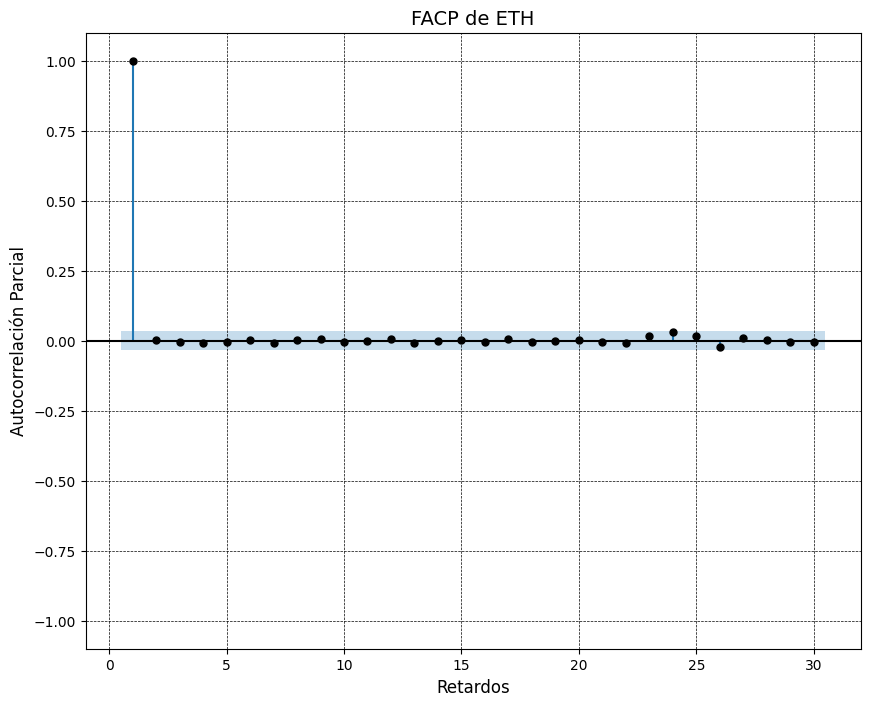

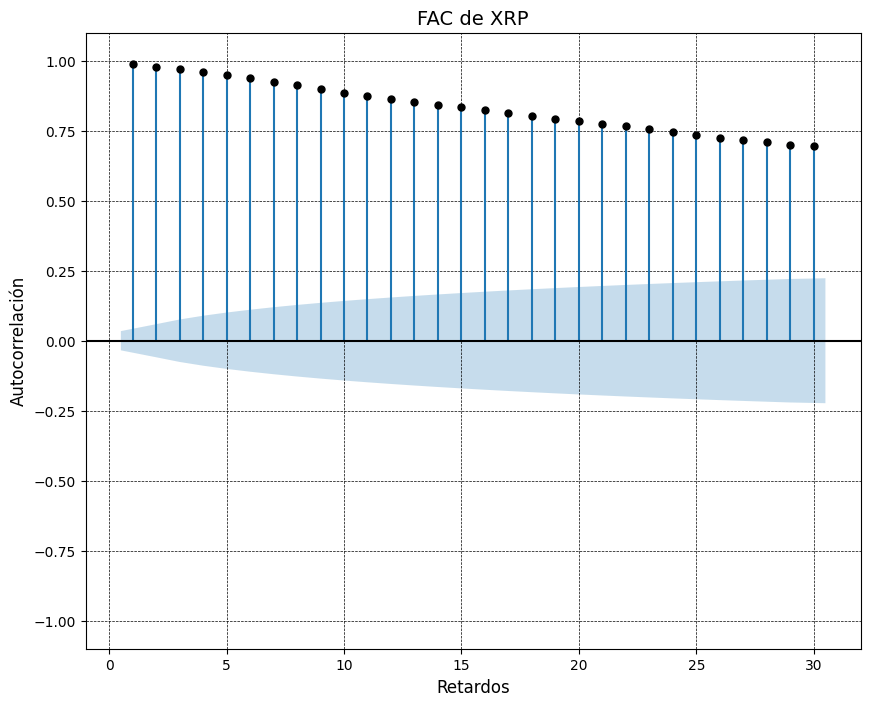

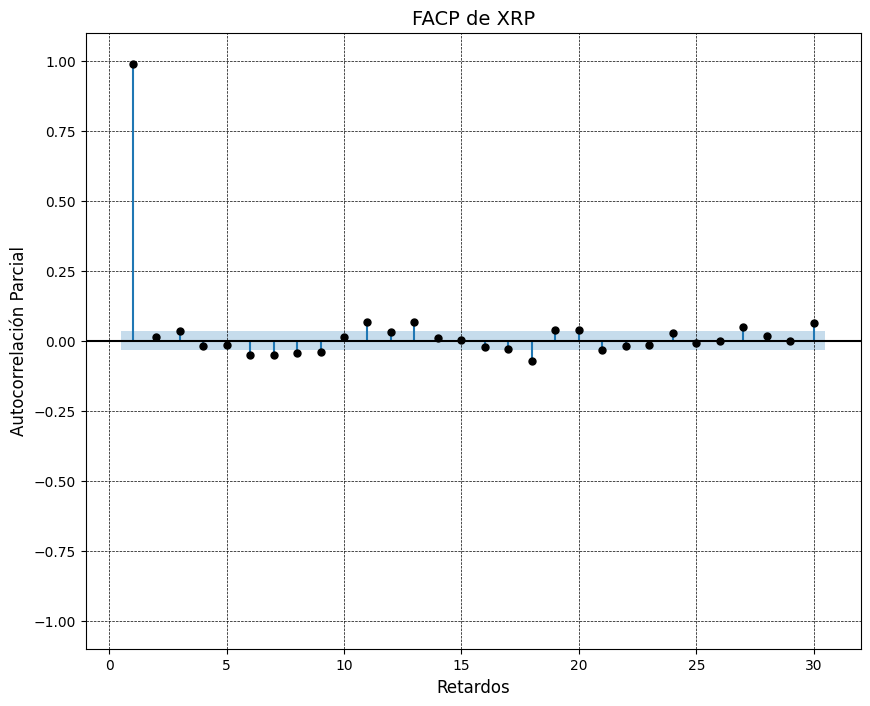

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


cripto_nombres = {
    'precio_btc': 'BTC',
    'precio_eth': 'ETH',
    'precio_xrp': 'XRP'
}


df['log_precio_btc'] = np.log(df['precio_btc'])
df['log_precio_eth'] = np.log(df['precio_eth'])


for columna, nombre in cripto_nombres.items():
    if columna == 'precio_btc':
        serie = df['log_precio_btc'].dropna()
    elif columna == 'precio_eth':
        serie = df['log_precio_eth'].dropna()
    else:
        serie = df['precio_xrp'].dropna()


    fig, ax = plt.subplots(figsize=(10, 8))
    acf_plot = plot_acf(serie, lags=30, ax=ax, zero=False, alpha=0.05)


    for line in ax.lines:
        line.set_color("black")

    for patch in ax.patches:
        patch.set_facecolor("black")

    ax.set_ylim(-1.1, 1.1)
    ax.set_title(f"FAC de {nombre}", fontsize=14)
    ax.set_xlabel("Retardos", fontsize=12)
    ax.set_ylabel("Autocorrelación", fontsize=12)
    ax.grid(True, color="black", linestyle="--", linewidth=0.5)
    plt.show()


    fig, ax = plt.subplots(figsize=(10, 8))
    pacf_plot = plot_pacf(serie, lags=30, ax=ax, method='ywm', zero=False, alpha=0.05)


    for line in ax.lines:
        line.set_color("black")

    for patch in ax.patches:
        patch.set_facecolor("black")

    ax.set_ylim(-1.1, 1.1)
    ax.set_title(f"FACP de {nombre}", fontsize=14)
    ax.set_xlabel("Retardos", fontsize=12)
    ax.set_ylabel("Autocorrelación Parcial", fontsize=12)
    ax.grid(True, color="black", linestyle="--", linewidth=0.5)
    plt.show()


En las tres FACP hay un primer palo significativo en el primer retardo que podría indicar el orden del componente autorregresivo AR. Probamos con AR(1,1,1) en los 3.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_precio_btc   No. Observations:                 3256
Model:                 ARIMA(1, 1, 1)   Log Likelihood                6144.259
Date:                Wed, 05 Mar 2025   AIC                         -12282.517
Time:                        21:12:17   BIC                         -12264.253
Sample:                             0   HQIC                        -12275.975
                               - 3256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3811      0.362     -1.052      0.293      -1.091       0.329
ma.L1          0.3494      0.365      0.956      0.339      -0.367       1.066
sigma2         0.0013   1.28e-05    104.778      0.0

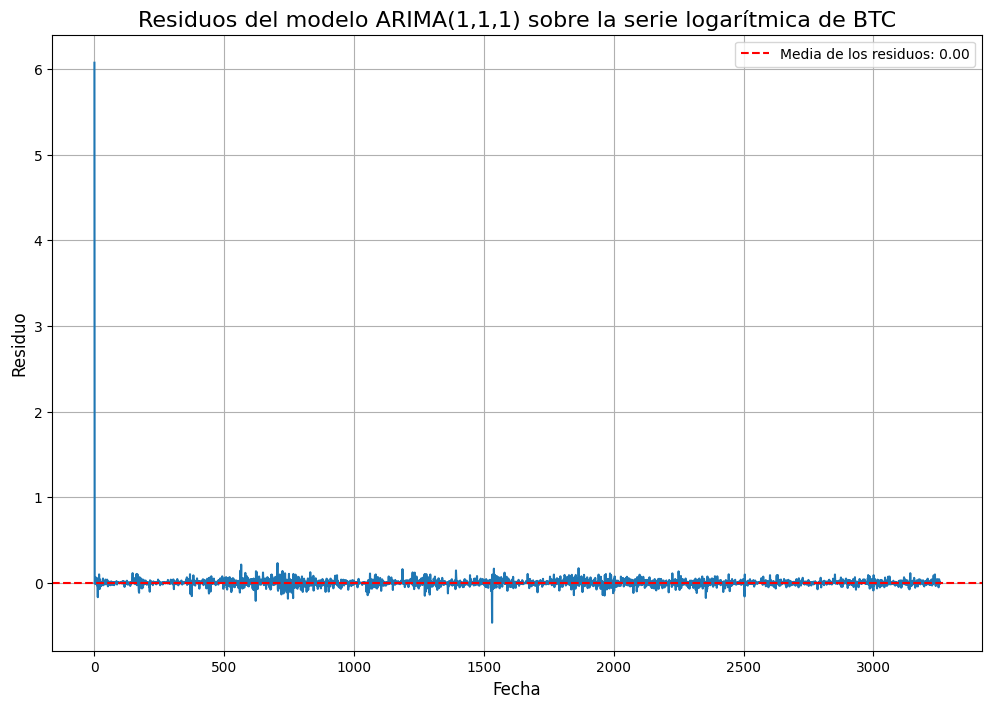

<Figure size 1400x1000 with 0 Axes>

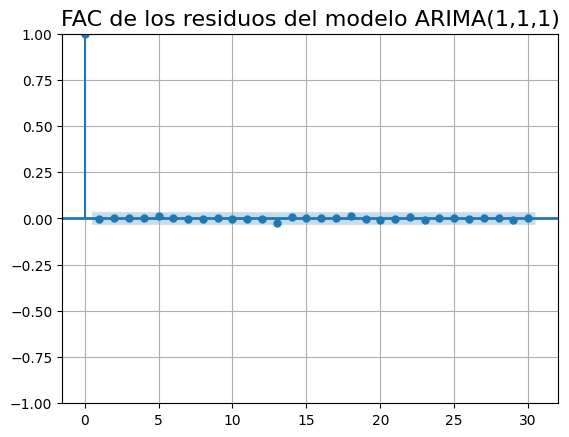

<Figure size 1400x1000 with 0 Axes>

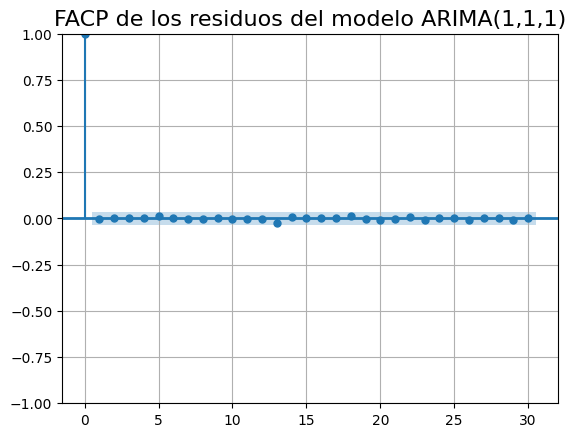

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])


model_arima_btc = ARIMA(df['log_precio_btc'], order=(1, 1, 1))
results_arima_btc = model_arima_btc.fit()


print(results_arima_btc.summary())


residuals_btc = results_arima_btc.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_btc)
plt.axhline(y=residuals_btc.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_btc.mean():.2f}')
plt.title('Residuos del modelo ARIMA(1,1,1) sobre la serie logarítmica de BTC', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_btc, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(1,1,1)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_btc, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(1,1,1)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()

Aplicando logaritmos, no se consiguen unos coeficientes significtivos porque  los p-valores de AR(1) y MA(1) son menores a 0.05. Los residuos no están correlacionados pero no siguen una distribucion normal. Tienen media 0 y la varianza parece constante, pero rechazamos el modelo por coeficientes no significativos para un nivel de significacion del 5%.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

                               SARIMAX Results                                
Dep. Variable:         log_precio_btc   No. Observations:                 3256
Model:                 ARIMA(2, 1, 1)   Log Likelihood                6145.453
Date:                Wed, 05 Mar 2025   AIC                         -12282.906
Time:                        21:24:02   BIC                         -12258.554
Sample:                             0   HQIC                        -12274.183
                               - 3256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1527      0.407      0.375      0.708      -0.646       0.951
ar.L2          0.0394      0.015      2.551      0.011       0.009       0.070
ma.L1         -0.1768      0.408     -0.433      0.6

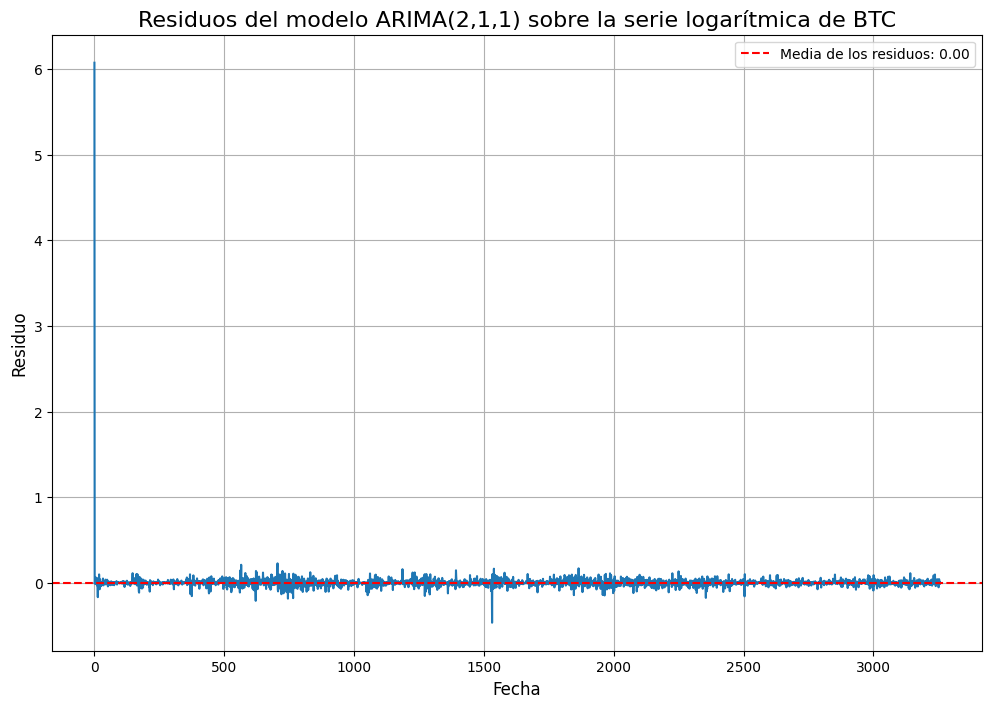

<Figure size 1400x1000 with 0 Axes>

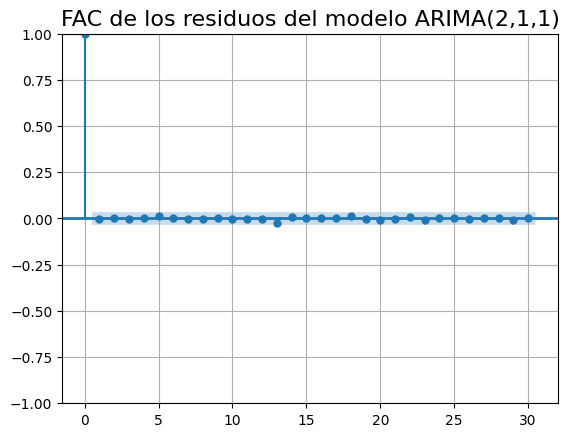

<Figure size 1400x1000 with 0 Axes>

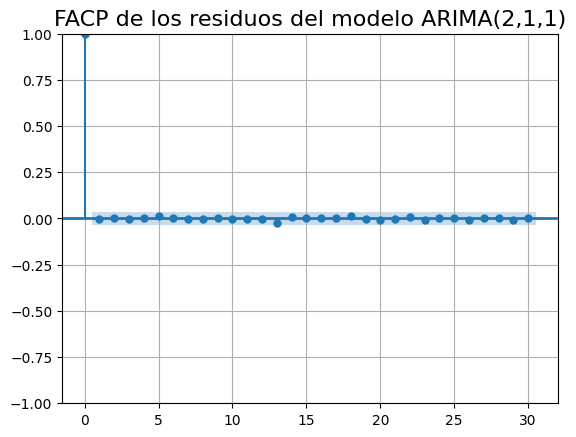

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])


model_arima_btc = ARIMA(df['log_precio_btc'], order=(2, 1, 1))
results_arima_btc = model_arima_btc.fit()


print(results_arima_btc.summary())


residuals_btc = results_arima_btc.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_btc)
plt.axhline(y=residuals_btc.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_btc.mean():.2f}')
plt.title('Residuos del modelo ARIMA(2,1,1) sobre la serie logarítmica de BTC', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_btc, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(2,1,1)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_btc, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(2,1,1)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()

Aplicando logartimos, hay solo un coeficiente significativo, el AR(2),pero el MA(1) y AR(1) no son nada significativos. Los residuos no están correlacionados, pero de nuevo no se cumple con la normalidad de los residuos. La media de los residuos es 0. El BIC es menor que el ARIMA(1,1,1) con logaritmos.

Se busca otro modelo con coeficientes más significativos.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_precio_btc   No. Observations:                 3256
Model:                 ARIMA(2, 1, 0)   Log Likelihood                6145.314
Date:                Thu, 06 Mar 2025   AIC                         -12284.628
Time:                        10:24:56   BIC                         -12266.364
Sample:                             0   HQIC                        -12278.085
                               - 3256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0239      0.012     -2.055      0.040      -0.047      -0.001
ar.L2          0.0351      0.014      2.452      0.014       0.007       0.063
sigma2         0.0013   1.28e-05    104.855      0.0

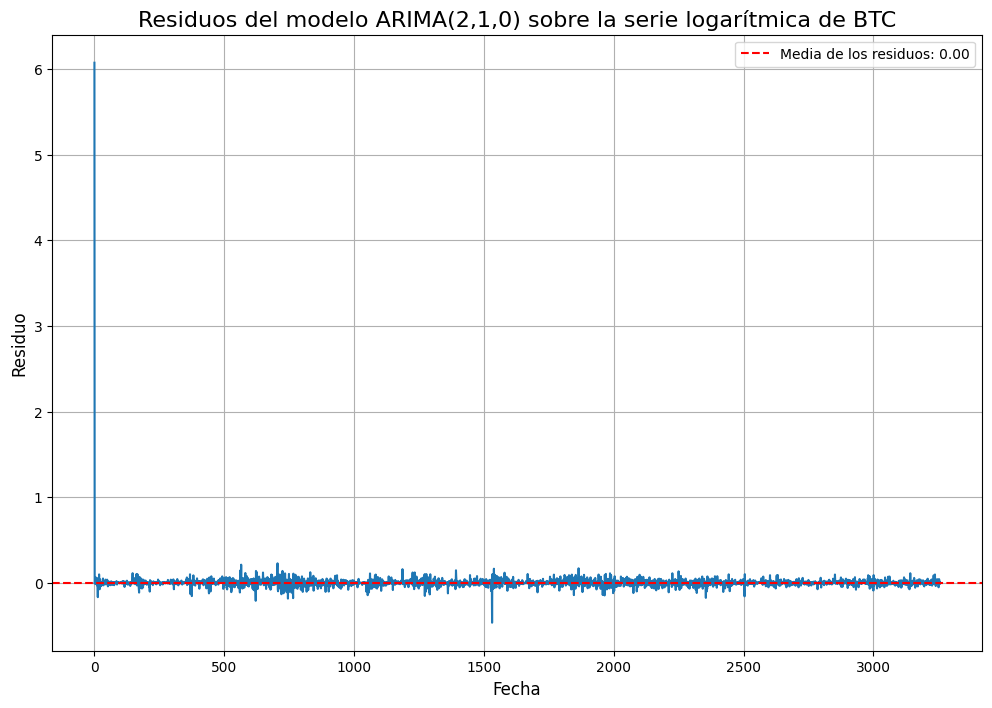

<Figure size 1400x1000 with 0 Axes>

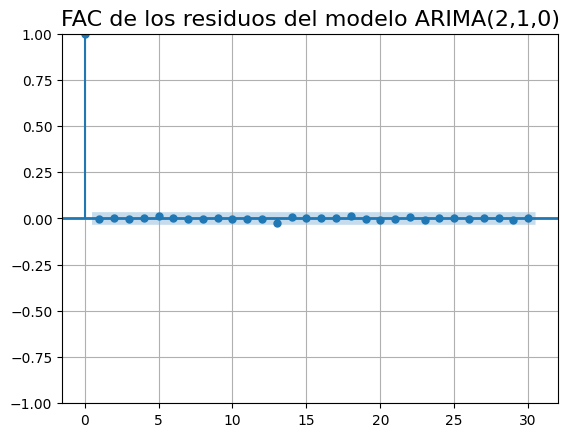

<Figure size 1400x1000 with 0 Axes>

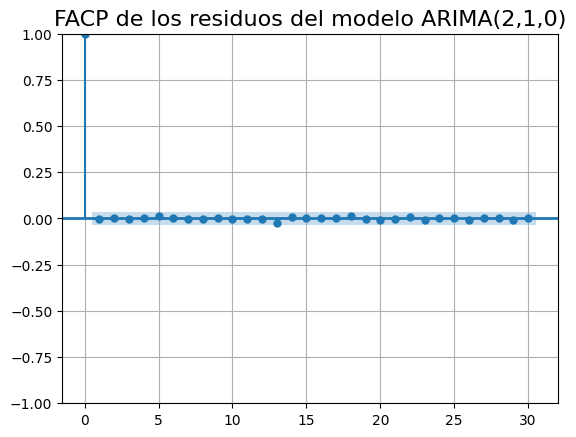

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])


model_arima_btc = ARIMA(df['log_precio_btc'], order=(2, 1, 0))
results_arima_btc = model_arima_btc.fit()


print(results_arima_btc.summary())


residuals_btc = results_arima_btc.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_btc)
plt.axhline(y=residuals_btc.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_btc.mean():.2f}')
plt.title('Residuos del modelo ARIMA(2,1,0) sobre la serie logarítmica de BTC', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_btc, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(2,1,0)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_btc, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(2,1,0)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


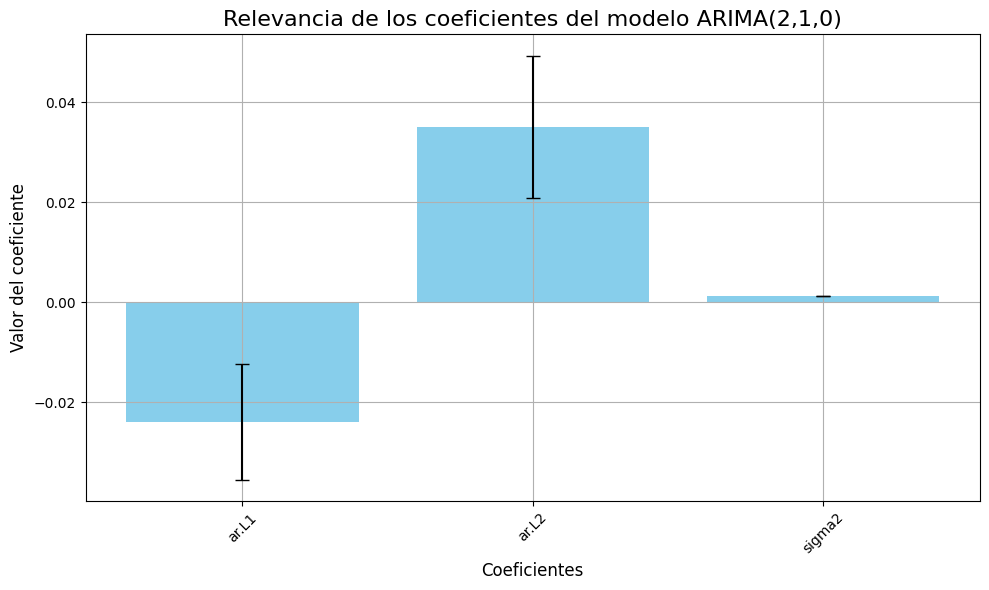

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])


model_arima_btc = ARIMA(df['log_precio_btc'], order=(2, 1, 0))
results_arima_btc = model_arima_btc.fit()


coefficients = results_arima_btc.params
std_err = results_arima_btc.bse


plt.figure(figsize=(10, 6))
plt.bar(coefficients.index, coefficients.values, yerr=std_err, capsize=5, color='skyblue', edgecolor='none')
plt.title('Relevancia de los coeficientes del modelo ARIMA(2,1,0)', fontsize=16)
plt.xlabel('Coeficientes', fontsize=12)
plt.ylabel('Valor del coeficiente', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Los dos coeficientes son significativos por p-valor menor a 0.05. Se cumple con la no correlacion de residuos pero no con la normalidad de los residuos en el test de JB, aunque podemos hablar de una simetria de los residuos teniendo en cuenta la asimetria tan baja. La media de los residuos es 0 y la varianza parece constante. En la FAC y FACP de los residuos no hay palos significativos, por lo que vemos no correlacion entre ellos en diferentes retardos.  Además, se puede explicar con la FACP porque hay dos palos significativos, en el retardo 1 y 15. Tiene el AIC y el BIC más bajo.

Ha sido necesario aplicar logaritmos porque era la única manera de que la media de los residuos fuese cercana a 0, porque de lo contrario, para los tres modelos probados hasta ahora la media era cercana a 30.

Recurriendo a la funcion auto-arima, era el modelo recomendado y coincide con el análisis porque se cumplen todos los requisitos

In [ ]:
import pandas as pd
from scipy.stats import kruskal


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


precios = ['precio_btc', 'precio_eth', 'precio_xrp']


resultados_kruskal = {}

for precio in precios:

    df['mes'] = df.index.month


    grupos = [df[df['mes'] == mes][precio].dropna() for mes in range(1, 13)]


    test_kw = kruskal(*grupos)


    resultados_kruskal[precio] = {
        "Estadístico": test_kw.statistic,
        "p-valor": test_kw.pvalue
    }


for precio, resultado in resultados_kruskal.items():
    print(f"\n📌 Test de Kruskal-Wallis para {precio.upper()}:")
    print(f"   ➡️ Estadístico: {resultado['Estadístico']:.4f}")
    print(f"   ➡️ p-valor: {resultado['p-valor']:.4f}")

    if resultado["p-valor"] < 0.05:
        print("   ❌ Hay diferencias significativas → Posible estacionalidad en la serie.")
    else:
        print("   ✅ No hay diferencias significativas → No hay evidencia clara de estacionalidad.")


📌 Test de Kruskal-Wallis para PRECIO_BTC:
   ➡️ Estadístico: 12.9849
   ➡️ p-valor: 0.2943
   ✅ No hay diferencias significativas → No hay evidencia clara de estacionalidad.

📌 Test de Kruskal-Wallis para PRECIO_ETH:
   ➡️ Estadístico: 31.0166
   ➡️ p-valor: 0.0011
   ❌ Hay diferencias significativas → Posible estacionalidad en la serie.

📌 Test de Kruskal-Wallis para PRECIO_XRP:
   ➡️ Estadístico: 24.9358
   ➡️ p-valor: 0.0093
   ❌ Hay diferencias significativas → Posible estacionalidad en la serie.


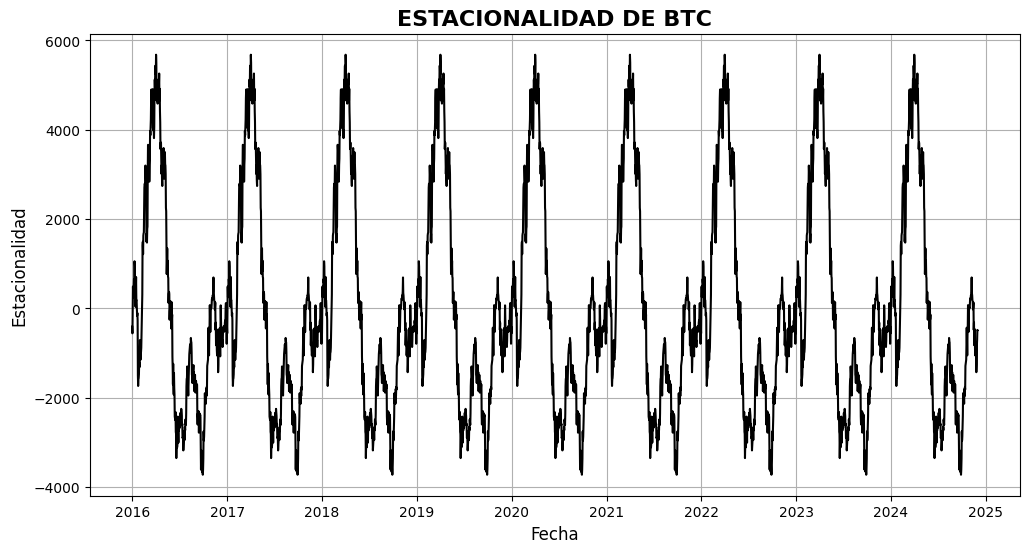

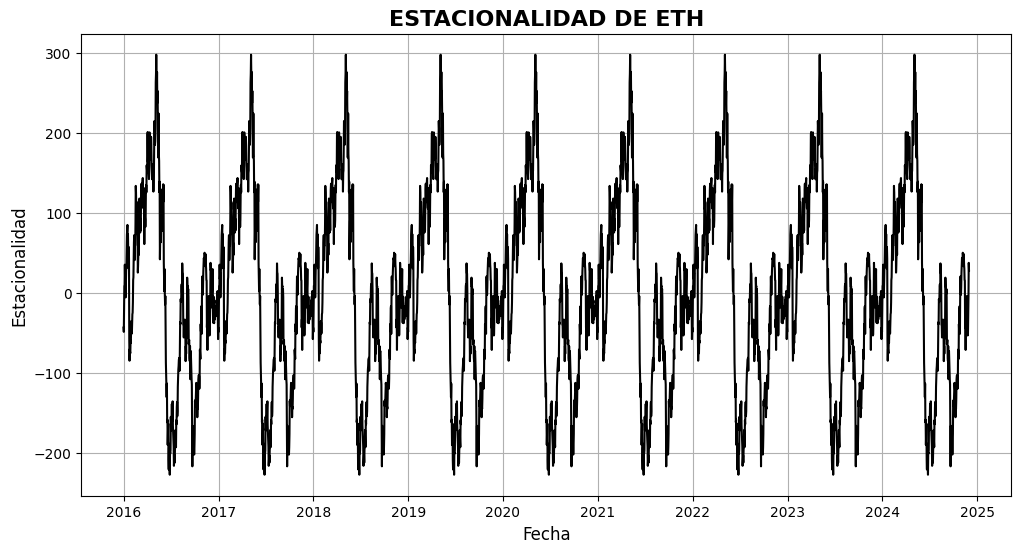

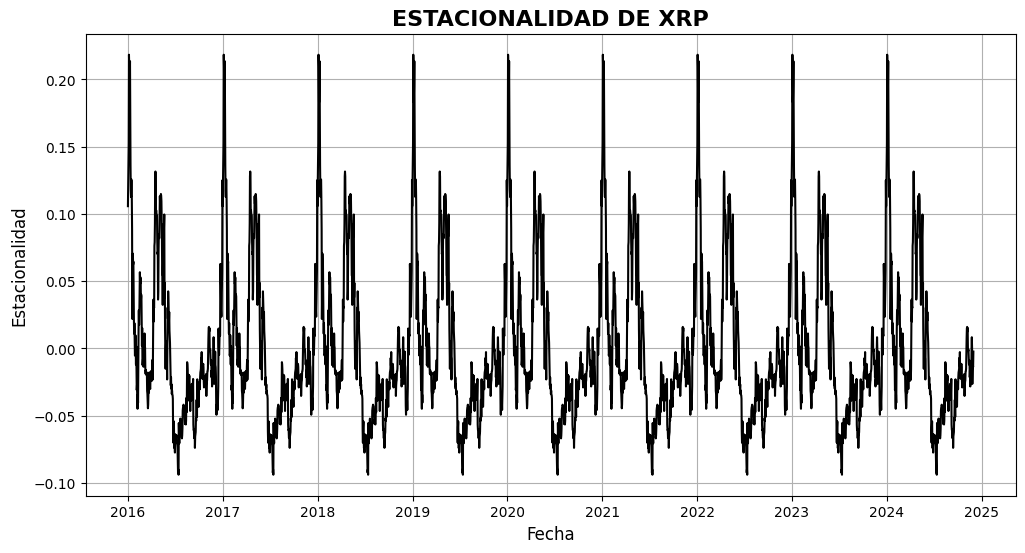

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


series = {'precio_btc': 'BTC', 'precio_eth': 'ETH', 'precio_xrp': 'XRP'}


periodo_estacionalidad = 365


for serie, nombre in series.items():

    descomposicion = seasonal_decompose(df[serie].dropna(), model='additive', period=periodo_estacionalidad)


    plt.figure(figsize=(12, 6))
    plt.plot(descomposicion.seasonal, color="black")
    plt.title(f"ESTACIONALIDAD DE {nombre}", fontsize=16, fontweight="bold")
    plt.xlabel("Fecha", fontsize=12)
    plt.ylabel("Estacionalidad", fontsize=12)
    plt.grid()
    plt.show()


Parece haber un componente estacional que se repite cada año pero que es constante y que tampoco hay tendencias a largo plazo.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:         log_precio_btc   No. Observations:                 3255
Model:               SARIMAX(2, 1, 0)   Log Likelihood                7043.168
Date:                Wed, 05 Mar 2025   AIC                         -14050.337
Time:                        22:19:21   BIC                         -13940.759
Sample:                    01-03-2016   HQIC                        -14011.084
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
precio_xrp_diff       -0.0017   1.56e-24  -1.11e+21      0.000      -0.002      -0.002
volumen_btc_diff    1.018e-13   2.49e-14      4.088      0.000     5.3e-14    1.51e-13
indice_dolar _diff -

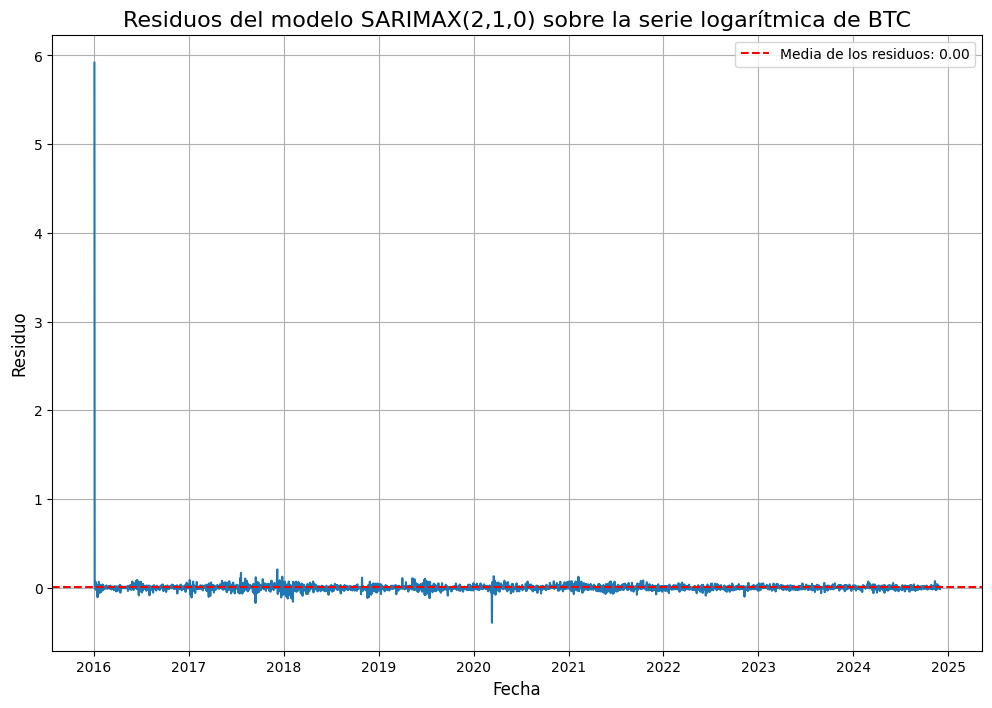

<Figure size 1400x1000 with 0 Axes>

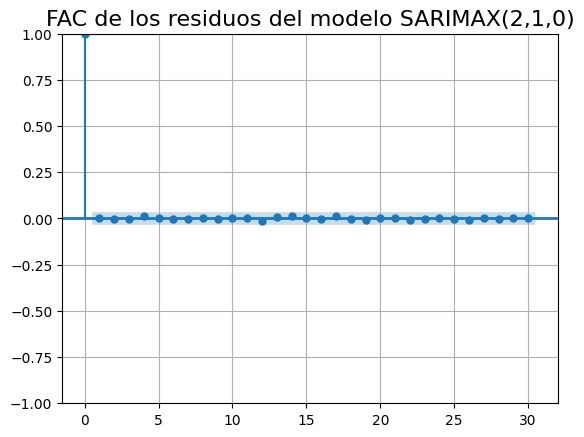

<Figure size 1400x1000 with 0 Axes>

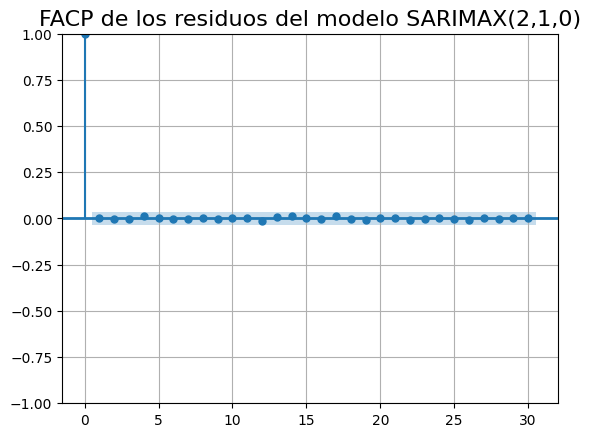

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])



diff_vars = ['precio_xrp', 'volumen_btc', 'indice_dolar ', 'int_FED', 'volumen_eth',
             'M2', 'IPC', 'oro', 'SP500', 'eurostoxx', 'precio_eth']

for var in diff_vars:
    df[f'{var}_diff'] = df[var].diff().dropna()


no_diff_vars = ['sentimiento', 'RSI', 'vix', 'volumen_xrp']


exog_vars = df[[f'{var}_diff' for var in diff_vars] + no_diff_vars]


df_clean = df.dropna(subset=[f'{var}_diff' for var in diff_vars] + no_diff_vars)
exog_vars_clean = exog_vars.loc[df_clean.index]


model_sarimax_btc = SARIMAX(df_clean['log_precio_btc'],
                            order=(2, 1, 0),
                            exog=exog_vars_clean)
results_sarimax_btc = model_sarimax_btc.fit()


print(results_sarimax_btc.summary())


residuals_sarimax_btc = results_sarimax_btc.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_sarimax_btc)
plt.axhline(y=residuals_sarimax_btc.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_sarimax_btc.mean():.2f}')
plt.title('Residuos del modelo SARIMAX(2,1,0) sobre la serie logarítmica de BTC', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_sarimax_btc, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo SARIMAX(2,1,0)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_sarimax_btc, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo SARIMAX(2,1,0)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()



Si vemos el modelo SARIMAX con todas las variables exogenas incluidas, vemos que todos los coeficientes son altamente significativos para un nivel de significacion del 5% menos el volumen de XRP y de ETH. Se cumple con la no correlacion de los residuos y con la normalidad si tenemos en cuenta la baja asimetria. Los residuos parecen seguir un ruido blanco por baja media 0 y varianza constante. Parece mejor añadir el resto de variables exogenas porque el AIC y BIC disminyen significativamente, por lo que en principio parece mejor modelo. El orden del modelo estacional es (0,0,0) porque si vemos el modelo recomendado por la funcion auto_arima es (2,1,0) (0,0,0) por lo que se cumple el test de Krustal Wallis de que no habia componente estacional.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-12278.861, Time=25.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-12282.605, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-12281.006, Time=1.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-12280.865, Time=5.82 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-12277.901, Time=0.17 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-12280.639, Time=1.61 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=-12280.652, Time=3.84 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=-12278.681, Time=2.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-12282.954, Time=0.21 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-12281.013, Time=9.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=-12279.008, Time=3.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-12284.491, Time=1.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=-12282.524, Time=11.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=-12282.523, Time=3.40 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=-12280.578, Time=6.77 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=-12282.548, Time=1.95 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-12282.603, Time=1.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-12282.879, Time=1.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=-12280.553, Time=1.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12]             : AIC=-12279.896, Time=0.55 sec

Best model:  ARIMA(2,1,0)(0,0,0)[12] intercept
Total fit time: 83.239 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3255
Model:               SARIMAX(2, 1, 0)   Log Likelihood                6146.246
Date:                Wed, 05 Mar 2025   AIC                         -12284.491
Time:                        22:47:17   BIC                         -12260.141
Sample:                    01-03-2016   HQIC                        -12275.769
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0016      0.001      2.524      0.012       0

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


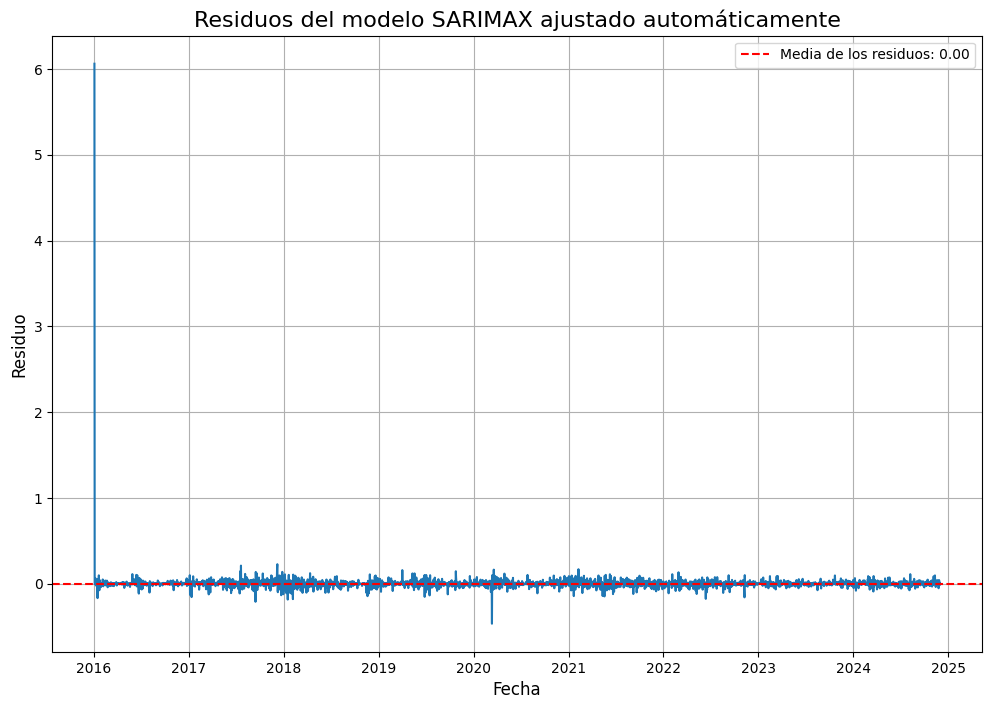

<Figure size 1400x1000 with 0 Axes>

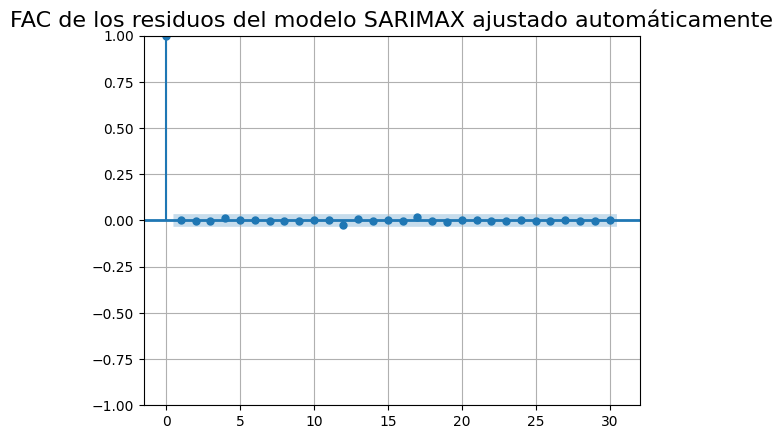

<Figure size 1400x1000 with 0 Axes>

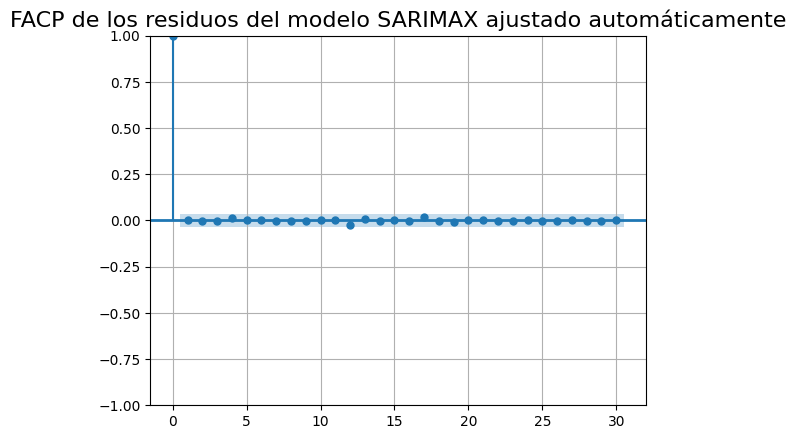

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import seaborn as sns


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])



diff_vars = ['precio_xrp', 'volumen_btc', 'indice_dolar ', 'int_FED', 'volumen_eth',
             'M2', 'IPC', 'oro', 'SP500', 'eurostoxx', 'precio_eth']

for var in diff_vars:
    df[f'{var}_diff'] = df[var].diff().dropna()


no_diff_vars = ['sentimiento', 'RSI', 'vix', 'volumen_xrp']


exog_vars = df[[f'{var}_diff' for var in diff_vars] + no_diff_vars]


df_clean = df.dropna(subset=[f'{var}_diff' for var in diff_vars] + no_diff_vars)
exog_vars_clean = exog_vars.loc[df_clean.index]


model_auto = auto_arima(df_clean['log_precio_btc'],
                        exogenous=exog_vars_clean,
                        seasonal=True,
                        m=12,
                        stepwise=True,
                        trace=True)


print(model_auto.summary())


model_auto.fit(df_clean['log_precio_btc'], exogenous=exog_vars_clean)


residuals_auto = model_auto.resid()


plt.figure(figsize=(12, 8))
plt.plot(residuals_auto)
plt.axhline(y=residuals_auto.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_auto.mean():.2f}')
plt.title('Residuos del modelo SARIMAX ajustado automáticamente', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_auto, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo SARIMAX ajustado automáticamente', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_auto, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo SARIMAX ajustado automáticamente', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


Como solo estos dos modelos cumplen todos los requisitos de Box Jenkins vamos a comparar ajuste del modelo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])


diff_vars = ['precio_xrp', 'volumen_btc', 'indice_dolar ', 'int_FED', 'volumen_eth', 'M2', 'IPC', 'oro', 'SP500', 'eurostoxx', 'precio_eth']


for var in diff_vars:
    df[f'{var}_diff'] = df[var].diff().dropna()


no_diff_vars = ['sentimiento', 'RSI', 'vix', 'volumen_xrp']


exog_vars = df[[f'{var}_diff' for var in diff_vars] + no_diff_vars]


df_clean = df.dropna(subset=[f'{var}_diff' for var in diff_vars] + no_diff_vars)
exog_vars_clean = exog_vars.loc[df_clean.index]


model_sarimax_btc = SARIMAX(df_clean['log_precio_btc'],
                            order=(2, 1, 0),
                            exog=exog_vars_clean)
results_sarimax_btc = model_sarimax_btc.fit()


fitted_values = results_sarimax_btc.fittedvalues


fitted_values_original = np.exp(fitted_values)
actual_values_original = np.exp(df_clean['log_precio_btc'])

rmse_sarimax = np.sqrt(mean_squared_error(actual_values_original, fitted_values_original))
print(f"RMSE del modelo SARIMAX (2, 1, 0): {rmse_sarimax:.4f}")


mape_sarimax = mean_absolute_percentage_error(actual_values_original, fitted_values_original)
print(f"MAPE del modelo SARIMAX (2, 1, 0): {mape_sarimax * 100:.4f}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE del modelo SARIMAX (2, 1, 0): 673.9687
MAPE del modelo SARIMAX (2, 1, 0): 1.8979


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])
df.set_index('fecha', inplace=True)


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])


model_arima_btc = ARIMA(df['log_precio_btc'], order=(2, 1, 0))
results_arima_btc = model_arima_btc.fit()


predictions = results_arima_btc.predict(start=0, end=len(df)-1)


predicted_values = np.exp(predictions)
actual_values = np.exp(df['log_precio_btc'])


rmse_arima = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE del modelo ARIMA (2, 1, 0): {rmse_arima:.4f}")


mape_arima = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE del modelo ARIMA (2, 1, 0): {mape_arima * 100:.4f}%")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE del modelo ARIMA (2, 1, 0): 986.5808
MAPE del modelo ARIMA (2, 1, 0): 2.4279%


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


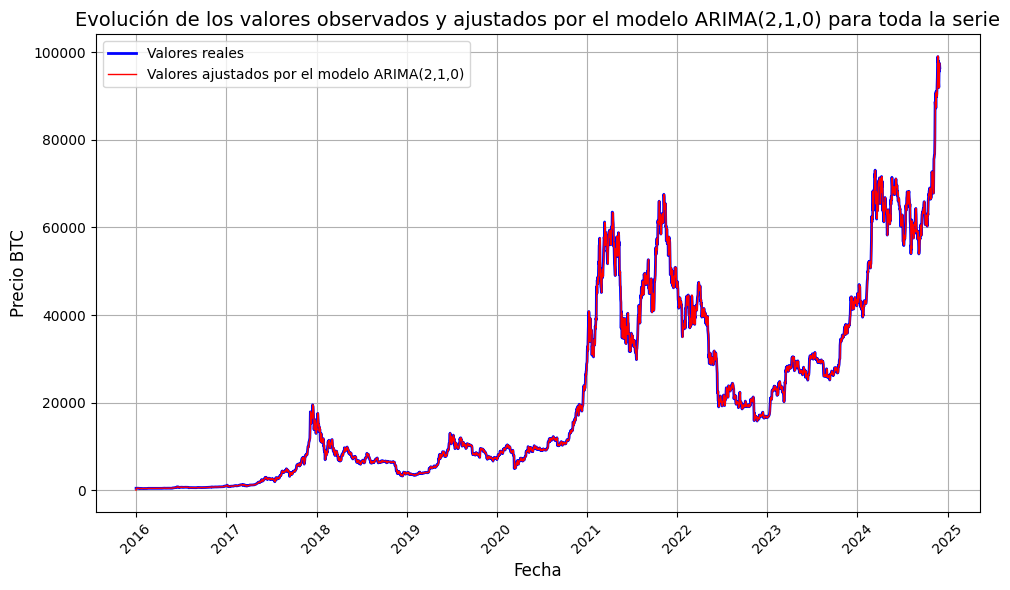

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


archivo_completo = "DatosTFG.xlsx"
df_completo = pd.read_excel(archivo_completo)


df_completo['fecha'] = pd.to_datetime(df_completo['fecha'], format='%d/%m/%Y')
df_completo.set_index('fecha', inplace=True)


df_completo['log_precio_btc'] = np.log(df_completo['precio_btc'])


modelo_arima_completo = ARIMA(df_completo['log_precio_btc'], order=(2, 1, 0))
modelo_ajustado_completo = modelo_arima_completo.fit()


valores_ajustados_completo = modelo_ajustado_completo.fittedvalues


plt.figure(figsize=(10, 6))


plt.plot(df_completo.index, df_completo['precio_btc'], label='Valores reales', color='blue', linewidth=2)


plt.plot(df_completo.index, np.exp(valores_ajustados_completo), label='Valores ajustados por el modelo ARIMA(2,1,0)', color='red', linewidth=1)


plt.title('Evolución de los valores observados y ajustados por el modelo ARIMA(2,1,0) para toda la serie', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio BTC', fontsize=12)


plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)
df = df.asfreq('D', method='pad')


df['log_precio_btc'] = np.log(df['precio_btc'])


model_arima_btc = ARIMA(df['log_precio_btc'], order=(2, 1, 0))
results_arima_btc = model_arima_btc.fit()


predicciones_log = results_arima_btc.get_forecast(steps=5)
predicciones_log_mean = predicciones_log.predicted_mean


predicciones_btc = np.exp(predicciones_log_mean)


print(predicciones_btc)


2024-12-01    96536.532083
2024-12-02    96499.096436
2024-12-03    96503.058715
2024-12-04    96501.651471
2024-12-05    96501.824047
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd


archivo_diciembre = "Datos reales diciembre 2024.xlsx"
df_diciembre = pd.read_excel(archivo_diciembre)


df_diciembre['fecha'] = pd.to_datetime(df_diciembre['fecha'], dayfirst=True)


df_diciembre['precio_btc'] = df_diciembre['precio_btc'].replace({',': ''}, regex=True).astype(float)


df_diciembre.set_index('fecha', inplace=True)


print(df_diciembre['precio_btc'])


fecha
2024-12-01    97201.4
2024-12-02    95846.6
2024-12-03    95898.7
2024-12-04    98635.8
2024-12-05    96970.8
Name: precio_btc, dtype: float64


DIFERENCIA ENTRE EL VALOR PREDICHO Y EL REAL:

Fecha         | Valor Real  | Valor Predicho   | Diferencia   | Variación (%)
2024-12-01    | 97201.4     | 96536.532083     | 664.867917   | 0.684011
2024-12-02    | 95846.6     | 96499.096436     | -652.496436  | -0.680772
2024-12-03    | 95898.7     | 96503.058715     | -604.358715  | -0.630205
2024-12-04    | 98635.8     | 96501.651471     | 2134.148529  | 2.163665
2024-12-05    | 96970.8     | 96501.824047     | 468.975953   | 0.483626




Parece que la prediccion es bastante acertada pero vamos a compara con SARIMAX para ver si la prediccion con variables exogenas es mejor.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


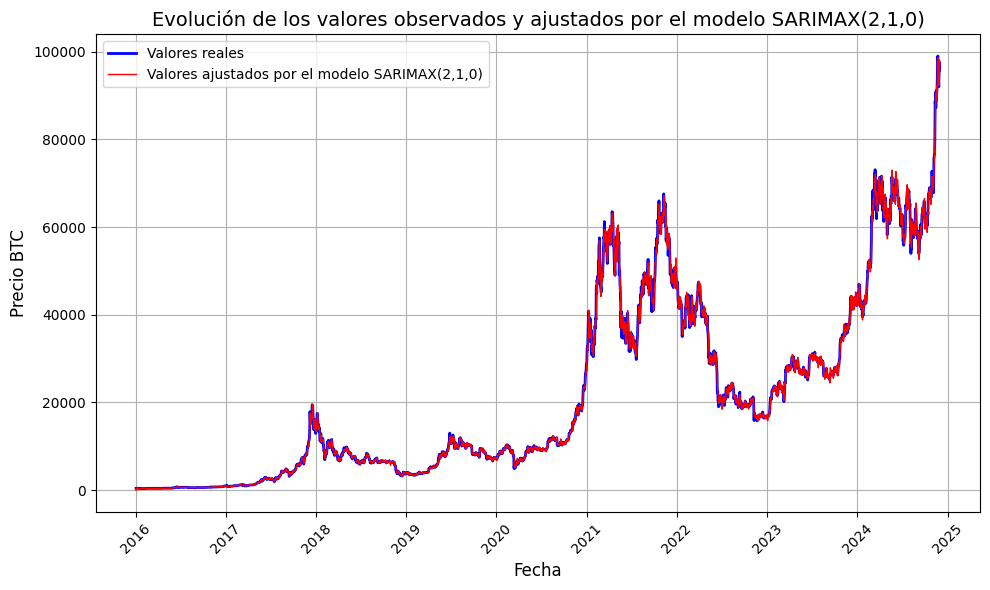

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])



diff_vars = ['precio_xrp', 'volumen_btc', 'indice_dolar ', 'int_FED', 'volumen_eth',
             'M2', 'IPC', 'oro', 'SP500', 'eurostoxx', 'precio_eth']

for var in diff_vars:
    df[f'{var}_diff'] = df[var].diff().dropna()


no_diff_vars = ['sentimiento', 'RSI', 'vix', 'volumen_xrp']


exog_vars = df[[f'{var}_diff' for var in diff_vars] + no_diff_vars]


df_clean = df.dropna(subset=[f'{var}_diff' for var in diff_vars] + no_diff_vars)
exog_vars_clean = exog_vars.loc[df_clean.index]


model_sarimax_btc = SARIMAX(df_clean['log_precio_btc'],
                            order=(2, 1, 0),
                            exog=exog_vars_clean)
results_sarimax_btc = model_sarimax_btc.fit()


valores_ajustados_sarimax = results_sarimax_btc.fittedvalues


plt.figure(figsize=(10, 6))


plt.plot(df_clean.index, np.exp(df_clean['log_precio_btc']), label='Valores reales', color='blue', linewidth=2)


plt.plot(df_clean.index, np.exp(valores_ajustados_sarimax), label='Valores ajustados por el modelo SARIMAX(2,1,0)', color='red', linewidth=1)


plt.title('Evolución de los valores observados y ajustados por el modelo SARIMAX(2,1,0)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio BTC', fontsize=12)


plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


Aparentemente está un poco menos ajustado que el ARIMA(2,1,0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_btc'] = np.log(df['precio_btc'])


df['log_precio_btc_diff'] = df['log_precio_btc'].diff().dropna()


df = df.dropna(subset=['log_precio_btc_diff'])



diff_vars = ['precio_xrp', 'volumen_btc', 'indice_dolar ', 'int_FED', 'volumen_eth',
             'M2', 'IPC', 'oro', 'SP500', 'eurostoxx', 'precio_eth']

for var in diff_vars:
    df[f'{var}_diff'] = df[var].diff().dropna()


no_diff_vars = ['sentimiento', 'RSI', 'vix', 'volumen_xrp']


exog_vars = df[[f'{var}_diff' for var in diff_vars] + no_diff_vars]


df_clean = df.dropna(subset=[f'{var}_diff' for var in diff_vars] + no_diff_vars)
exog_vars_clean = exog_vars.loc[df_clean.index]


model_sarimax_btc = SARIMAX(df_clean['log_precio_btc'],
                            order=(2, 1, 0),
                            exog=exog_vars_clean)
results_sarimax_btc = model_sarimax_btc.fit()





fechas_predicciones = pd.date_range(df_clean.index[-1], periods=6, freq='D')[1:]



exog_futuras = exog_vars_clean[-5:]


predicciones = results_sarimax_btc.predict(start=df_clean.index[-1] + pd.Timedelta(days=1),
                                           end=df_clean.index[-1] + pd.Timedelta(days=5),
                                           exog=exog_futuras)


predicciones_exp = np.exp(predicciones)
print("Predicciones de los próximos 5 días:")
print(predicciones_exp)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicciones de los próximos 5 días:
2024-12-01    93773.286077
2024-12-02    97660.325298
2024-12-03    95715.546960
2024-12-04    96139.288005
2024-12-05    96451.976156
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd


archivo_diciembre = "Datos reales diciembre 2024.xlsx"
df_diciembre = pd.read_excel(archivo_diciembre)


df_diciembre['fecha'] = pd.to_datetime(df_diciembre['fecha'], dayfirst=True)


df_diciembre['precio_btc'] = df_diciembre['precio_btc'].replace({',': ''}, regex=True).astype(float)


df_diciembre.set_index('fecha', inplace=True)


print(df_diciembre['precio_btc'])

fecha
2024-12-01    97201.4
2024-12-02    95846.6
2024-12-03    95898.7
2024-12-04    98635.8
2024-12-05    96970.8
Name: precio_btc, dtype: float64


Fecha         | Valor Real  | Valor Predicho   | Diferencia   | Variación (%)
2024-12-01    | 97201.4     | 93773.286077     | 3438.113923  | 3.54%
2024-12-02    | 95846.6     | 97660.325298     | -1813.725698 | -1.89%
2024-12-03    | 95898.7     | 95715.546960     | 183.153040   | 0.19%
2024-12-04    | 98635.8     | 96139.288005     | 2496.511995  | 2.53%
2024-12-05    | 96970.8     | 96451.976156     | 518.823844   | 0.53%

La predicción es pero para todo los días menos para el 3 de diciembre, por lo que nos quedamos con ARIMA (2,1,0). A pesar de que el modelo se ajuste mejor por un menor AIC, BIC, RMSE y MAPE la prediccion para esos 5 dias es peor.

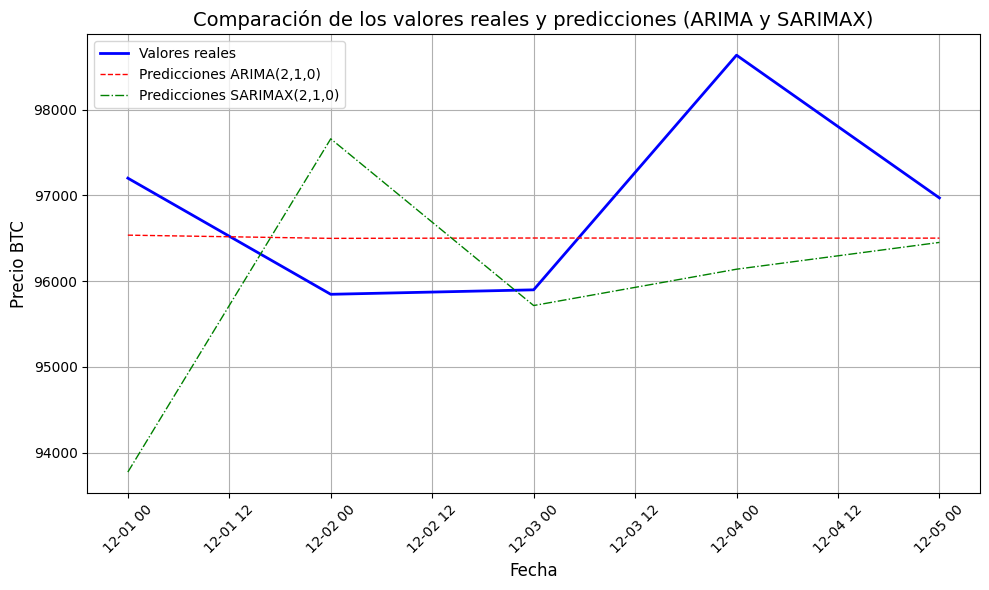

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


fechas = ['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05']
valor_real = [97201.4, 95846.6, 95898.7, 98635.8, 96970.8]


valor_predicho_arima = [96536.532083, 96499.096436, 96503.058715, 96501.651471, 96501.824047]


valor_predicho_sarimax = [93773.286077, 97660.325298, 95715.546960, 96139.288005, 96451.976156]


fechas = pd.to_datetime(fechas)


plt.figure(figsize=(10, 6))


plt.plot(fechas, valor_real, label='Valores reales', color='blue', linewidth=2)


plt.plot(fechas, valor_predicho_arima, label='Predicciones ARIMA(2,1,0)', color='red', linestyle='--', linewidth=1)


plt.plot(fechas, valor_predicho_sarimax, label='Predicciones SARIMAX(2,1,0)', color='green', linestyle='-.', linewidth=1)


plt.title('Comparación de los valores reales y predicciones (ARIMA y SARIMAX)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio BTC', fontsize=12)


plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


Se ve que el ARIMA tiende a tener una tendencia más constante en la prediccion porque depende unicamente de los retardos pasados de su misma variable y no está influido por otras variables. Aun no teniendo el AIC y BIC más bajo tiene mejores predicciones y se cumplen todos los requisitos.

Se ve que en la FACP el primer retardo es significativo y despues la autocorrelacion parcial parece disminuir a 0, por lo que no hay dependencias significativas en retardos posterirores por lo que podria ser un AR(1). Podría ser MA(1) por la existencia de una autocorrelacion alta en los primeros retardos.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_precio_eth   No. Observations:                 3256
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4996.201
Date:                Thu, 06 Mar 2025   AIC                          -9986.402
Time:                        16:47:01   BIC                          -9968.138
Sample:                             0   HQIC                         -9979.860
                               - 3256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3228      3.675      0.088      0.930      -6.881       7.526
ma.L1         -0.3202      3.679     -0.087      0.931      -7.530       6.890
sigma2         0.0027   2.99e-05     90.792      0.0

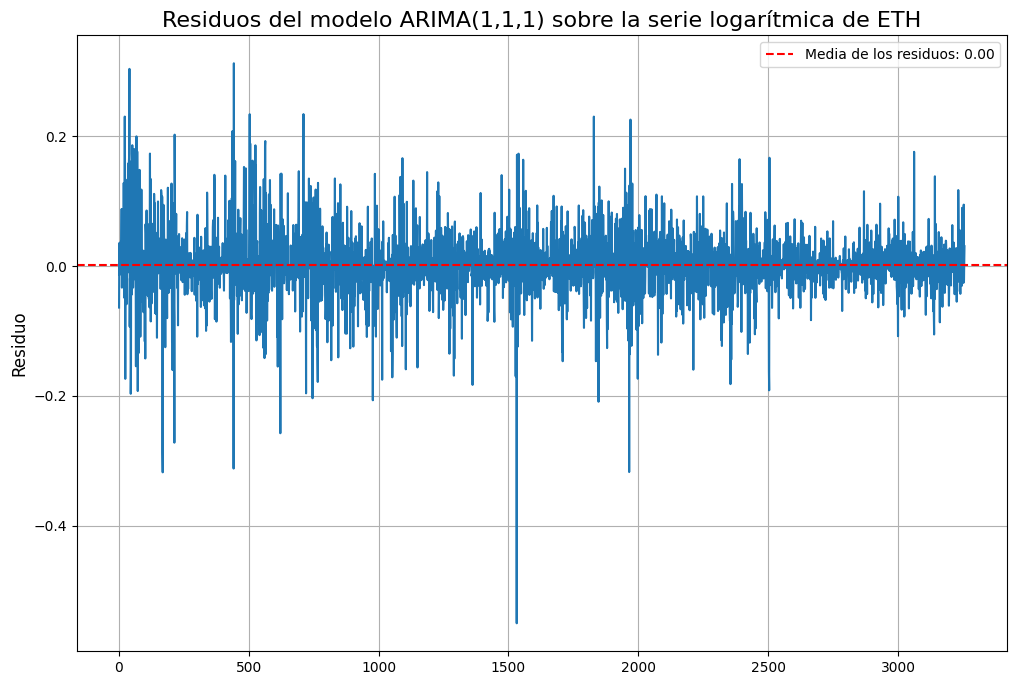

<Figure size 1400x1000 with 0 Axes>

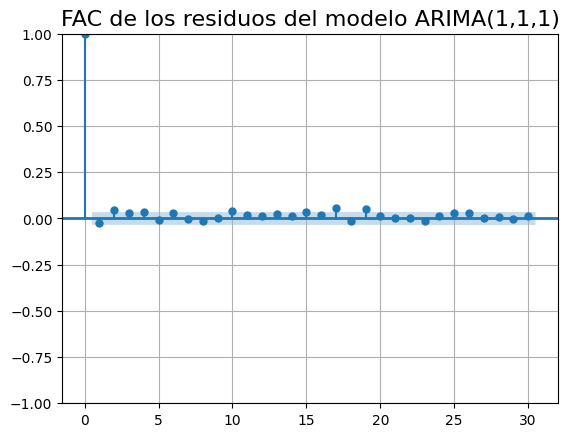

<Figure size 1400x1000 with 0 Axes>

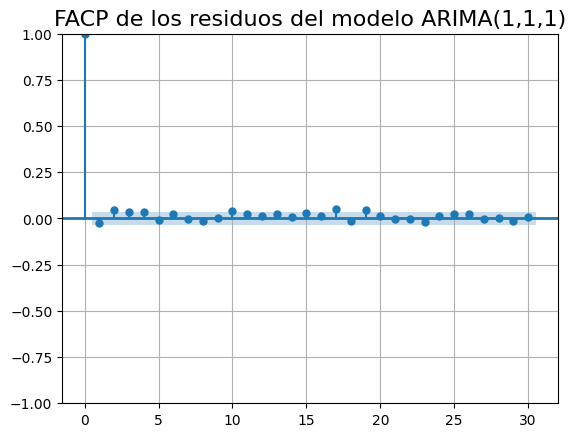

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df['log_precio_eth'] = np.log(df['precio_eth'])


df['log_precio_eth_diff'] = df['log_precio_eth'].diff().dropna()


df = df.dropna(subset=['log_precio_eth_diff'])


model_arima_eth = ARIMA(df['log_precio_eth'], order=(1, 1, 1))
results_arima_eth = model_arima_eth.fit()


print(results_arima_eth.summary())


residuals_eth = results_arima_eth.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_eth)
plt.axhline(y=residuals_eth.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_eth.mean():.2f}')
plt.title('Residuos del modelo ARIMA(1,1,1) sobre la serie logarítmica de ETH', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_eth, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(1,1,1)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_eth, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(1,1,1)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


No es un buen modelo porque los coeficientes no son significativos segun el p-valor del coeftest. El valor de Z es admeás inferior a 1,96 y -1,96 por lo que no podemos decir que sean estadisticamente significativos para un nivel de confianza del 95%. En este caso son cercanos a 0 estos valores. Se cumple con el test de BJ. Los residuos parecen ser ruido blanco pero no continuamos con el analisis por poca significacion de los parametros.

Probamos de nuevo con el ARIMA(2,1,1) por posibilidad de otro componente autorregresivo.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_precio_eth   No. Observations:                 3256
Model:                 ARIMA(2, 1, 1)   Log Likelihood                5004.746
Date:                Thu, 06 Mar 2025   AIC                         -10001.492
Time:                        16:55:12   BIC                          -9977.140
Sample:                             0   HQIC                         -9992.769
                               - 3256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7112      0.084      8.479      0.000       0.547       0.876
ar.L2          0.0607      0.012      4.928      0.000       0.037       0.085
ma.L1         -0.7293      0.083     -8.788      0.0

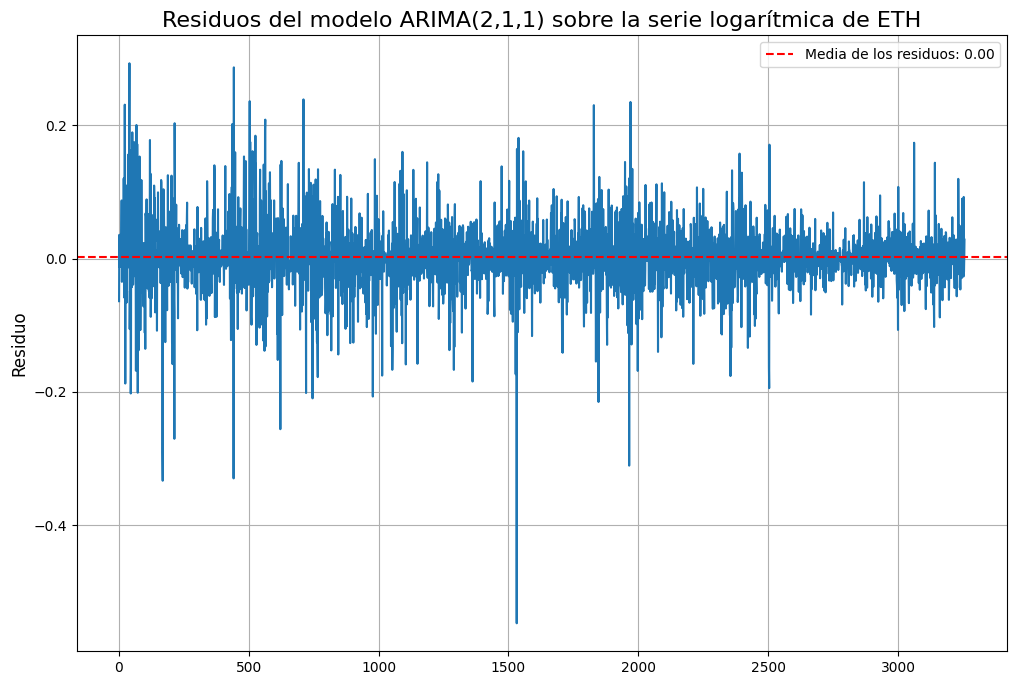

<Figure size 1400x1000 with 0 Axes>

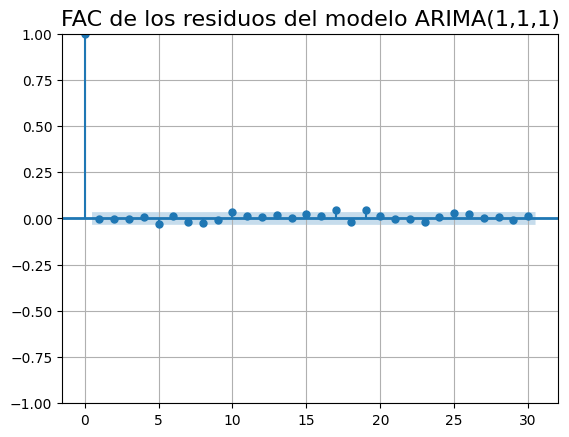

<Figure size 1400x1000 with 0 Axes>

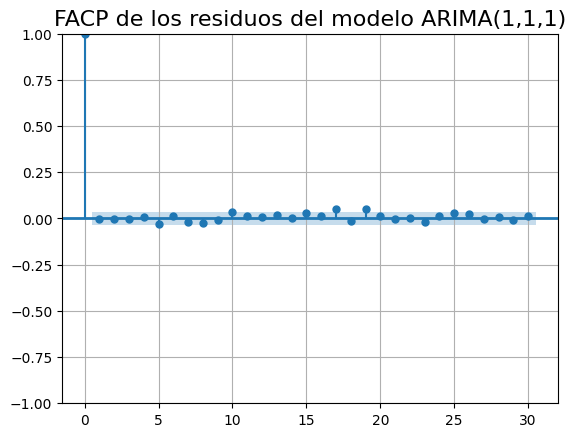

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df['log_precio_eth'] = np.log(df['precio_eth'])


df['log_precio_eth_diff'] = df['log_precio_eth'].diff().dropna()


df = df.dropna(subset=['log_precio_eth_diff'])


model_arima_eth = ARIMA(df['log_precio_eth'], order=(2, 1, 1))
results_arima_eth = model_arima_eth.fit()


print(results_arima_eth.summary())


residuals_eth = results_arima_eth.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_eth)
plt.axhline(y=residuals_eth.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_eth.mean():.2f}')
plt.title('Residuos del modelo ARIMA(2,1,1) sobre la serie logarítmica de ETH', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_eth, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(1,1,1)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_eth, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(1,1,1)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


Parametros significativos por p-valor 0.00 para todos en el coeftest y Z>|1.96|. Se puede explicar mas o menos con el correlograma aunque no sea muy visual el componente AR(2). Se cumple no correlacion de residuos por BJ y se puede ver en FAC y FACP aunque hay algun valor que podria serlo pero no en gran medida. No se cumple JB por JB muy alto por lo que da evidencia de rechazar la hipotesis nula asi como el p-valor inferior a 0.00. Los residuos si siguen al ruido blanco y el AIC es minimamente inferior al del modelo ARIMA(1,1,1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


model_auto_arima = auto_arima(df['precio_eth'], seasonal=False, stepwise=True, trace=True)


print(model_auto_arima.summary())



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=36915.020, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=36906.778, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=36907.172, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=36913.879, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=36907.959, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=36908.446, Time=1.72 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=36906.631, Time=3.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=36905.413, Time=1.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=36904.073, Time=0.60 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=36903.954, Time=0.69 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=36896.418, Time=1.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=36889.248, Time=5.79 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=36894.512, Time=4.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=36886.211, Time=8.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=36885.704, Time=9.54 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=7.00 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=36885.334, Time=8.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=13.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=36879.648, Time=14.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=16.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=13.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0]             : AIC=36878.122, Time=7.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0]             : AIC=36879.372, Time=4.89 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0]             : AIC=36884.815, Time=2.81 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0]             : AIC=inf, Time=8.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0]             : AIC=36884.413, Time=2.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0]             : AIC=inf, Time=8.75 sec

Best model:  ARIMA(5,1,3)(0,0,0)[0]          
Total fit time: 161.166 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3257
Model:               SARIMAX(5, 1, 3)   Log Likelihood              -18430.061
Date:                Thu, 06 Mar 2025   AIC                          36878.122
Time:                        17:17:18   BIC                          36932.917
Sample:                    01-01-2016   HQIC                         36897.750
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9974      0.092    -10.876      0.000      -1.177    

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             precio_eth   No. Observations:                 3256
Model:                 ARIMA(5, 1, 3)   Log Likelihood              -18424.900
Date:                Thu, 06 Mar 2025   AIC                          36867.801
Time:                        17:23:03   BIC                          36922.592
Sample:                    01-02-2016   HQIC                         36887.428
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9982      0.091    -10.943      0.000      -1.177      -0.819
ar.L2         -1.0423      0.053    -19.576      0.000      -1.147      -0.938
ar.L3         -0.5970      0.078     -7.676      0.0

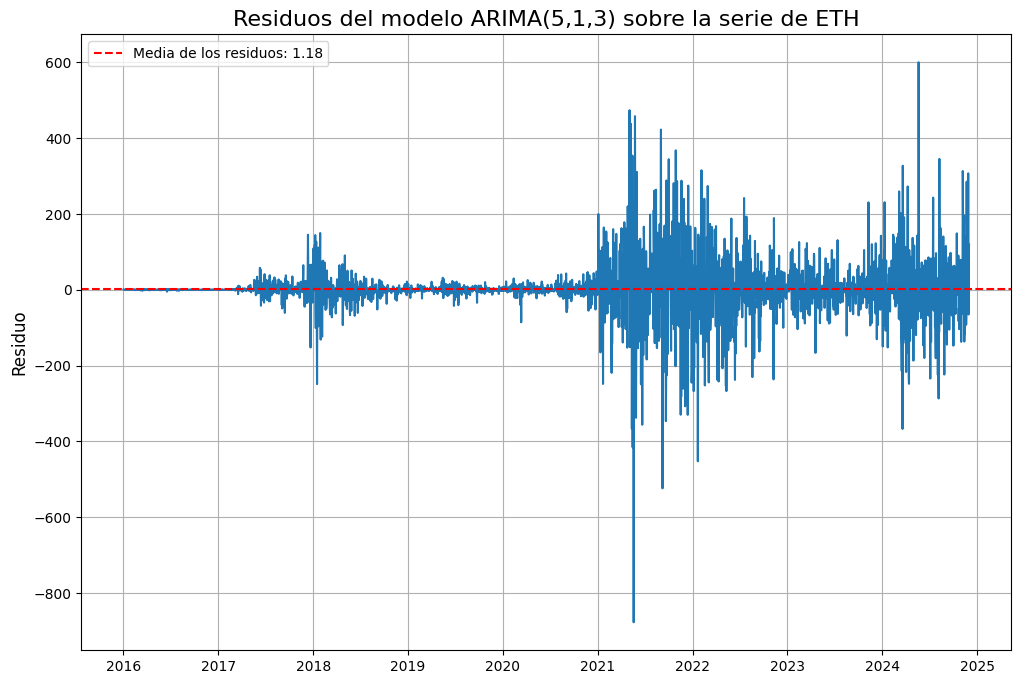

<Figure size 1400x1000 with 0 Axes>

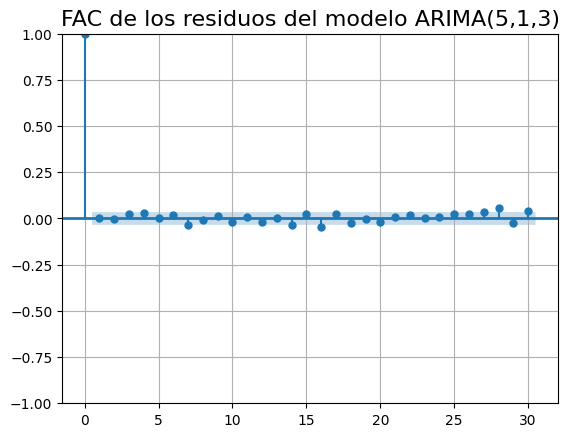

<Figure size 1400x1000 with 0 Axes>

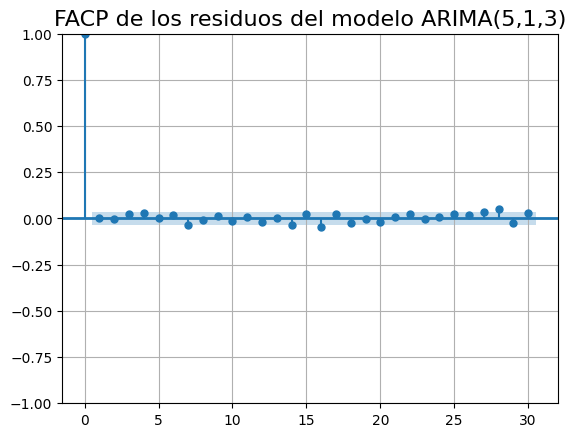

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['precio_eth_diff'] = df['precio_eth'].diff().dropna()


df = df.dropna(subset=['precio_eth_diff'])


model_arima_eth = ARIMA(df['precio_eth'], order=(5, 1, 3))
results_arima_eth = model_arima_eth.fit()


print(results_arima_eth.summary())


residuals_eth = results_arima_eth.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_eth)
plt.axhline(y=residuals_eth.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_eth.mean():.2f}')
plt.title('Residuos del modelo ARIMA(5,1,3) sobre la serie de ETH', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_eth, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(5,1,3)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_eth, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(5,1,3)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


Se ha querido buscar el mejor modelo ARIMA para la serie de ETH sin logaritmos con el fin de buscar una mayor normalidad de los residuos

Como se estaban aplicando logaritmos y la serie no parecía cumplir con la normalidad de los residuos, se ha buscado el mejor modelo ARIMA, en este caso, ARIMA (5,1,3) aplicado a la serie sin logaritmos para ver si los residuos seguían una distribución más normal. Sin embargo, el p-valor del test de JB es 0.00 por lo que no se puede aceptar la hiposesis nula de normalidad. Además, el estadístico JB es 45829 que es mucho más alto que en el ARIMA(1,1,1) y (2,1,1) sobre la serie con logartimos, por lo que es signo de muy baja normalidad. Además, evidentemente al no aplicar logartimos la varianza en la serie es mucho mayor con un estadístico de heterocedasticidad de 12.20 frente al 0.3 de los modelos anteriores lo que provoca que la media de los residuos sea 1.18 y esté bastante alejada de 0, por lo que no se cumple con los requisitos del ruido blanco. Esto, puede haber sesgado los parámetros afectando asi a la posible prediccion del modelo. Esto puede haber llevado a que el AIC Y BIC sea mucho más alto. Además, tampoco es un modelo que se peuda explicar con el correlograma

Volvemos a aplicar logaritmos para encontrar un mejor modelo

In [ ]:
!pip install pmdarima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_eth'] = np.log(df['precio_eth'])


model_auto_arima = auto_arima(df['log_precio_eth'], seasonal=False, stepwise=True, trace=True)


print(model_auto_arima.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-9992.194, Time=6.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-7676.685, Time=0.42 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-8758.713, Time=0.45 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-9995.737, Time=5.14 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-7678.685, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-9996.788, Time=3.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=7.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-9995.948, Time=4.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-9996.710, Time=6.64 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-9156.185, Time=2.48 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-9998.888, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=1.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-8760.713, Time=0.23 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=1.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-9999.826, Time=2.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-9998.671, Time=1.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-9994.891, Time=4.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-9995.155, Time=4.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,3)(0,0,0)[0]             : AIC=inf, Time=6.92 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,3)(0,0,0)[0]             : AIC=inf, Time=5.80 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 66.308 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3257
Model:               SARIMAX(1, 2, 2)   Log Likelihood                5003.913
Date:                Thu, 06 Mar 2025   AIC                          -9999.826
Time:                        17:13:28   BIC                          -9975.474
Sample:                    01-01-2016   HQIC                         -9991.103
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7399      0.143     -5.157      0.000      -1.021     

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_precio_eth   No. Observations:                 3255
Model:                 ARIMA(1, 2, 2)   Log Likelihood                5000.022
Date:                Thu, 06 Mar 2025   AIC                          -9992.044
Time:                        17:45:06   BIC                          -9967.695
Sample:                    01-03-2016   HQIC                         -9983.322
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7409      0.144     -5.163      0.000      -1.022      -0.460
ma.L1         -0.2782      0.149     -1.866      0.062      -0.570       0.014
ma.L2         -0.7045      0.148     -4.771      0.0

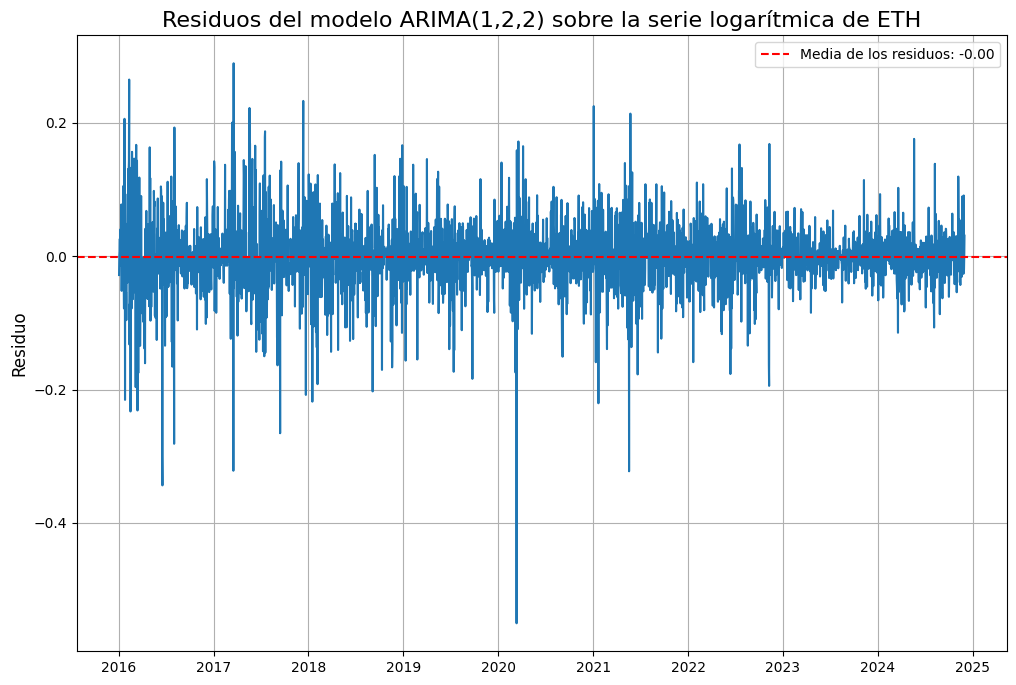

<Figure size 1400x1000 with 0 Axes>

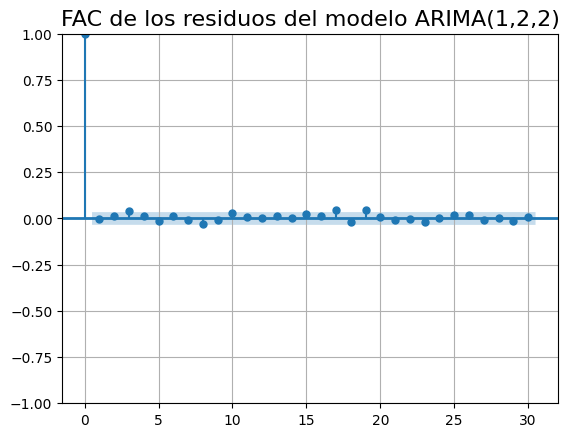

<Figure size 1400x1000 with 0 Axes>

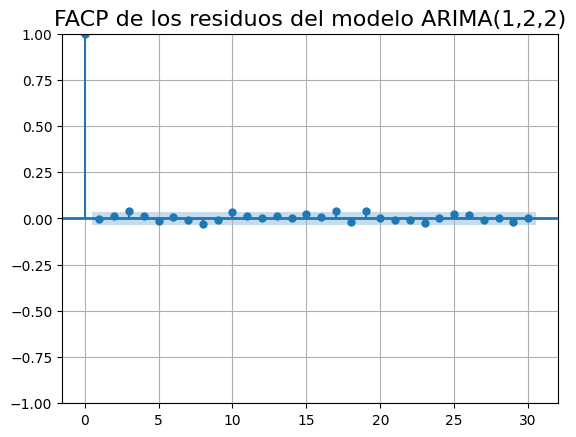

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_eth'] = np.log(df['precio_eth'])


df['log_precio_eth_diff'] = df['log_precio_eth'].diff(2).dropna()


df = df.dropna(subset=['log_precio_eth_diff'])


model_arima_eth = ARIMA(df['log_precio_eth'], order=(1, 2, 2))
results_arima_eth = model_arima_eth.fit()


print(results_arima_eth.summary())


residuals_eth = results_arima_eth.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_eth)
plt.axhline(y=residuals_eth.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_eth.mean():.2f}')
plt.title('Residuos del modelo ARIMA(1,2,2) sobre la serie logarítmica de ETH', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_eth, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(1,2,2)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_eth, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(1,2,2)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


Este modelo tiene todos los parmetros altamente significativos. Tiene el AIC y BIC más bajo y tiene un coeficiente de asimetria mas bajo aun lo que quiere decir que los residuos siguen una distribucion mas normal aunque se siga sin cumplir el test de JB. El estadistico JB es mas bajo que el probado anteriormente. Se cumple con el test de BJ que se puede ver tambien en la FAC y FACP de los residuos. Y la media de los residuos es 0 y la varianza parece constate, por lo que podrian ser un ruido blanco. En principio es el mejor modelo. El unico defecto es que no se ve claro el orden en la FAC y FACP.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_precio_eth   No. Observations:                 3255
Model:                 ARIMA(1, 1, 2)   Log Likelihood                5001.888
Date:                Thu, 13 Mar 2025   AIC                          -9995.776
Time:                        09:16:38   BIC                          -9971.425
Sample:                    01-03-2016   HQIC                         -9987.053
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5472      0.143      3.827      0.000       0.267       0.827
ma.L1         -0.5665      0.142     -3.978      0.000      -0.846      -0.287
ma.L2          0.0646      0.012      5.207      0.0

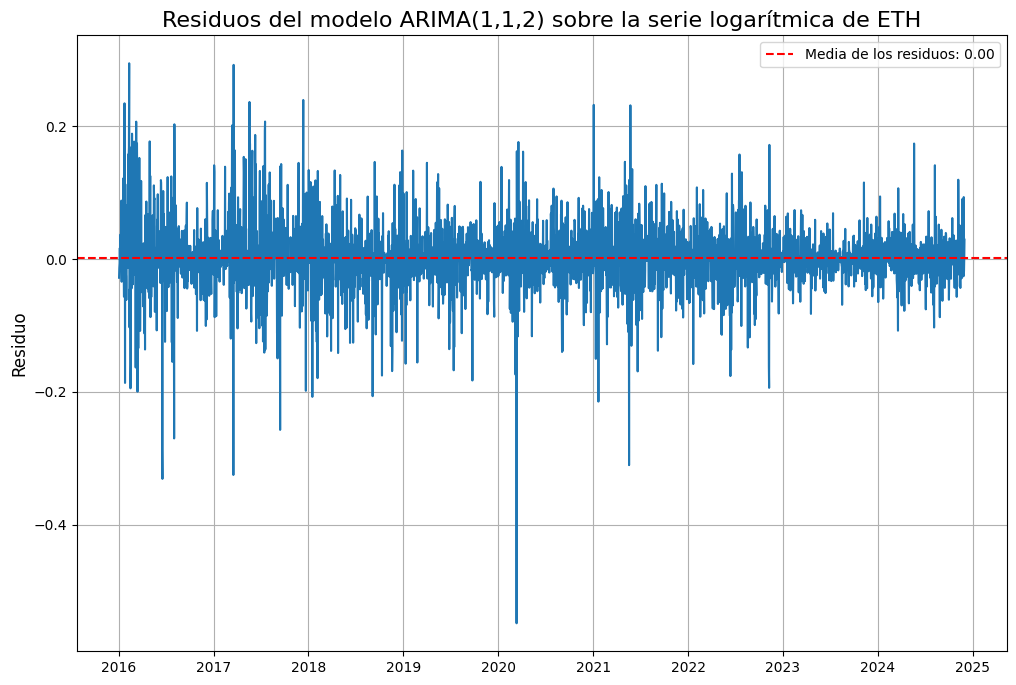

<Figure size 1400x1000 with 0 Axes>

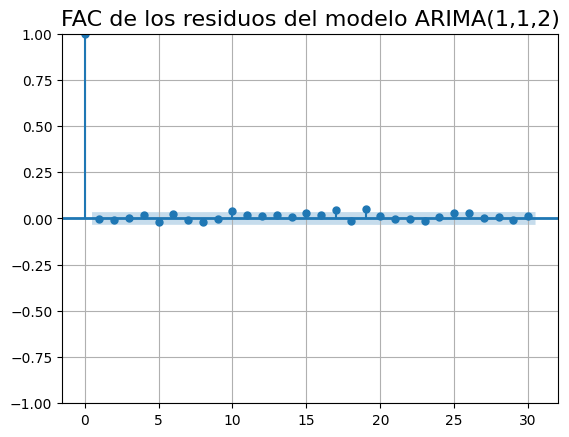

<Figure size 1400x1000 with 0 Axes>

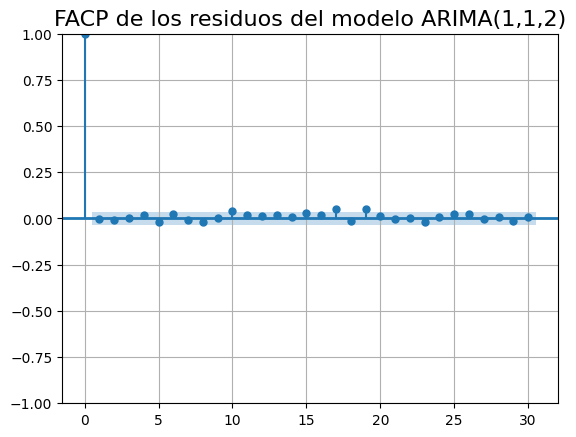

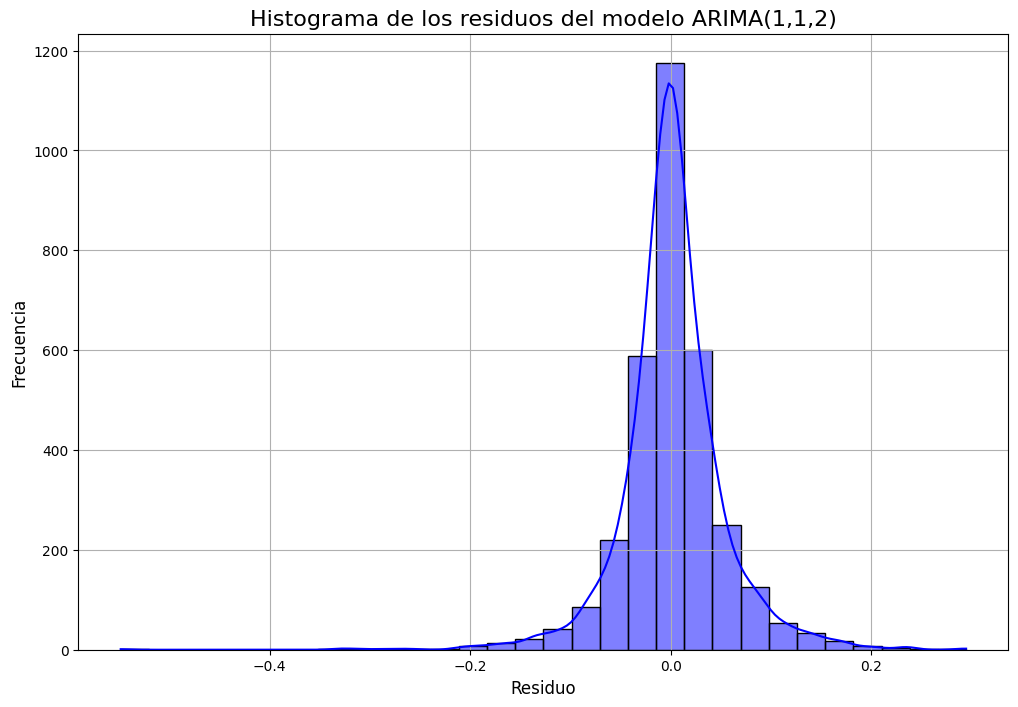

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_eth'] = np.log(df['precio_eth'])


df['log_precio_eth_diff'] = df['log_precio_eth'].diff(2).dropna()


df = df.dropna(subset=['log_precio_eth_diff'])


model_arima_eth = ARIMA(df['log_precio_eth'], order=(1, 1, 2))
results_arima_eth = model_arima_eth.fit()


print(results_arima_eth.summary())


residuals_eth = results_arima_eth.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_eth)
plt.axhline(y=residuals_eth.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_eth.mean():.2f}')
plt.title('Residuos del modelo ARIMA(1,1,2) sobre la serie logarítmica de ETH', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_eth, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(1,1,2)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_eth, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(1,1,2)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(12, 8))
sns.histplot(residuals_eth, kde=True, color='blue', bins=30)
plt.title('Histograma de los residuos del modelo ARIMA(1,1,2)', fontsize=16)
plt.xlabel('Residuo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


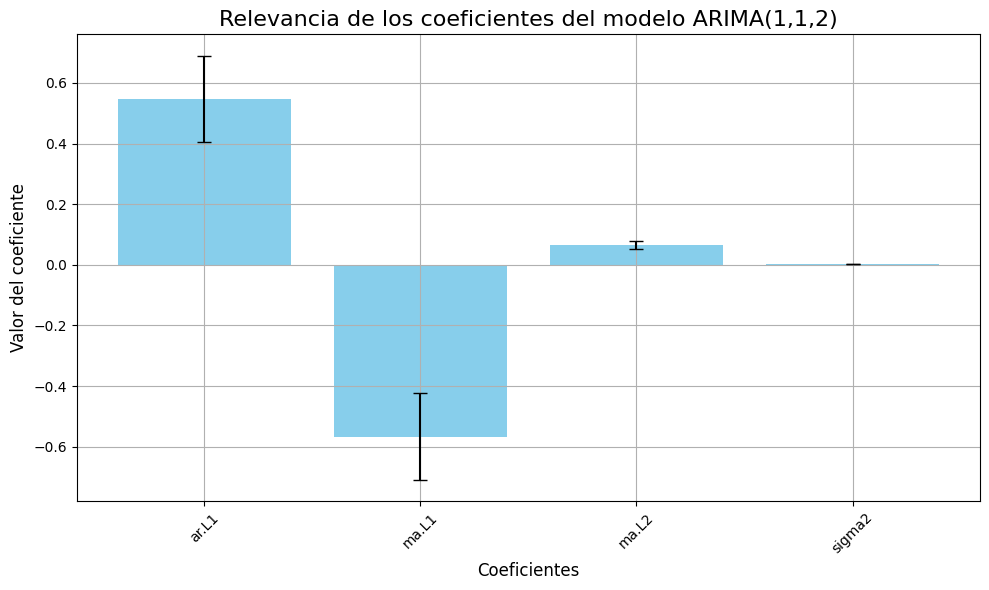

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df['log_precio_eth'] = np.log(df['precio_eth'])


df['log_precio_eth_diff'] = df['log_precio_eth'].diff().dropna()


df = df.dropna(subset=['log_precio_eth_diff'])


model_arima_btc = ARIMA(df['log_precio_eth'], order=(1, 1, 2))
results_arima_btc = model_arima_btc.fit()


coefficients = results_arima_btc.params
std_err = results_arima_btc.bse


plt.figure(figsize=(10, 6))
plt.bar(coefficients.index, coefficients.values, yerr=std_err, capsize=5, color='skyblue', edgecolor='none')
plt.title('Relevancia de los coeficientes del modelo ARIMA(1,1,2)', fontsize=16)
plt.xlabel('Coeficientes', fontsize=12)
plt.ylabel('Valor del coeficiente', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


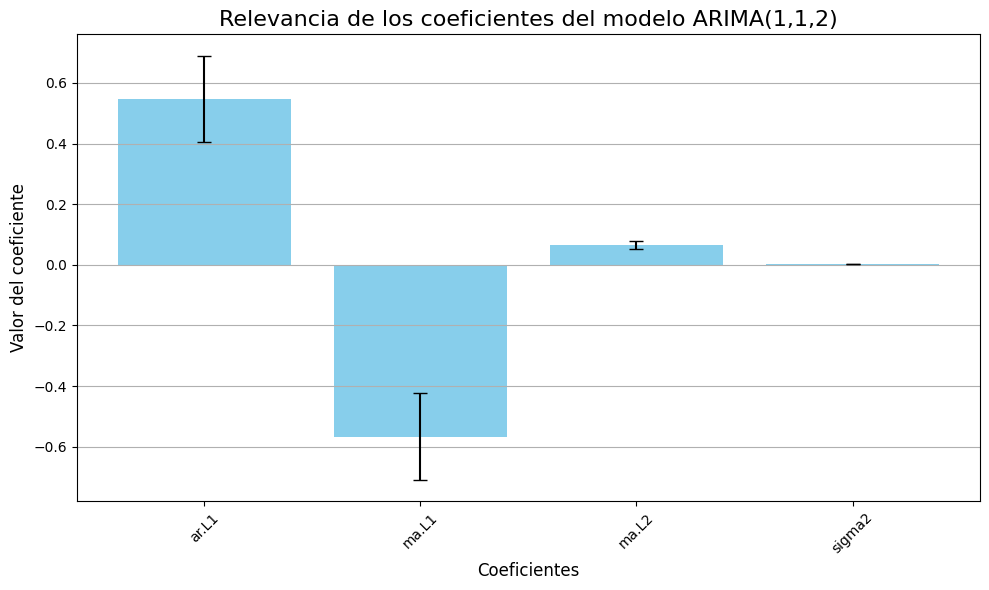

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df['log_precio_eth'] = np.log(df['precio_eth'])


df['log_precio_eth_diff'] = df['log_precio_eth'].diff().dropna()


df = df.dropna(subset=['log_precio_eth_diff'])


model_arima_btc = ARIMA(df['log_precio_eth'], order=(1, 1, 2))
results_arima_btc = model_arima_btc.fit()


coefficients = results_arima_btc.params
std_err = results_arima_btc.bse


plt.figure(figsize=(10, 6))
plt.bar(coefficients.index, coefficients.values, yerr=std_err, capsize=5, color='skyblue', edgecolor='none')
plt.title('Relevancia de los coeficientes del modelo ARIMA(1,1,2)', fontsize=16)
plt.xlabel('Coeficientes', fontsize=12)
plt.ylabel('Valor del coeficiente', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


El modelo SARIMAX(1,2,2) sobre logartimos ha resultado en no cumplir JB ni BJ con p-valores de 0.00 por lo que se rechaza automaticamente el uso del modelo, a pesar de que todos los coeficientes fuesen sifnificativos para un nivel de confianza del 5%. Se ha probado el mismo modelo sin aplicar logartimos y los dos coeficientes MA no eran nada significativos con un p-valor de 1.00. Sin embargo, el coeficinete AR(1) era altamente significativo por lo que se ha probado con un SARIMAX (1,1,0) donde todos los coeficientes eran significativos y se cumplia el test de no correlacion de residuos, aunque en la FAC y la FACP de residuos habia palo retardos significativos. No se cumplia el test de JB con un estadistico JB de 46071. Ademas la media de los residuos era 0.94 por lo que no estaba cerca de 0.00. Dicho esto, se rechaza el uso de este modelo.


Se concluye que aunque los coeficientes de las variables exogenas son todos significativos, los modelos no han han capturado bien los patrones de los datos lo que ha resultado en no cumplir con las suposiciones basicas de normalidad y independeicas de residuos de los modelos ARIMA. Esto sugiere que el modelo puede estar sobreajustado o no estar considerando algunos efectos de los datos.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_precio_eth   No. Observations:                 3255
Model:                 ARIMA(1, 2, 2)   Log Likelihood                5000.022
Date:                Thu, 06 Mar 2025   AIC                          -9992.044
Time:                        19:01:33   BIC                          -9967.695
Sample:                    01-03-2016   HQIC                         -9983.322
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7409      0.144     -5.163      0.000      -1.022      -0.460
ma.L1         -0.2782      0.149     -1.866      0.062      -0.570       0.014
ma.L2         -0.7045      0.148     -4.771      0.0

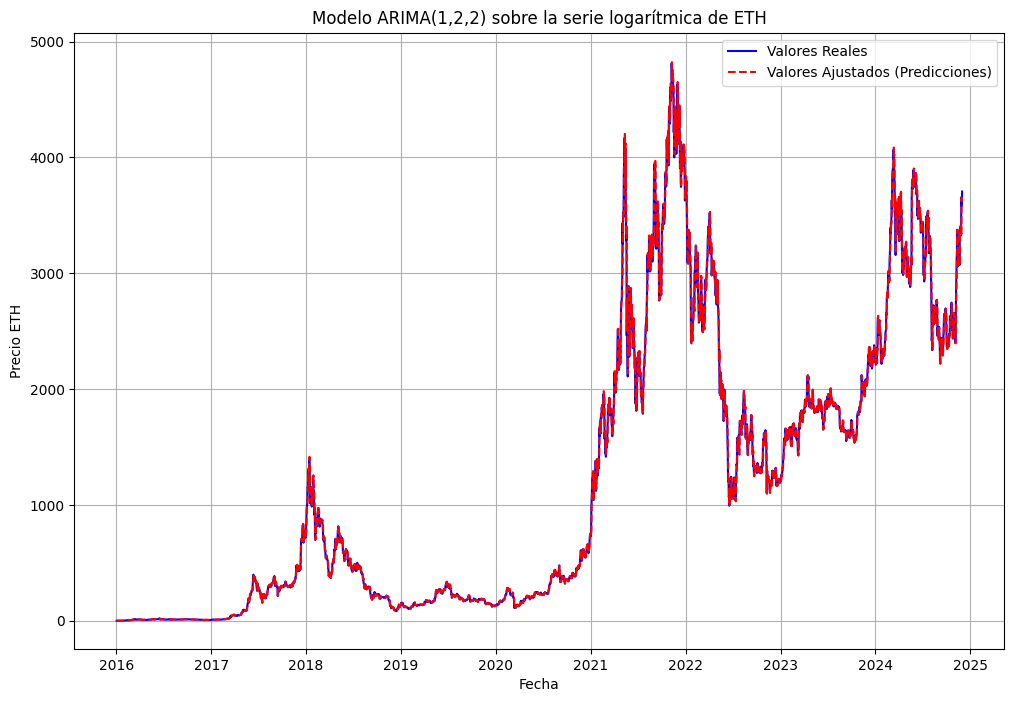

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_eth'] = np.log(df['precio_eth'])


df['log_precio_eth_diff'] = df['log_precio_eth'].diff(2).dropna()


df = df.dropna(subset=['log_precio_eth_diff'])


model_arima_eth = ARIMA(df['log_precio_eth'], order=(1, 2, 2))
results_arima_eth = model_arima_eth.fit()


print(results_arima_eth.summary())


predictions = results_arima_eth.predict(start=0, end=len(df)-1)


predicted_values = np.exp(predictions)
actual_values = np.exp(df['log_precio_eth'])


rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")


mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE: {mape * 100}%")


plt.figure(figsize=(12, 8))
plt.plot(df.index, actual_values, label='Valores Reales', color='blue')
plt.plot(df.index, predicted_values, label='Valores Ajustados (Predicciones)', color='red', linestyle='--')
plt.title('Modelo ARIMA(1,2,2) sobre la serie logarítmica de ETH')
plt.xlabel('Fecha')
plt.ylabel('Precio ETH')
plt.legend()
plt.grid(True)
plt.show()


Aunque el modelo ARIMA (1,2,2) fuese en princpio el más acertado porque se cumplian todos los requisitos, tiene un RMSE de 70.34 lo que indica un ajuste malo del modelo y no merece la pena usarlo.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             precio_eth   No. Observations:                 3255
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -17687.709
Date:                Thu, 06 Mar 2025   AIC                          35409.418
Time:                        19:10:47   BIC                          35512.908
Sample:                    01-03-2016   HQIC                         35446.489
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
precio_xrp_diff      111.8084   3.94e-09   2.84e+10      0.000     111.808     111.808
volumen_btc_diff   -3.511e-10   2.03e-11    -17.267      0.000   -3.91e-10   -3.11e-10
indice_dolar _diff  

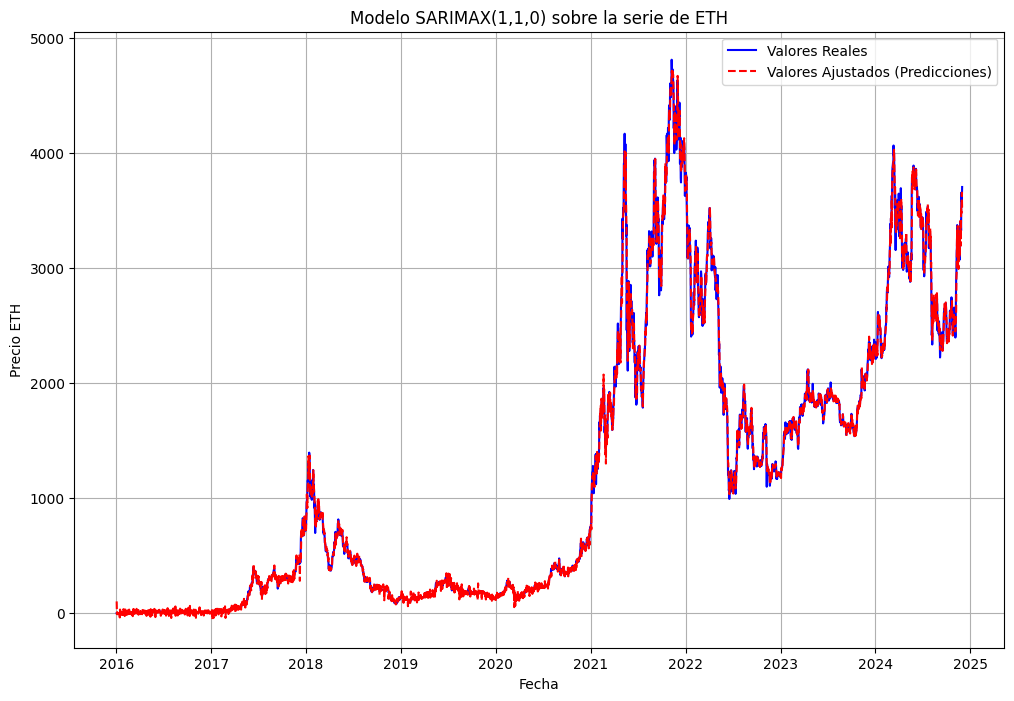

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['precio_eth_diff'] = df['precio_eth'].diff(1).dropna()


df = df.dropna(subset=['precio_eth_diff'])



diff_vars = ['precio_xrp', 'volumen_btc', 'indice_dolar ', 'int_FED', 'volumen_eth',
             'M2', 'IPC', 'oro', 'SP500', 'eurostoxx', 'precio_btc']

for var in diff_vars:
    df.loc[:, f'{var}_diff'] = df[var].diff().dropna()


no_diff_vars = ['sentimiento', 'RSI', 'vix', 'volumen_xrp']


exog_vars = df[[f'{var}_diff' for var in diff_vars] + no_diff_vars]


df_clean = df.dropna(subset=[f'{var}_diff' for var in diff_vars] + no_diff_vars)
exog_vars_clean = exog_vars.loc[df_clean.index]


model_sarimax_eth = SARIMAX(df_clean['precio_eth'],
                            order=(1, 1, 0),
                            exog=exog_vars_clean)
results_sarimax_eth = model_sarimax_eth.fit()


print(results_sarimax_eth.summary())


predictions = results_sarimax_eth.predict(start=0, end=len(df_clean)-1, exog=exog_vars_clean)


rmse = np.sqrt(mean_squared_error(df_clean['precio_eth'], predictions))
print(f"RMSE: {rmse}")


mape = mean_absolute_percentage_error(df_clean['precio_eth'], predictions)
print(f"MAPE: {mape * 100}%")


plt.figure(figsize=(12, 8))
plt.plot(df_clean.index, df_clean['precio_eth'], label='Valores Reales', color='blue')
plt.plot(df_clean.index, predictions, label='Valores Ajustados (Predicciones)', color='red', linestyle='--')
plt.title('Modelo SARIMAX(1,1,0) sobre la serie de ETH')
plt.xlabel('Fecha')
plt.ylabel('Precio ETH')
plt.legend()
plt.grid(True)
plt.show()




El modelo SARIMAX(1,1,0) era el segundo mejor segun lo probado y cumplia casi todas las condiciones pero sigue teneindo un RMSE muy alto (55.54)

Se cumple todo, tiene el AIC y BIC mas bajo, y tiene un RMSE ligeramente inferior al ARIMA (1,2,2) aun siendo alto. Ademas, se ha utilizado una herramienta de busqueda de hiperparametros que minimizasen el RMSE y era el mejor modelo.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         log_precio_eth   No. Observations:                 3256
Model:                 ARIMA(1, 1, 2)   Log Likelihood                5003.700
Date:                Thu, 06 Mar 2025   AIC                          -9999.399
Time:                        19:19:57   BIC                          -9975.047
Sample:                    01-02-2016   HQIC                         -9990.676
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5475      0.143      3.834      0.000       0.268       0.827
ma.L1         -0.5669      0.142     -3.986      0.000      -0.846      -0.288
ma.L2          0.0647      0.012      5.214      0.0

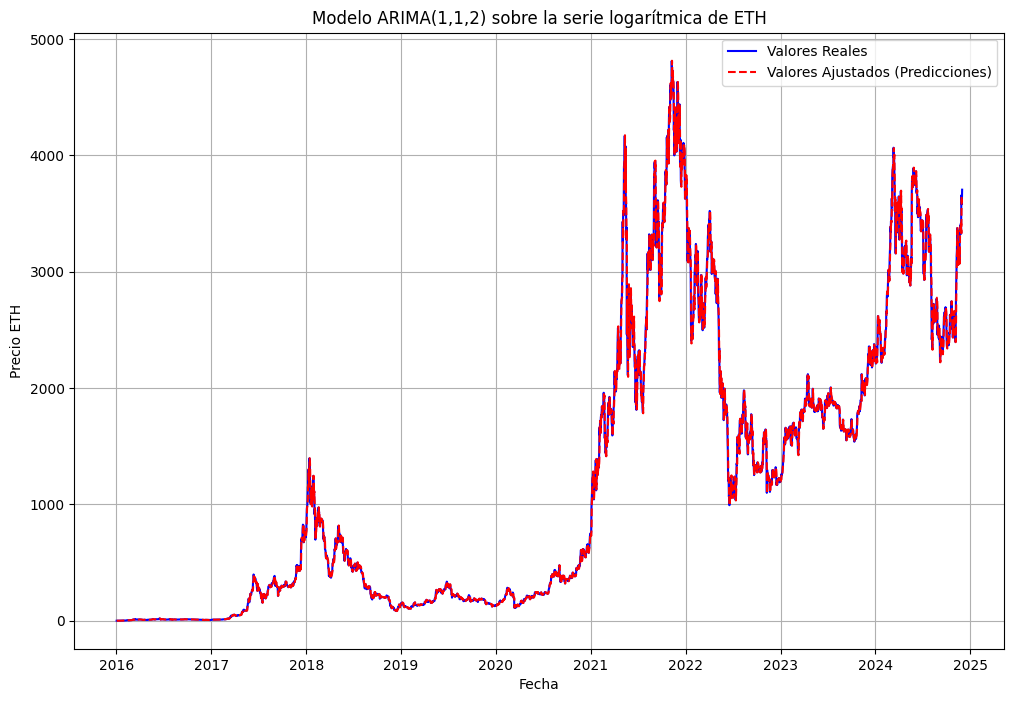

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['log_precio_eth'] = np.log(df['precio_eth'])


df['log_precio_eth_diff'] = df['log_precio_eth'].diff(1).dropna()


df = df.dropna(subset=['log_precio_eth_diff'])


model_arima_eth = ARIMA(df['log_precio_eth'], order=(1, 1, 2))
results_arima_eth = model_arima_eth.fit()


print(results_arima_eth.summary())


predictions = results_arima_eth.predict(start=0, end=len(df)-1)


predicted_values = np.exp(predictions)
actual_values = np.exp(df['log_precio_eth'])


rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")


mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE: {mape * 100}%")


plt.figure(figsize=(12, 8))
plt.plot(df.index, actual_values, label='Valores Reales', color='blue')
plt.plot(df.index, predicted_values, label='Valores Ajustados (Predicciones)', color='red', linestyle='--')
plt.title('Modelo ARIMA(1,1,2) sobre la serie logarítmica de ETH')
plt.xlabel('Fecha')
plt.ylabel('Precio ETH')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)
df = df.asfreq('D', method='pad')


df['log_precio_eth'] = np.log(df['precio_eth'])


model_arima_eth = ARIMA(df['log_precio_eth'], order=(1, 1, 2))
results_arima_eth = model_arima_eth.fit()


predicciones_log = results_arima_eth.get_forecast(steps=5)
predicciones_log_mean = predicciones_log.predicted_mean


predicciones_eth = np.exp(predicciones_log_mean)


print(predicciones_eth)


2024-12-01    3706.396807
2024-12-02    3713.794981
2024-12-03    3717.856675
2024-12-04    3720.085043
2024-12-05    3721.307126
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd


archivo_diciembre = "Datos reales diciembre 2024.xlsx"
df_diciembre = pd.read_excel(archivo_diciembre)


df_diciembre['fecha'] = pd.to_datetime(df_diciembre['fecha'], dayfirst=True)


df_diciembre['precio_eth'] = df_diciembre['precio_eth'].replace({',': ''}, regex=True).astype(float)


df_diciembre.set_index('fecha', inplace=True)


print(df_diciembre['precio_eth'])


fecha
2024-12-01    3708.33
2024-12-02    3643.48
2024-12-03    3615.07
2024-12-04    3836.25
2024-12-05    3785.10
Name: precio_eth, dtype: float64


PREDICCIONES Y DIFERENCIAS

Fecha	Valor Real	Valor Predicho	Diferencia	Variación (%)
2024-12-01	3708.33	3706.396807	1.933193	0.05%
2024-12-02	3643.48	3713.794981	-70.314981	-1.93%
2024-12-03	3615.07	3717.856675	-102.786675	-2.84%
2024-12-04	3836.25	3720.085043	116.164957	3.03%
2024-12-05	3785.10	3721.307126	63.792874	1.69%

Se ve que las predicciones no han sido tan erroneas como se esperaban.

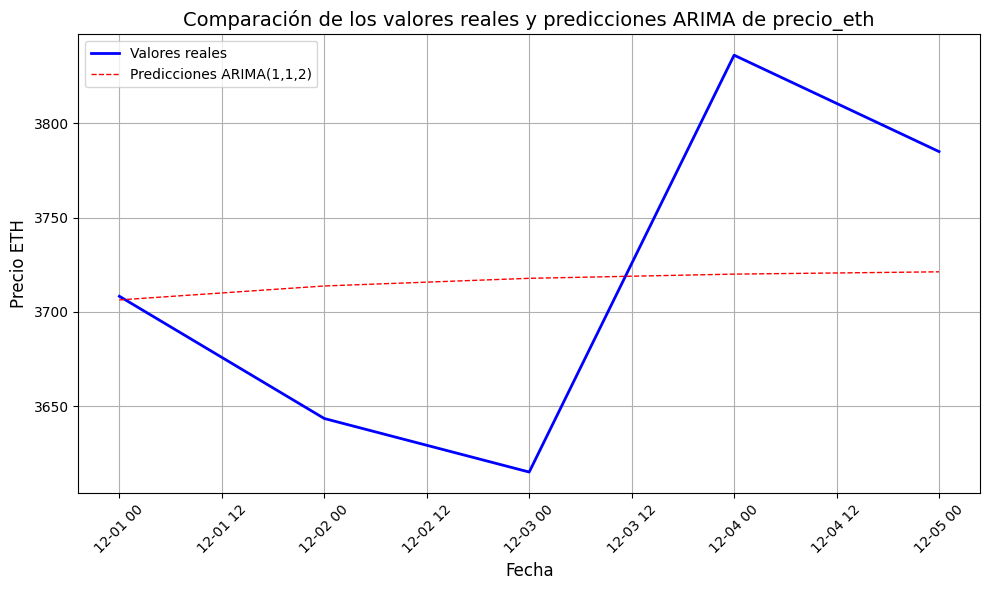

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


fechas = ['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05']
valor_real = [3708.33, 3643.48, 3615.07, 3836.25, 3785.10]


valor_predicho_arima = [3706.396807, 3713.794981, 3717.856675, 3720.085043, 3721.307126]


fechas = pd.to_datetime(fechas)


plt.figure(figsize=(10, 6))


plt.plot(fechas, valor_real, label='Valores reales', color='blue', linewidth=2)


plt.plot(fechas, valor_predicho_arima, label='Predicciones ARIMA(1,1,2)', color='red', linestyle='--', linewidth=1)


plt.title('Comparación de los valores reales y predicciones ARIMA de precio_eth', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio ETH', fontsize=12)


plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


La FAC de XRP desciende mas rapidamente que las de BTC y ETH.

Podria ser un modelo ARIMA (1,1,2) o (1,1,3) porque hay un palo claramente significativo en la FACP y puede ser MA 2 o 3 porque desciende rapidamente lo que quiere decir que hay autocorrelacion entre los retardos.

Por otro lado, en la FACP hay hasta 9 retardos que son significativos con un nivel de confianza del 95% por lo que puede que el orden del componente AR sea mayor.

                               SARIMAX Results                                
Dep. Variable:         log_precio_xrp   No. Observations:                 3256
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4294.898
Date:                Fri, 07 Mar 2025   AIC                          -8581.796
Time:                        11:16:24   BIC                          -8557.445
Sample:                    01-02-2016   HQIC                         -8573.073
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8577      0.032     26.617      0.000       0.795       0.921
ma.L1         -0.9403      0.032    -28.968      0.000      -1.004      -0.877
ma.L2          0.1214      0.009     12.845      0.0

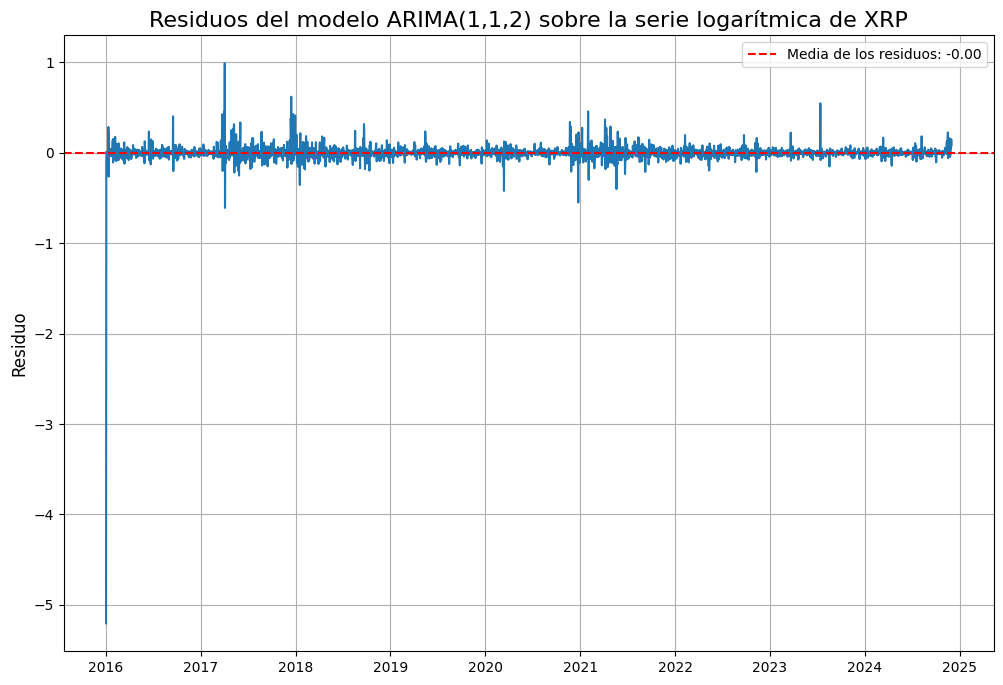

<Figure size 1400x1000 with 0 Axes>

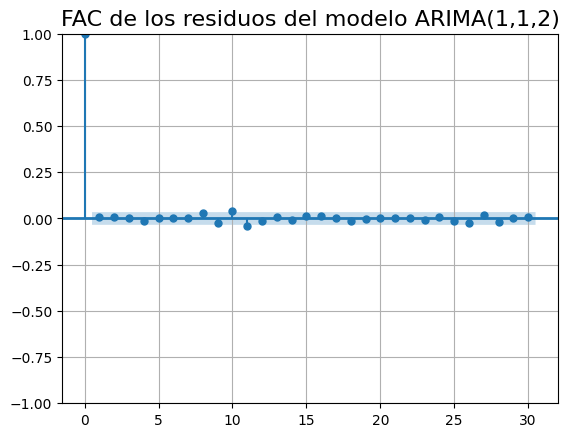

<Figure size 1400x1000 with 0 Axes>

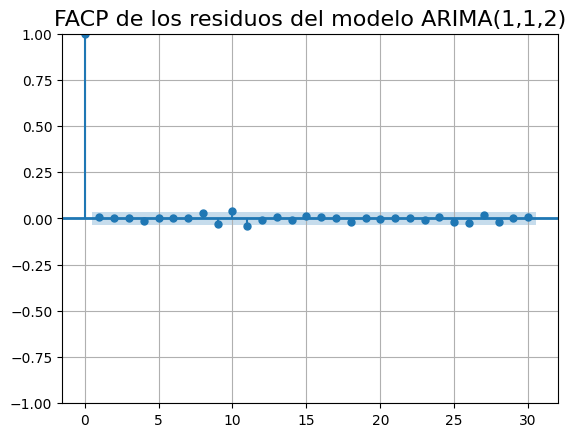

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)
df = df.asfreq('D', method='pad')


df['log_precio_xrp'] = np.log(df['precio_xrp'])


df['log_precio_xrp_diff'] = df['log_precio_xrp'].diff().dropna()


df = df.dropna(subset=['log_precio_xrp_diff'])


model_arima_xrp = ARIMA(df['log_precio_xrp'], order=(1, 1, 2))
results_arima_xrp = model_arima_xrp.fit()


print(results_arima_xrp.summary())


predictions = results_arima_xrp.predict(start=0, end=len(df)-1)


predicted_values = np.exp(predictions)
actual_values = np.exp(df['log_precio_xrp'])


rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")


mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE: {mape * 100}%")


residuals_xrp = results_arima_xrp.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_xrp)
plt.axhline(y=residuals_xrp.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_xrp.mean():.2f}')
plt.title('Residuos del modelo ARIMA(1,1,2) sobre la serie logarítmica de XRP', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_xrp, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(1,1,2)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_xrp, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(1,1,2)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


Todos los parametros significativos, tanto por estadistico Z como por p-valores 0.00. Se puede explicar con el correlograma. Se cumple la no correlacion de los residuos aunque el estadistico de JB extremadamente alto. Se cumple con el ruido blanco por media 0 de los residuos y varianza constante. La asimetria es demasiado alta como para poder aceptar que los residuos sigan una distribucion normal. Aunque el RMSE es muy bajo (0.04) no es recomendable el modelo por la no normalidad de residuos.

Aunque incialmente no se iban a aplicar logaritmos porque aumentaban el p-valor del test de Dickey Fuller, es decir, aumentaban la posibilidad de que la serie fuese no estacionaria, se han tendio que aplicar para encontrar un modeo con parametros significativos y que cumpliese que los residuos tuviesen media 0. Además, al no aplicarlos se podia ver en la FAC y FACP de los residuos un alta correlacion en diferentes retardos.

                               SARIMAX Results                                
Dep. Variable:         log_precio_xrp   No. Observations:                 3256
Model:                 ARIMA(1, 1, 3)   Log Likelihood                4296.257
Date:                Fri, 07 Mar 2025   AIC                          -8582.513
Time:                        11:31:30   BIC                          -8552.073
Sample:                    01-02-2016   HQIC                         -8571.609
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8923      0.037     23.888      0.000       0.819       0.966
ma.L1         -0.9781      0.037    -26.527      0.000      -1.050      -0.906
ma.L2          0.1510      0.012     12.085      0.0

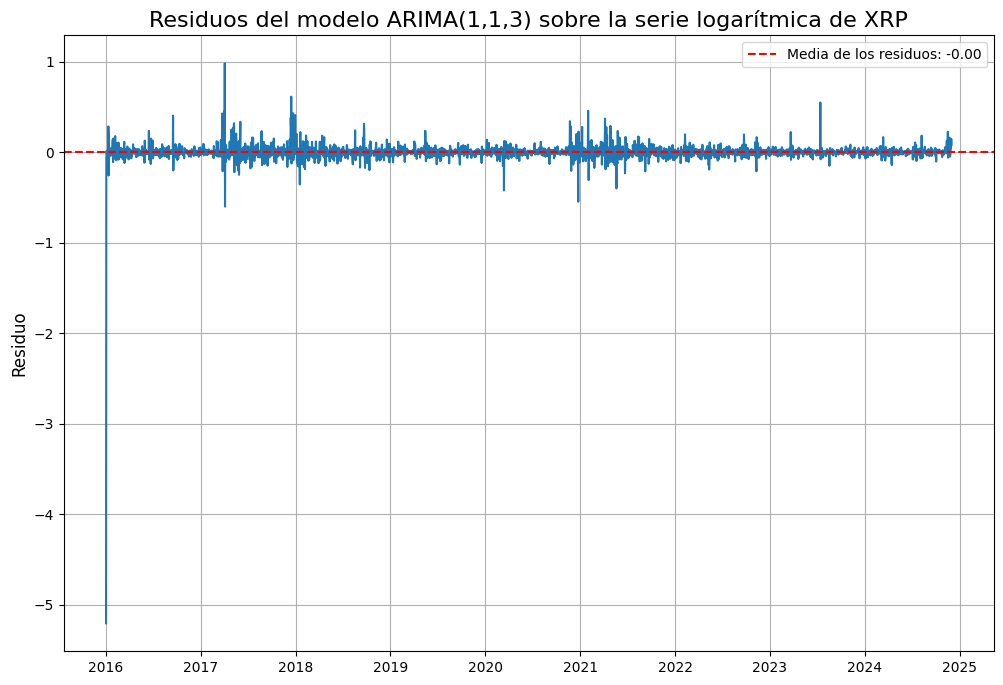

<Figure size 1400x1000 with 0 Axes>

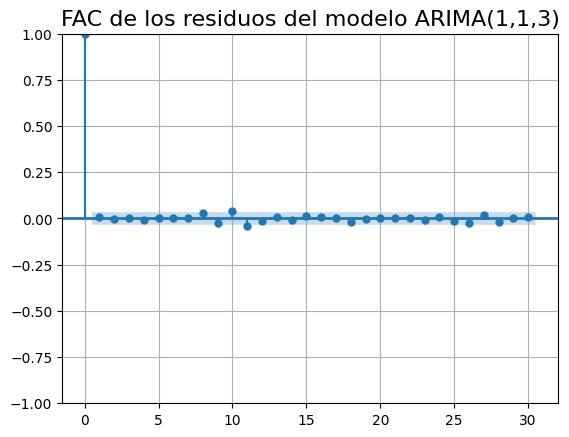

<Figure size 1400x1000 with 0 Axes>

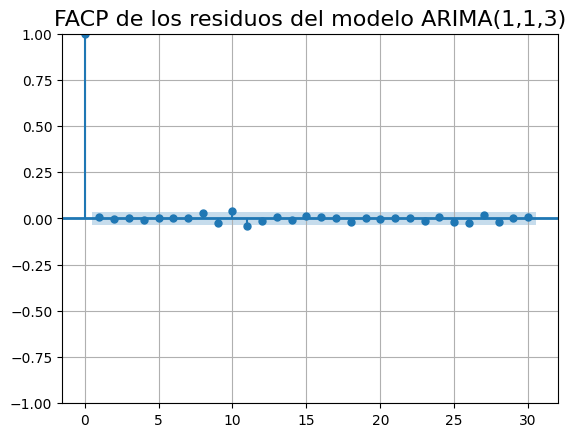

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)
df = df.asfreq('D', method='pad')


df['log_precio_xrp'] = np.log(df['precio_xrp'])


df['log_precio_xrp_diff'] = df['log_precio_xrp'].diff().dropna()


df = df.dropna(subset=['log_precio_xrp_diff'])


model_arima_xrp = ARIMA(df['log_precio_xrp'], order=(1, 1, 3))
results_arima_xrp = model_arima_xrp.fit()


print(results_arima_xrp.summary())


predictions = results_arima_xrp.predict(start=0, end=len(df)-1)


predicted_values = np.exp(predictions)
actual_values = np.exp(df['log_precio_xrp'])


rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")


mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE: {mape * 100}%")


residuals_xrp = results_arima_xrp.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_xrp)
plt.axhline(y=residuals_xrp.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_xrp.mean():.2f}')
plt.title('Residuos del modelo ARIMA(1,1,3) sobre la serie logarítmica de XRP', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_xrp, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(1,1,3)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_xrp, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(1,1,3)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


Los resultados de este modelo son similares al ARIMA (1,1,2), ya que de nuevo todos los parametros son significativos, el p-valor del test de BJ es muy alto (0.98) por lo que no se puede rechazar que los residuos no estén correlacionados y en el test de JB aunque el estadistico JB sea minimamente mas bajo, sigue siendo muy alto (136190.86) y la asimetria sigue siendo alta. El AIC es minimamente mas bajo y el RMSE y el MAPE son practicamente iguales.

Este es el mejor modelo que se ha encontrado.

                               SARIMAX Results                                
Dep. Variable:         log_precio_xrp   No. Observations:                 3256
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4281.274
Date:                Fri, 07 Mar 2025   AIC                          -8556.547
Time:                        12:04:36   BIC                          -8538.284
Sample:                    01-02-2016   HQIC                         -8550.005
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3827      0.110     -3.495      0.000      -0.597      -0.168
ma.L1          0.2961      0.110      2.681      0.007       0.080       0.513
sigma2         0.0042   2.94e-05    143.597      0.0

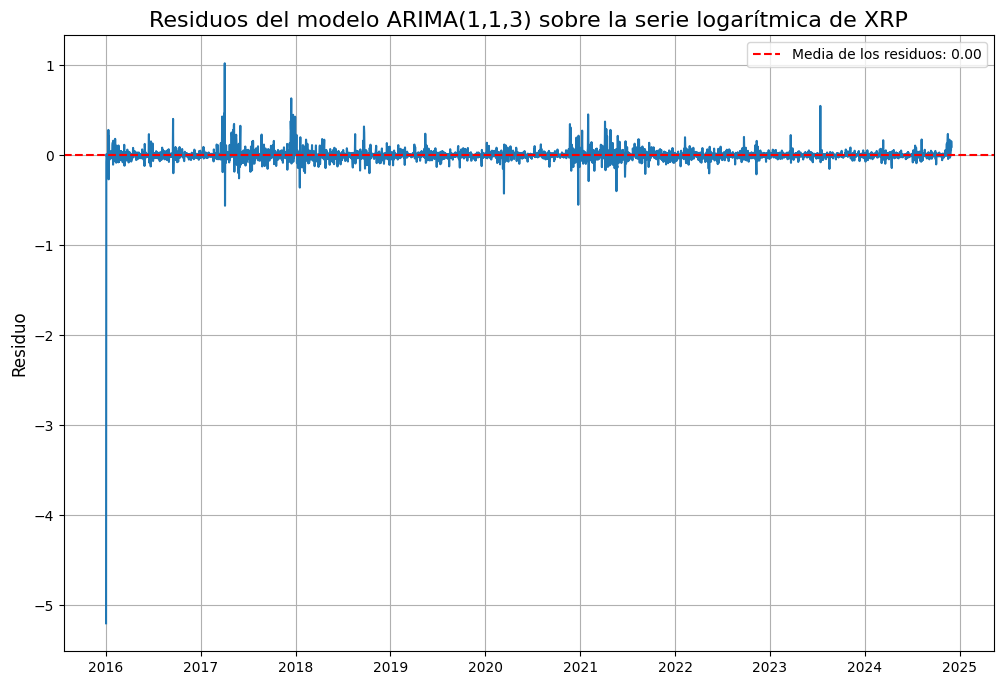

<Figure size 1400x1000 with 0 Axes>

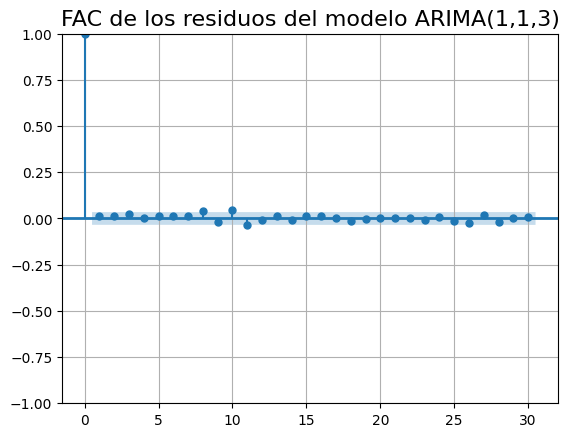

<Figure size 1400x1000 with 0 Axes>

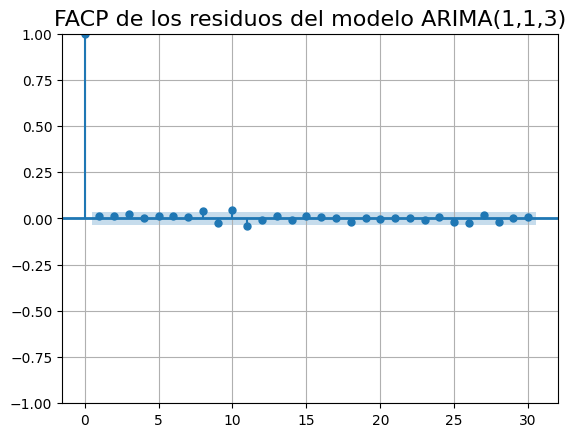

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)
df = df.asfreq('D', method='pad')


df['log_precio_xrp'] = np.log(df['precio_xrp'])


df['log_precio_xrp_diff'] = df['log_precio_xrp'].diff().dropna()


df = df.dropna(subset=['log_precio_xrp_diff'])


model_arima_xrp = ARIMA(df['log_precio_xrp'], order=(1, 1, 1))
results_arima_xrp = model_arima_xrp.fit()


print(results_arima_xrp.summary())


predictions = results_arima_xrp.predict(start=0, end=len(df)-1)


predicted_values = np.exp(predictions)
actual_values = np.exp(df['log_precio_xrp'])


rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
print(f"RMSE: {rmse}")


mape = mean_absolute_percentage_error(actual_values, predicted_values)
print(f"MAPE: {mape * 100}%")


residuals_xrp = results_arima_xrp.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_xrp)
plt.axhline(y=residuals_xrp.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_xrp.mean():.2f}')
plt.title('Residuos del modelo ARIMA(1,1,3) sobre la serie logarítmica de XRP', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_xrp, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo ARIMA(1,1,3)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_xrp, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo ARIMA(1,1,3)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()

Se ha probado tambien con diferentes modelos cambiando el orden del componente AR vista la FACP de la serie original que tenia 9 retardos significativos pero no eran significativos en el modelo. Se ha probado con un modelo ARIMA(1,1,1) que era el que mas se acercaba a los resultados del ARIMA(1,1,2) y ARIMA(1,1,3, aunque el AIC y BIC fuesen mas altos y la asimetris fuese mayor por lo que habia mas posibilidad de que lso residuos no siguiesen una distribucion normal.

Se ha usado un modeo SARIMAX(1,1,3) donde todos los parametros eran significaticos a excepcion del volumen de BTC asi que se ha decidido no incluir en el modelo.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             precio_xrp   No. Observations:                 3255
Model:               SARIMAX(1, 1, 3)   Log Likelihood                6016.800
Date:                Thu, 13 Mar 2025   AIC                         -11995.601
Time:                        09:24:17   BIC                         -11879.936
Sample:                    01-03-2016   HQIC                        -11954.168
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
precio_eth_diff       -0.0001   1.65e-08  -6138.528      0.000      -0.000      -0.000
indice_dolar _diff    -0.0002   2.31e-11  -9.73e+06      0.000      -0.000      -0.000
int_FED_diff        

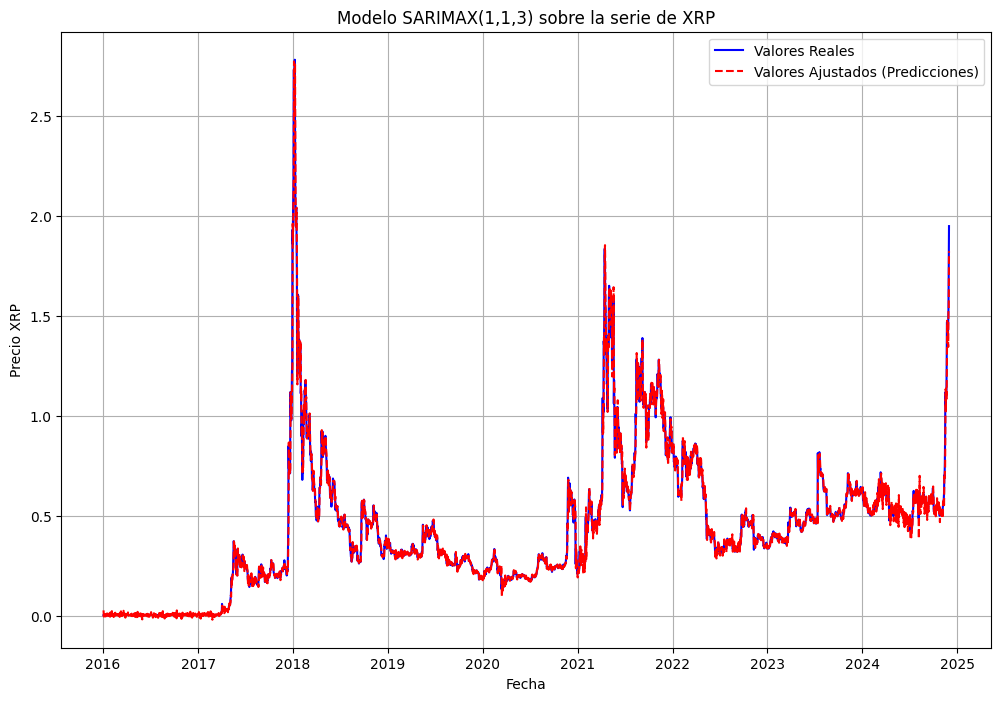

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['precio_xrp_diff'] = df['precio_xrp'].diff(1).dropna()


df = df.dropna(subset=['precio_xrp_diff'])



diff_vars = ['precio_eth', 'indice_dolar ', 'int_FED', 'volumen_eth',
             'M2', 'IPC', 'oro', 'SP500', 'eurostoxx', 'precio_btc']

for var in diff_vars:
    df.loc[:, f'{var}_diff'] = df[var].diff().dropna()


no_diff_vars = ['sentimiento', 'RSI', 'vix', 'volumen_xrp']


exog_vars = df[[f'{var}_diff' for var in diff_vars] + no_diff_vars]


df_clean = df.dropna(subset=[f'{var}_diff' for var in diff_vars] + no_diff_vars)
exog_vars_clean = exog_vars.loc[df_clean.index]


model_sarimax_xrp = SARIMAX(df_clean['precio_xrp'],
                            order=(1, 1, 3),
                            exog=exog_vars_clean)
results_sarimax_xrp = model_sarimax_xrp.fit()


print(results_sarimax_xrp.summary())


predictions = results_sarimax_xrp.predict(start=0, end=len(df_clean)-1, exog=exog_vars_clean)


rmse = np.sqrt(mean_squared_error(df_clean['precio_xrp'], predictions))
print(f"RMSE: {rmse}")


mape = mean_absolute_percentage_error(df_clean['precio_xrp'], predictions)
print(f"MAPE: {mape * 100}%")


plt.figure(figsize=(12, 8))
plt.plot(df_clean.index, df_clean['precio_xrp'], label='Valores Reales', color='blue')
plt.plot(df_clean.index, predictions, label='Valores Ajustados (Predicciones)', color='red', linestyle='--')
plt.title('Modelo SARIMAX(1,1,3) sobre la serie de XRP')
plt.xlabel('Fecha')
plt.ylabel('Precio XRP')
plt.legend()
plt.grid(True)
plt.show()

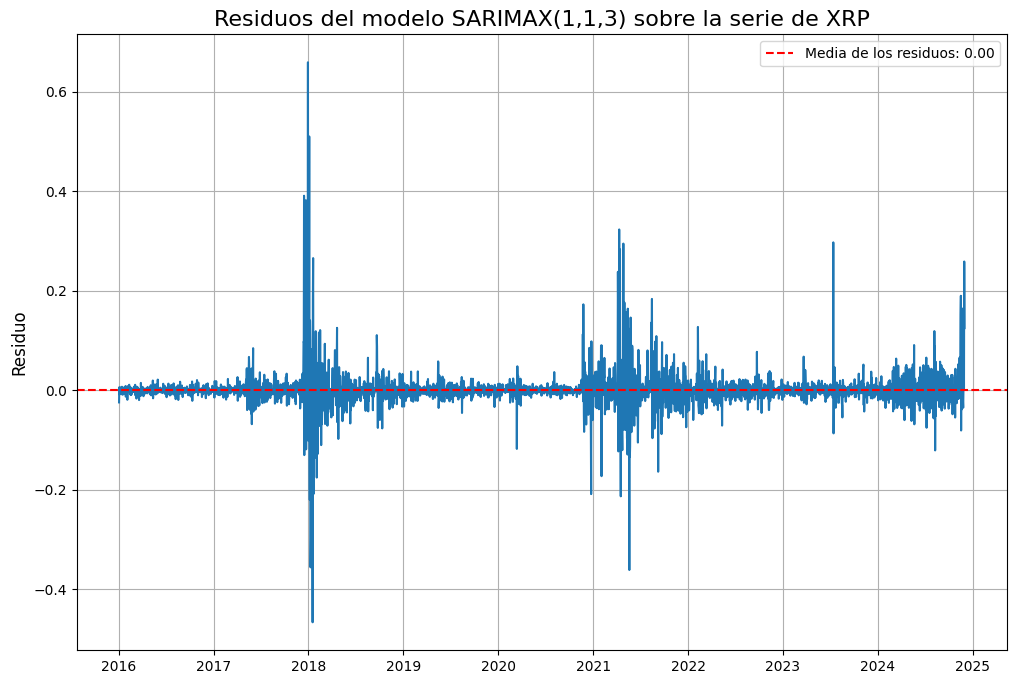

<Figure size 1400x1000 with 0 Axes>

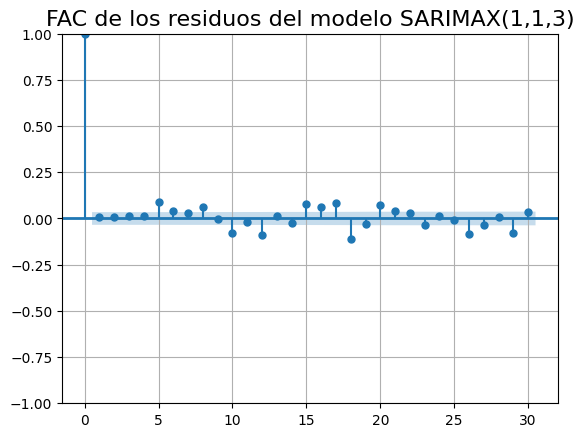

<Figure size 1400x1000 with 0 Axes>

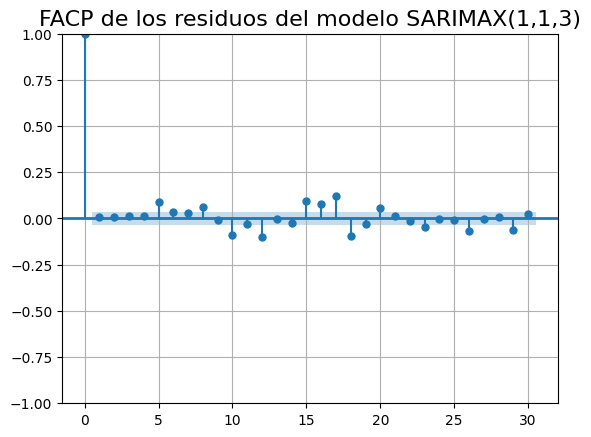

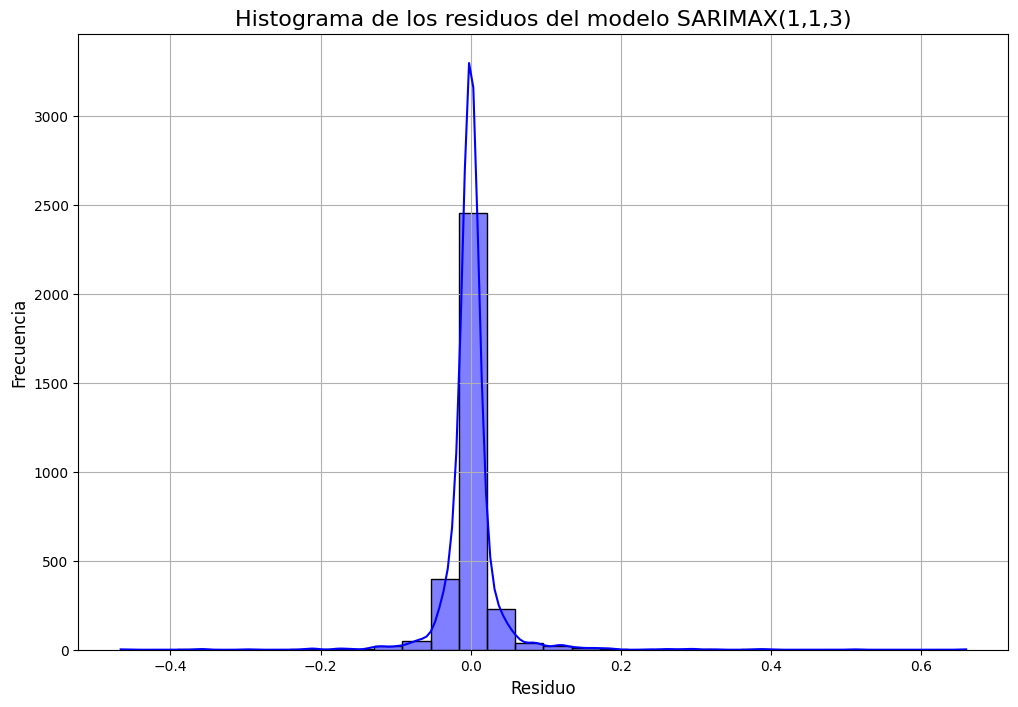

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import seaborn as sns


residuals_sarimax_xrp = results_sarimax_xrp.resid


plt.figure(figsize=(12, 8))
plt.plot(residuals_sarimax_xrp)
plt.axhline(y=residuals_sarimax_xrp.mean(), color='r', linestyle='--', label=f'Media de los residuos: {residuals_sarimax_xrp.mean():.2f}')
plt.title('Residuos del modelo SARIMAX(1,1,3) sobre la serie de XRP', fontsize=16)
plt.ylabel('Residuo', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 10))
plot_acf(residuals_sarimax_xrp, lags=30, alpha=0.05)
plt.title('FAC de los residuos del modelo SARIMAX(1,1,3)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(14, 10))
plot_pacf(residuals_sarimax_xrp, lags=30, alpha=0.05)
plt.title('FACP de los residuos del modelo SARIMAX(1,1,3)', fontsize=16)
plt.grid(True)

for line in plt.gca().lines:
    line.set_linewidth(2)
plt.show()


plt.figure(figsize=(12, 8))
sns.histplot(residuals_sarimax_xrp, kde=True, color='blue', bins=30)
plt.title('Histograma de los residuos del modelo SARIMAX(1,1,3)', fontsize=16)
plt.xlabel('Residuo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()


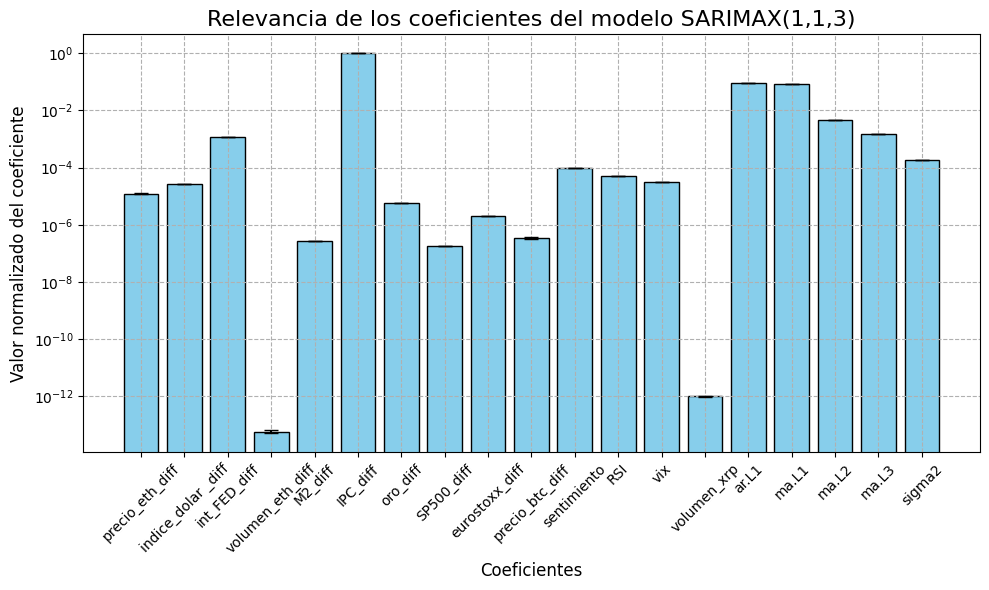

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


coefficients = results_sarimax_xrp.params
std_err = results_sarimax_xrp.bse



coefficients_abs = np.abs(coefficients)
max_value = np.max(coefficients_abs)


plt.figure(figsize=(10, 6))
plt.bar(coefficients.index, coefficients_abs / max_value, yerr=std_err / max_value, capsize=5, color='skyblue', edgecolor='black')


plt.title('Relevancia de los coeficientes del modelo SARIMAX(1,1,3)', fontsize=16)
plt.xlabel('Coeficientes', fontsize=12)
plt.ylabel('Valor normalizado del coeficiente', fontsize=12)


plt.xticks(rotation=45)
plt.yscale('log')
plt.grid(True, which="both", ls="--")


plt.tight_layout()
plt.show()



Se ha ajustado la visualizacion de coeficiente mediante un gráfico de barras normalizado y con escala logarítmica, para mejorar la comparabilidad entre coeficientes con magnitudes muy diferentes.

Todos los parametros del modelo incluidas las variables exogenas son altamente significativas con valores Z muy alejados de 1.96 y del -1.96. Se ha obtenido el AIC(-11995.601) y BIC(-11879.936) mas bajo asi como el RMSE más bajo (0.038), aunque el MAPE ha aumentado ligeramente (13.71). Se cumple con no correlacion de residuos, aunque en la FAC Y FACP parece haber retardos autocorrelacionados, pero es mas fiable el test. No se cumple con la normalidad y la asimetria es ligeramente mas alta. Se puede explicar con el correlograma. La media de los residuos es 0 y la varianza es relativamente constante aunque hay grandes picos en 2018 y 2021.

En el caso de XRP, se puede decir que añadir las variables exogenas escogidas para modelos ARIMA, aumenta la precision del ajuste.

En este caso, el modelo si que se ha aplicado sobre la serie sin logartimos porque de aplicar logaritmos el AIC( -8945.446) y el BIC(-8829.781) eran mas altos. El test de BJ era 0.53 frente a 0.73 sin logartimos por lo que habia mas probabilidad de que los residuos no estuviesen correlacionados si no es aplicaban logaritmos. Aunque todos los parametros fuesen significativos, el RMSE era de 0.111 frente al 0.038 sin logartimos y el MAPE 83651 frente al 13.717 sin aplicar logaritmos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX


archivo = "DatosTFG.xlsx"
df = pd.read_excel(archivo)


df['fecha'] = pd.to_datetime(df['fecha'])


df.set_index('fecha', inplace=True)


df['precio_xrp_diff'] = df['precio_xrp'].diff().dropna()


df = df.dropna(subset=['precio_xrp_diff'])



diff_vars = ['precio_eth', 'indice_dolar ', 'int_FED', 'volumen_eth',
             'M2', 'IPC', 'oro', 'SP500', 'eurostoxx', 'precio_btc']

for var in diff_vars:
    df[f'{var}_diff'] = df[var].diff().dropna()


no_diff_vars = ['sentimiento', 'RSI', 'vix', 'volumen_xrp']


exog_vars = df[[f'{var}_diff' for var in diff_vars] + no_diff_vars]


df_clean = df.dropna(subset=[f'{var}_diff' for var in diff_vars] + no_diff_vars)
exog_vars_clean = exog_vars.loc[df_clean.index]


model_sarimax_xrp = SARIMAX(df_clean['precio_xrp'],
                            order=(1, 1, 3),
                            exog=exog_vars_clean)
results_sarimax_xrp = model_sarimax_xrp.fit()


fechas_predicciones = pd.date_range(df_clean.index[-1], periods=6, freq='D')[1:]



exog_futuras = exog_vars_clean[-5:]


predicciones = results_sarimax_xrp.predict(start=df_clean.index[-1] + pd.Timedelta(days=1),
                                           end=df_clean.index[-1] + pd.Timedelta(days=5),
                                           exog=exog_futuras)


print("Predicciones de los próximos 5 días:")
print(predicciones)



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicciones de los próximos 5 días:
2024-12-01    1.959121
2024-12-02    1.907409
2024-12-03    1.972011
2024-12-04    1.970783
2024-12-05    1.983226
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
import pandas as pd


archivo_diciembre = "Datos reales diciembre 2024.xlsx"
df_diciembre = pd.read_excel(archivo_diciembre)


df_diciembre['fecha'] = pd.to_datetime(df_diciembre['fecha'], dayfirst=True)


df_diciembre['precio_xrp'] = df_diciembre['precio_xrp'].replace({',': ''}, regex=True).astype(float)


df_diciembre.set_index('fecha', inplace=True)


print(df_diciembre['precio_xrp'])


fecha
2024-12-01    2.2970
2024-12-02    2.7225
2024-12-03    2.5121
2024-12-04    2.3608
2024-12-05    2.2449
Name: precio_xrp, dtype: float64


PREDICCION Y DIFERENCIAS:

2024-12-01	2.2970	1.959121	0.337879	14.70%
2024-12-02	2.7225	1.907409	0.815091	29.94%
2024-12-03	2.5121	1.972011	0.540089	21.51%
2024-12-04	2.3608	1.970783	0.390017	16.52%
2024-12-05	2.2449	1.983226	0.261674	11.65%

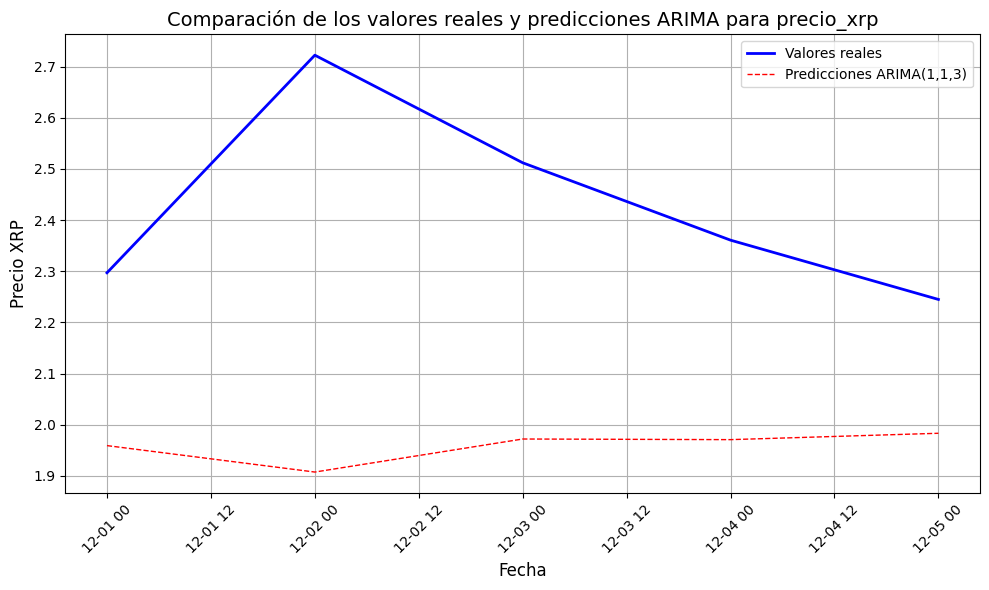

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


fechas = ['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05']
valor_real = [2.2970, 2.7225, 2.5121, 2.3608, 2.2449]


valor_predicho_arima = [1.959121, 1.907409, 1.972011, 1.970783, 1.983226]


fechas = pd.to_datetime(fechas)


plt.figure(figsize=(10, 6))


plt.plot(fechas, valor_real, label='Valores reales', color='blue', linewidth=2)


plt.plot(fechas, valor_predicho_arima, label='Predicciones ARIMA(1,1,3)', color='red', linestyle='--', linewidth=1)


plt.title('Comparación de los valores reales y predicciones ARIMA para precio_xrp', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio XRP', fontsize=12)


plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


La predicción de XRP ha sido la peor de las 3 series temporales si vemos la diferencia entre el valor real y el predicho, a pesar de que es un modelo que ha obtenido un RMSE bastante bajo (0.03), asi como un AIC bajo. Probablemente sea porque es el modelo con la asimetria de distribucion de residuos mas alta con 2.65 y la curtosis mas alta con 68.66. Esto indica que los residuos no siguen una distribucion normal sino que estan sesgados y tienes colas mas largas de lo esperado.

La asimetría sugiere que los errores del modelo están más concentrados hacia un lado, lo que implica que el modelo tiende a sobrestimar o subestimar sistemáticamente los valores predichos. Por otro lado, la curtosis alta indica que hay picos extremos en los residuos, lo cual es un signo de que el modelo no está capturando adecuadamente los eventos atípicos o las fluctuaciones repentinas, de las criptomonedas.

Se demuestra asi, que en dias con mucha fluctuacion en el precio, los modelos ARIMA no se adaptan bien a las dinámicas volátiles e impredecibles del mercado de las criptomonedas. En este caso, la variacion ha sido tanta entre el precio real y la prediccion porque las variaciones reales de estos dias fueron las siguientes y desde el 1 de noviembre hasta el 5 de diciembre hubo un 375% de variacion.

XRP
05.12.2024	-4.91%
04.12.2024	-6.02%
03.12.2024	-7.73%
02.12.2024	+18.52%
01.12.2024	+17.87%

En ETH y BTC la prediccion ha sido mejor porque la varicion en precio de esos dias fue mucho menor.

ETH
05.12.2024	-1.33%
04.12.2024	+6.12%
03.12.2024	-0.78%
02.12.2024	-1.75%
01.12.2024	+0.14%

BTC
05.12.2024	-1.69%
04.12.2024	+2.85%
03.12.2024	+0.05%
02.12.2024	-1.39%
01.12.2024	+0.83%



Evaluación en Train:
MAE: 236.74332369290866
MSE: 88354.58709645855
RMSE: 297.2449950738592
R²: 0.9996938462751611

Evaluación en Test:
MAE: 750.5999952196241
MSE: 1334902.4544588136
RMSE: 1155.3797879739864
R²: 0.9956887137987729


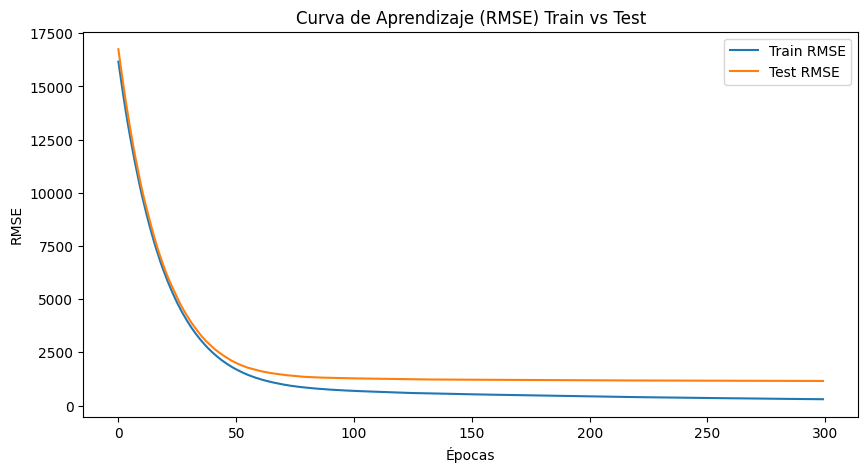

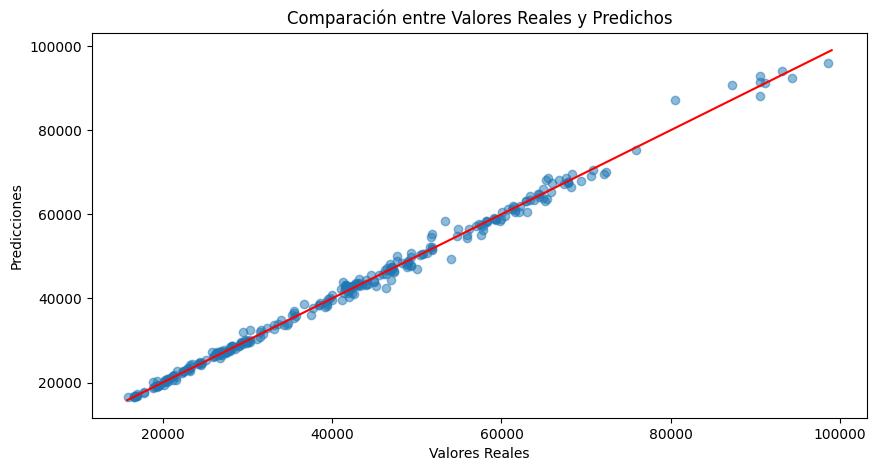

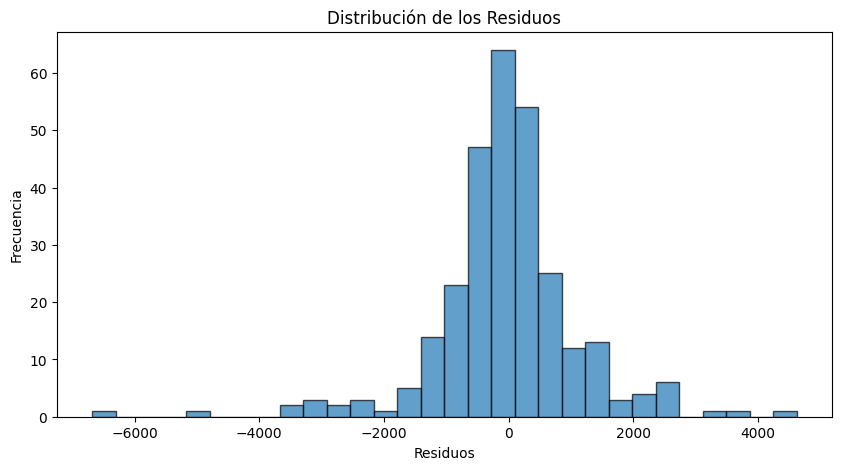

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_btc']
X = df.drop(columns=['precio_btc', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    reg_lambda=0.1,
    reg_alpha=0.1,
    subsample=0.7,
    colsample_bytree=0.7
)


evals_result = {'train': [], 'test': []}

for i in range(1, model.get_params()['n_estimators'] + 1):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    evals_result['train'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    evals_result['test'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Evaluación en Train:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")


mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nEvaluación en Test:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")


epochs = len(evals_result['train'])
x_axis = range(0, epochs)


plt.figure(figsize=(10,5))
plt.plot(x_axis, evals_result['train'], label='Train RMSE')
plt.plot(x_axis, evals_result['test'], label='Test RMSE')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizaje (RMSE) Train vs Test')
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predichos")
plt.show()


residuos = y_test - y_test_pred


plt.figure(figsize=(10,5))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.show()


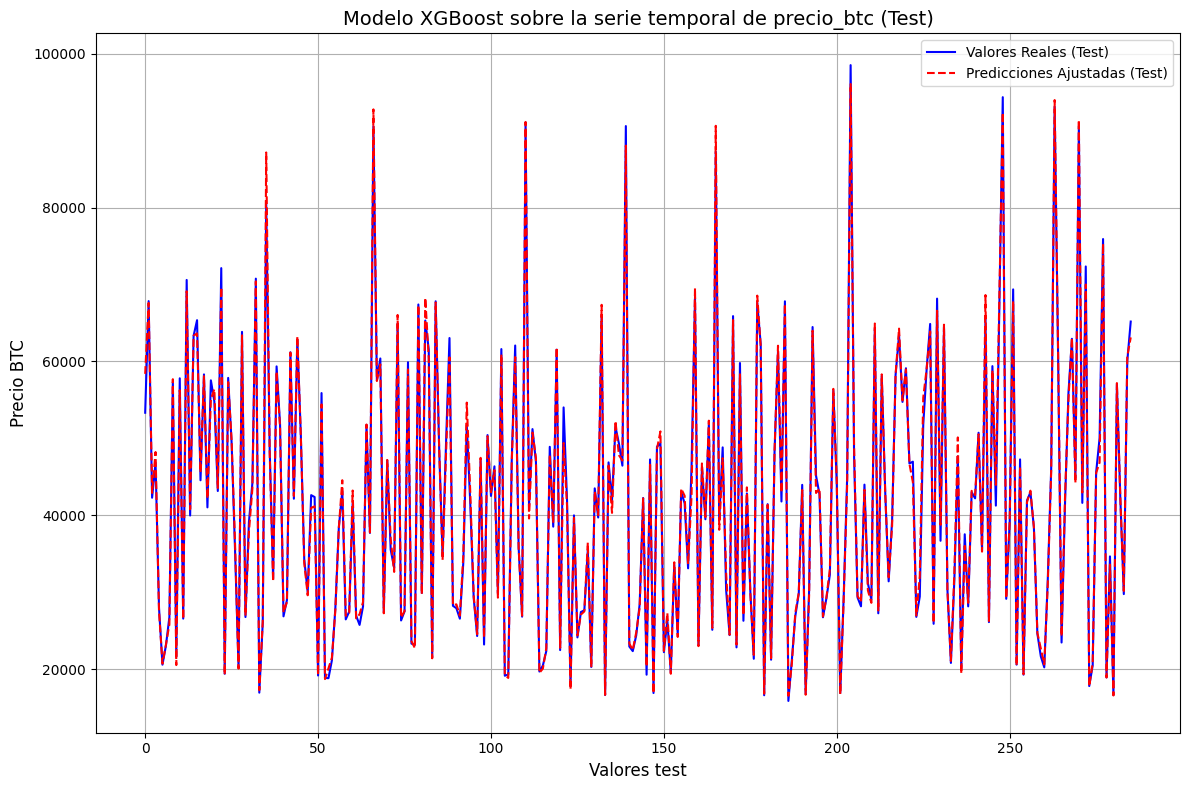

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_btc']
X = df.drop(columns=['precio_btc', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    reg_lambda=0.1,
    reg_alpha=0.1,
    subsample=0.7,
    colsample_bytree=0.7
)


model.fit(X_train, y_train)


y_test_pred = model.predict(X_test)


plt.figure(figsize=(12, 8))


plt.plot(range(len(y_test)), y_test, label='Valores Reales (Test)', color='blue')


plt.plot(range(len(y_test)), y_test_pred, label='Predicciones Ajustadas (Test)', color='red', linestyle='--')


plt.title('Modelo XGBoost sobre la serie temporal de precio_btc (Test)', fontsize=14)
plt.xlabel('Valores test', fontsize=12)
plt.ylabel('Precio BTC', fontsize=12)


plt.legend()
plt.grid(True)


plt.tight_layout()


plt.show()


[0]	validation_0-rmse:16749.06803
[1]	validation_0-rmse:15925.71890
[2]	validation_0-rmse:15150.01207
[3]	validation_0-rmse:14399.75546
[4]	validation_0-rmse:13698.47375
[5]	validation_0-rmse:13021.29309
[6]	validation_0-rmse:12390.58898
[7]	validation_0-rmse:11788.31447
[8]	validation_0-rmse:11221.46110
[9]	validation_0-rmse:10680.27002
[10]	validation_0-rmse:10168.30971
[11]	validation_0-rmse:9687.35604
[12]	validation_0-rmse:9252.87648
[13]	validation_0-rmse:8827.38362
[14]	validation_0-rmse:8410.96557
[15]	validation_0-rmse:7997.59223
[16]	validation_0-rmse:7624.77916
[17]	validation_0-rmse:7262.15919
[18]	validation_0-rmse:6933.92062
[19]	validation_0-rmse:6621.64709
[20]	validation_0-rmse:6317.36090
[21]	validation_0-rmse:6039.62407
[22]	validation_0-rmse:5777.95624
[23]	validation_0-rmse:5541.73990
[24]	validation_0-rmse:5303.55081
[25]	validation_0-rmse:5063.40235
[26]	validation_0-rmse:4829.67637
[27]	validation_0-rmse:4626.98280
[28]	validation_0-rmse:4435.29953
[29]	validati

<Figure size 1000x500 with 0 Axes>

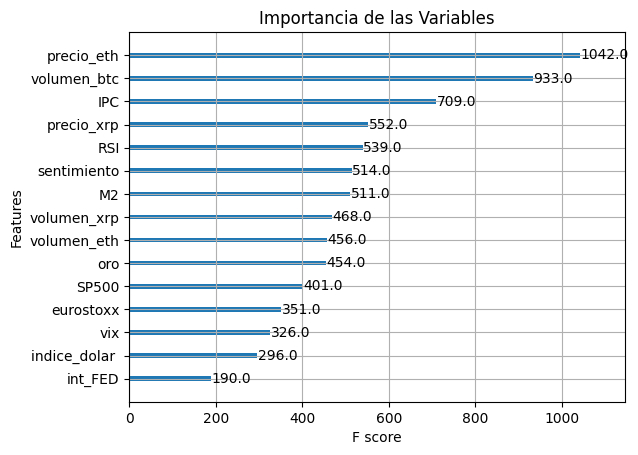

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_btc']
X = df.drop(columns=['precio_btc', 'fecha'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    reg_lambda=0.1,
    reg_alpha=0.1,
    subsample=0.7,
    colsample_bytree=0.7
)


model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


plt.figure(figsize=(10,5))
xgb.plot_importance(model)
plt.title("Importancia de las Variables")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_btc']
X = df.drop(columns=['precio_btc', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    reg_lambda=0.1,
    reg_alpha=0.1,
    subsample=0.7,
    colsample_bytree=0.7
)


model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_btc'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_btc:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_btc:
Día 1: 92182.0625
Día 2: 95757.0390625
Día 3: 96132.0390625
Día 4: 97586.9375
Día 5: 97377.1796875


In [ ]:
import pandas as pd


archivo_diciembre = "Datos reales diciembre 2024.xlsx"
df_diciembre = pd.read_excel(archivo_diciembre)


df_diciembre['fecha'] = pd.to_datetime(df_diciembre['fecha'], dayfirst=True)


df_diciembre['precio_btc'] = df_diciembre['precio_btc'].replace({',': ''}, regex=True).astype(float)


df_diciembre.set_index('fecha', inplace=True)


print(df_diciembre['precio_btc'])

fecha
2024-12-01    97201.4
2024-12-02    95846.6
2024-12-03    95898.7
2024-12-04    98635.8
2024-12-05    96970.8
Name: precio_btc, dtype: float64


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 97201.4    | 92182.06       | 5020.34     | -5.17%
2024-12-02  | 95846.6    | 95757.04       | 89.56       | -0.09%
2024-12-03  | 95898.7    | 96132.04       | -233.34     | 0.24%
2024-12-04  | 98635.8    | 97586.94       | 1048.86     | -1.07%
2024-12-05  | 96970.8    | 97377.18       | -406.38     | 0.42%


Evaluación en Train:
MAE: 236.74332369290866
MSE: 88354.58709645855
RMSE: 297.2449950738592
R²: 0.9996938462751611

Evaluación en Test:
MAE: 750.5999952196241
MSE: 1334902.4544588136
RMSE: 1155.3797879739864
R²: 0.9956887137987729

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_btc']
X = df.drop(columns=['precio_btc', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=289,
    learning_rate=0.05,
    max_depth=5,
    reg_lambda=0.11,
    reg_alpha=0.05,
    subsample=0.7,
    colsample_bytree=0.71
)


model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_btc'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_btc:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_btc:
Día 1: 92248.828125
Día 2: 95694.140625
Día 3: 96168.625
Día 4: 97406.3515625
Día 5: 97235.3046875


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 97201.4    | 92248.83       | 4975.57     | -5.09%
2024-12-02  | 95846.6    | 95694.14       | 152.46      | -0.16%
2024-12-03  | 95898.7    | 96168.63       | -269.93     | 0.28%
2024-12-04  | 98635.8    | 97406.35       | 1229.45     | -1.24%
2024-12-05  | 96970.8    | 97235.30       | -264.50     | 0.27%


Evaluación en Train:
MAE: 245.59497155676354
MSE: 95051.90377333197
RMSE: 308.30488768965694
R²: 0.9996706396877679

Evaluación en Test:
MAE: 762.6270316597465
MSE: 1364318.7981930613
RMSE: 1168.0405807132993
R²: 0.9955937088967979

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_btc']
X = df.drop(columns=['precio_btc', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=319,
    learning_rate= 0.06,
    max_depth=6,
    reg_lambda=0.13,
    reg_alpha=0.27,
    subsample=0.63,
    colsample_bytree=0.81
)


model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_btc'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_btc:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_btc:
Día 1: 92065.3828125
Día 2: 95055.9375
Día 3: 95213.3515625
Día 4: 96532.578125
Día 5: 96464.2890625


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 97201.4    | 92065.38       | 5145.02     | -5.30%
2024-12-02  | 95846.6    | 95055.94       | 790.66      | -0.83%
2024-12-03  | 95898.7    | 95213.35       | 685.35      | -0.72%
2024-12-04  | 98635.8    | 96532.58       | 2103.22     | -2.13%
2024-12-05  | 96970.8    | 96464.29       | 506.51      | -0.52%

Evaluación en Train:
MAE: 74.6167026333042
MSE: 8448.320496825905
RMSE: 91.91474580732901
R²: 0.9999707260836846

Evaluación en Test:
MAE: 702.4953596208479
MSE: 1118192.2246276916
RMSE: 1057.4460859200774
R²: 0.9963886149941111

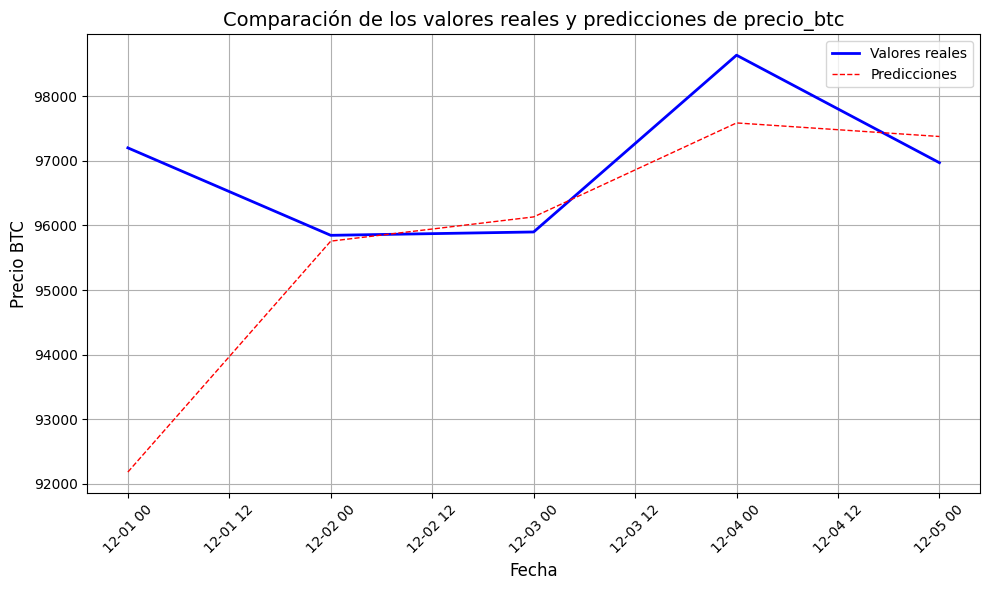

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


fechas = pd.to_datetime(['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05'])
valor_real = [97201, 95847, 95899, 98636, 96971]


valor_predicho = [92182, 95757, 96132, 97587, 97377]


plt.figure(figsize=(10, 6))


plt.plot(fechas, valor_real, label='Valores reales', color='blue', linewidth=2)


plt.plot(fechas, valor_predicho, label='Predicciones', color='red', linestyle='--', linewidth=1)


plt.title('Comparación de los valores reales y predicciones de precio_btc', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio BTC', fontsize=12)


plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


Evaluación en Train:
MAE: 13.594370168405804
MSE: 292.6934055480649
RMSE: 17.108284705021276
R²: 0.9996137827902083

Evaluación en Test:
MAE: 63.39251111437388
MSE: 9184.952540076432
RMSE: 95.83815805865862
R²: 0.9865238236500713


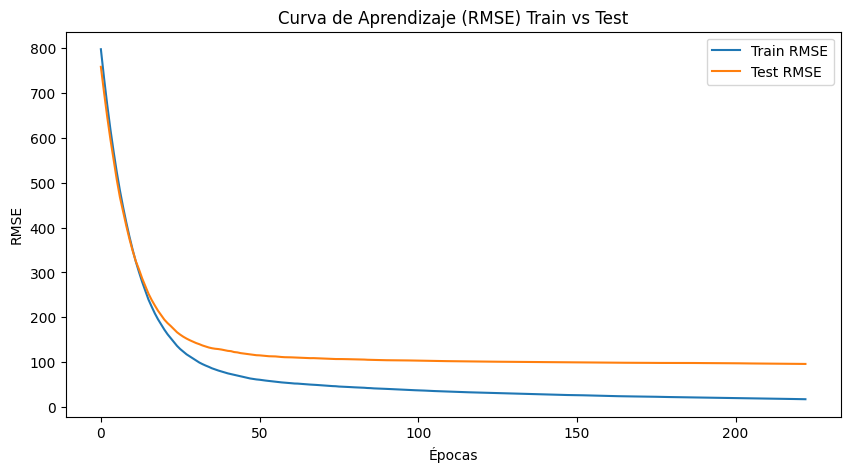

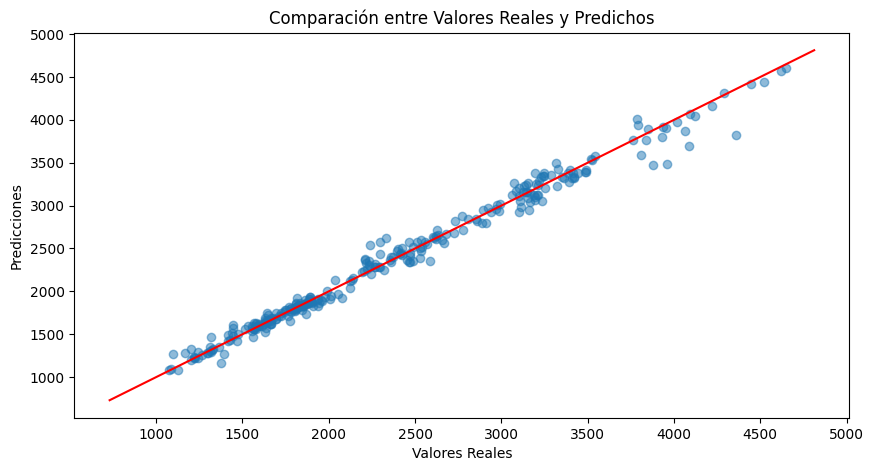

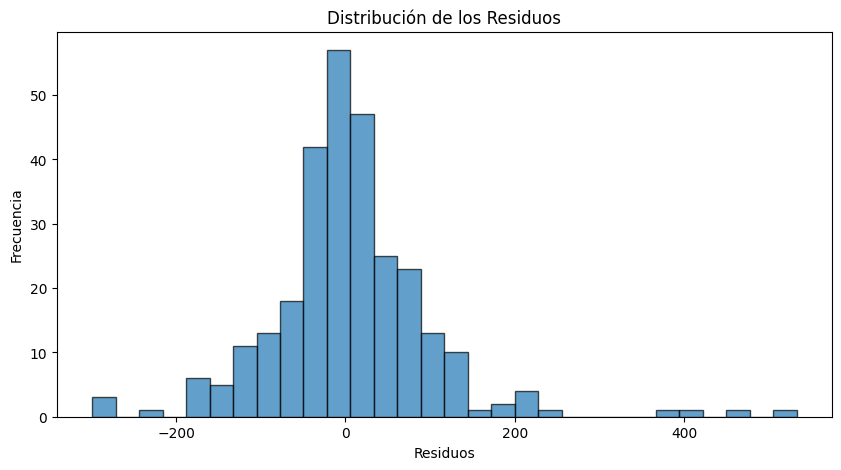

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.preprocessing import StandardScaler

df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_eth']
X = df.drop(columns=['precio_eth', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=223,
    learning_rate=0.09,
    max_depth=5,
    reg_lambda=0.14,
    reg_alpha=0.011,
    subsample=0.82,
    colsample_bytree=0.98
)


evals_result = {'train': [], 'test': []}

for i in range(1, model.get_params()['n_estimators'] + 1):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    evals_result['train'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    evals_result['test'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Evaluación en Train:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")


mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nEvaluación en Test:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")


epochs = len(evals_result['train'])
x_axis = range(0, epochs)


plt.figure(figsize=(10,5))
plt.plot(x_axis, evals_result['train'], label='Train RMSE')
plt.plot(x_axis, evals_result['test'], label='Test RMSE')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizaje (RMSE) Train vs Test')
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predichos")
plt.show()


residuos = y_test - y_test_pred


plt.figure(figsize=(10,5))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.show()


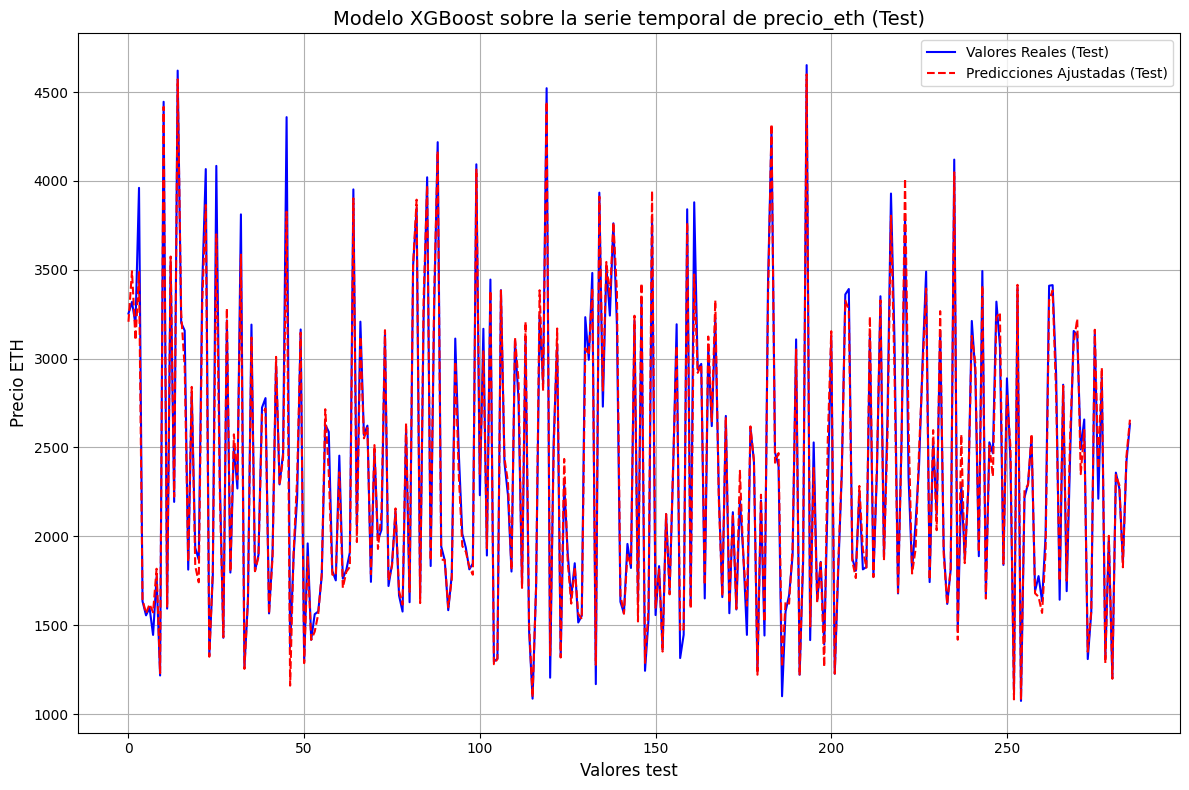

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_eth']
X = df.drop(columns=['precio_eth', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=223,
    learning_rate=0.09,
    max_depth=5,
    reg_lambda=0.14,
    reg_alpha=0.011,
    subsample=0.82,
    colsample_bytree=0.98
)


model.fit(X_train, y_train)


y_test_pred = model.predict(X_test)


plt.figure(figsize=(12, 8))


plt.plot(range(len(y_test)), y_test, label='Valores Reales (Test)', color='blue')


plt.plot(range(len(y_test)), y_test_pred, label='Predicciones Ajustadas (Test)', color='red', linestyle='--')


plt.title('Modelo XGBoost sobre la serie temporal de precio_eth (Test)', fontsize=14)
plt.xlabel('Valores test', fontsize=12)
plt.ylabel('Precio ETH', fontsize=12)


plt.legend()
plt.grid(True)


plt.tight_layout()


plt.show()


[0]	validation_0-rmse:758.83332
[1]	validation_0-rmse:701.69140
[2]	validation_0-rmse:647.13248
[3]	validation_0-rmse:597.28759
[4]	validation_0-rmse:553.08446
[5]	validation_0-rmse:507.39195
[6]	validation_0-rmse:467.98774
[7]	validation_0-rmse:435.92741
[8]	validation_0-rmse:404.20118
[9]	validation_0-rmse:374.81902
[10]	validation_0-rmse:348.65670
[11]	validation_0-rmse:325.24338
[12]	validation_0-rmse:307.00198
[13]	validation_0-rmse:286.89761
[14]	validation_0-rmse:269.55526
[15]	validation_0-rmse:252.58244
[16]	validation_0-rmse:238.63817
[17]	validation_0-rmse:226.28416
[18]	validation_0-rmse:214.61080
[19]	validation_0-rmse:204.61876
[20]	validation_0-rmse:194.67231
[21]	validation_0-rmse:187.02515
[22]	validation_0-rmse:180.55996
[23]	validation_0-rmse:173.61871
[24]	validation_0-rmse:166.49635
[25]	validation_0-rmse:161.15987
[26]	validation_0-rmse:156.42748
[27]	validation_0-rmse:152.38231
[28]	validation_0-rmse:148.80187
[29]	validation_0-rmse:145.51342
[30]	validation_0-rm

<Figure size 1000x500 with 0 Axes>

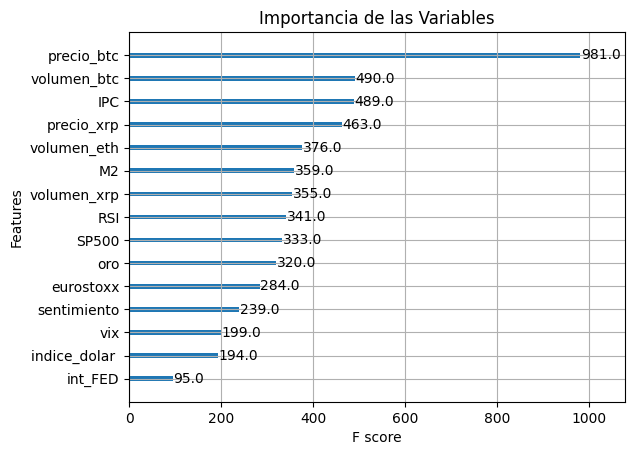

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_eth']
X = df.drop(columns=['precio_eth', 'fecha'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=223,
    learning_rate=0.09,
    max_depth=5,
    reg_lambda=0.14,
    reg_alpha=0.011,
    subsample=0.82,
    colsample_bytree=0.98
)


model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


plt.figure(figsize=(10,5))
xgb.plot_importance(model)
plt.title("Importancia de las Variables")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_eth']
X = df.drop(columns=['precio_eth', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    reg_lambda=0.1,
    reg_alpha=0.05,
    subsample=0.8,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_eth'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_eth:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_eth:
Día 1: 3369.701416015625
Día 2: 3645.999755859375
Día 3: 3561.483154296875
Día 4: 3555.956298828125
Día 5: 3705.75048828125


In [ ]:
import pandas as pd


archivo_diciembre = "Datos reales diciembre 2024.xlsx"
df_diciembre = pd.read_excel(archivo_diciembre)


df_diciembre['fecha'] = pd.to_datetime(df_diciembre['fecha'], dayfirst=True)


df_diciembre['precio_eth'] = df_diciembre['precio_eth'].replace({',': ''}, regex=True).astype(float)


df_diciembre.set_index('fecha', inplace=True)


print(df_diciembre['precio_eth'])

fecha
2024-12-01    3708.33
2024-12-02    3643.48
2024-12-03    3615.07
2024-12-04    3836.25
2024-12-05    3785.10
Name: precio_eth, dtype: float64


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 3708.33    | 3369.70        | 338.63      | -8.61%
2024-12-02  | 3643.48    | 3646.00        | -2.52       | 0.07%
2024-12-03  | 3615.07    | 3561.48        | 53.59       | -1.48%
2024-12-04  | 3836.25    | 3555.96        | 280.29      | -7.31%
2024-12-05  | 3785.10    | 3705.75        | 79.35       | -2.09%

Evaluación en Train:
MAE: 25.662070427741202
MSE: 1094.5522159190352
RMSE: 33.08401752990461
R²: 0.9985557074577337

Evaluación en Test:
MAE: 68.69427703644011
MSE: 9004.762487709311
RMSE: 94.89342699949934
R²: 0.9867881987692247

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_eth']
X = df.drop(columns=['precio_eth', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=250,
    learning_rate=0.05,
    max_depth=6,
    reg_lambda=0.1,
    reg_alpha=0.05,
    subsample=0.7,
    colsample_bytree=0.8
)

model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_eth'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_eth:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_eth:
Día 1: 3344.115234375
Día 2: 3645.54150390625
Día 3: 3590.591796875
Día 4: 3586.747314453125
Día 5: 3695.71533203125


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 3708.33    | 3344.12        | 364.21      | -9.84%
2024-12-02  | 3643.48    | 3645.54        | -2.06       | 0.06%
2024-12-03  | 3615.07    | 3590.59        | 24.48       | -0.68%
2024-12-04  | 3836.25    | 3586.75        | 249.50      | -6.50%
2024-12-05  | 3785.10    | 3695.72        | 89.38       | -2.36%

Evaluación en Train:
MAE: 11.944256335705306
MSE: 219.62030659755345
RMSE: 14.819591984854153
R²: 0.9997102048067367

Evaluación en Test:
MAE: 61.42874337576486
MSE: 8538.706249287075
RMSE: 92.40512025470815
R²: 0.9874719971917597

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_eth']
X = df.drop(columns=['precio_eth', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=223,
    learning_rate=0.09,
    max_depth=5,
    reg_lambda=0.14,
    reg_alpha=0.011,
    subsample=0.82,
    colsample_bytree=0.98
)

model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_eth'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_eth:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_eth:
Día 1: 3331.0830078125
Día 2: 3645.903564453125
Día 3: 3587.39794921875
Día 4: 3589.606201171875
Día 5: 3703.230224609375


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 3708.33    | 3331.08        | 377.25      | -10.14%
2024-12-02  | 3643.48    | 3645.90        | -2.42       | 0.07%
2024-12-03  | 3615.07    | 3587.40        | 27.67       | -0.77%
2024-12-04  | 3836.25    | 3589.61        | 246.64      | -6.42%
2024-12-05  | 3785.10    | 3703.23        | 81.87       | -2.16%

Evaluación en Train:
MAE: 12.552693987226151
MSE: 252.25801361208585
RMSE: 15.882632452212883
R²: 0.9996671384311429

Evaluación en Test:
MAE: 62.179848837685725
MSE: 8620.016972092688
RMSE: 92.84404650860866
R²: 0.9873526979754723

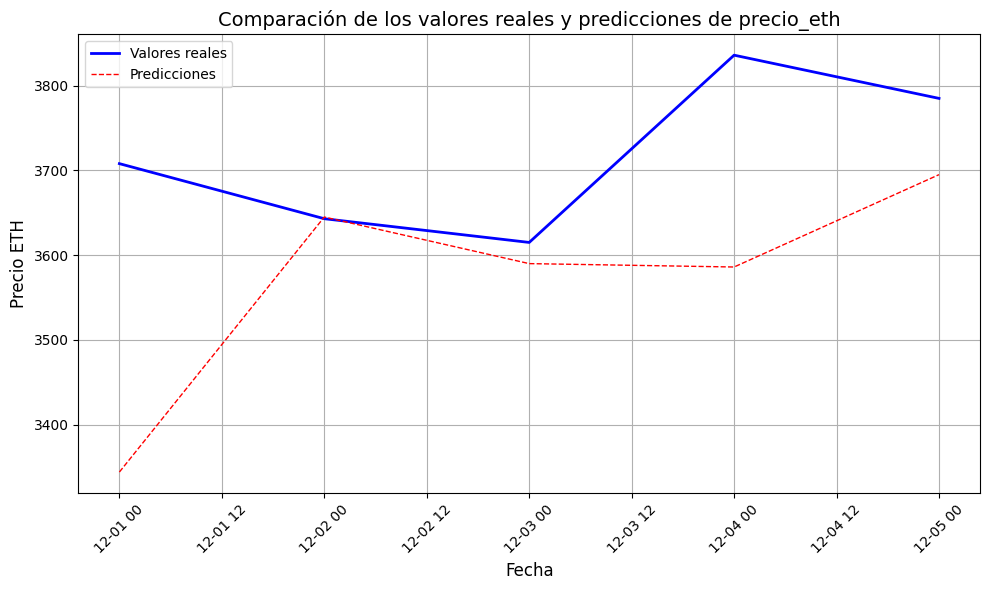

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


fechas_nuevas = pd.to_datetime(['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05'])
valor_real_nuevos = [3708, 3643, 3615, 3836, 3785]


valor_predicho_nuevos = [3344, 3645, 3590, 3586, 3695]


plt.figure(figsize=(10, 6))


plt.plot(fechas_nuevas, valor_real_nuevos, label='Valores reales', color='blue', linewidth=2)


plt.plot(fechas_nuevas, valor_predicho_nuevos, label='Predicciones', color='red', linestyle='--', linewidth=1)


plt.title('Comparación de los valores reales y predicciones de precio_eth', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio ETH', fontsize=12)


plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


Evaluación en Train:
MAE: 0.010477149474586497
MSE: 0.0002554287418237842
RMSE: 0.015982138211884673
R²: 0.9977366543929398

Evaluación en Test:
MAE: 0.020473343131120997
MSE: 0.002086006750925777
RMSE: 0.04567282289201946
R²: 0.9815221514018483


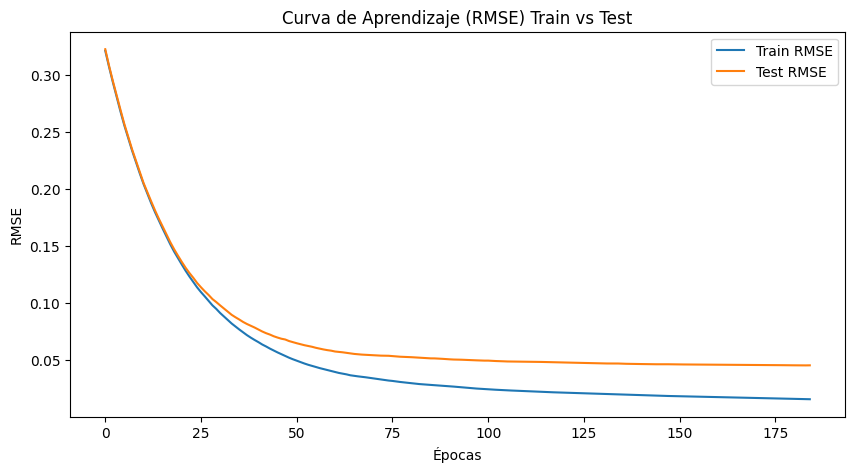

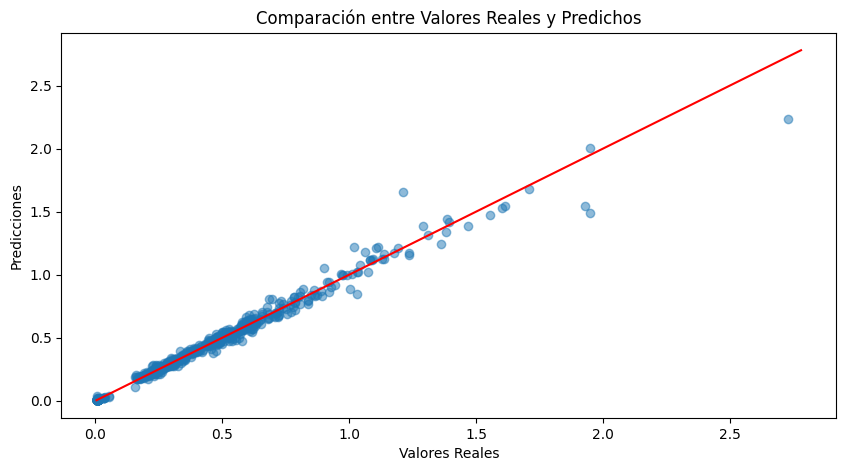

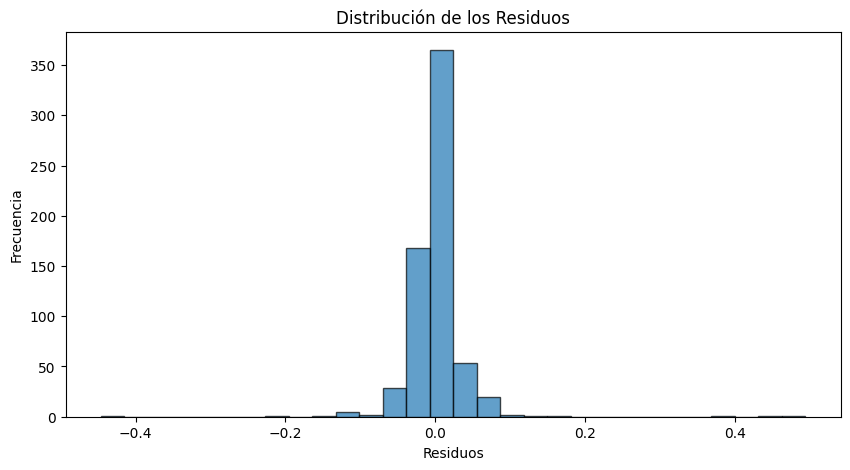

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


y = df['precio_xrp']
X = df.drop(columns=['precio_xrp', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=185,
    learning_rate=0.05,
    max_depth=7,
    reg_lambda=1.16,
    reg_alpha=0.03,
    subsample=0.62,
    colsample_bytree=0.70
)


evals_result = {'train': [], 'test': []}

for i in range(1, model.get_params()['n_estimators'] + 1):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    evals_result['train'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    evals_result['test'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Evaluación en Train:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")


mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nEvaluación en Test:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")


epochs = len(evals_result['train'])
x_axis = range(0, epochs)


plt.figure(figsize=(10,5))
plt.plot(x_axis, evals_result['train'], label='Train RMSE')
plt.plot(x_axis, evals_result['test'], label='Test RMSE')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizaje (RMSE) Train vs Test')
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación entre Valores Reales y Predichos")
plt.show()


residuos = y_test - y_test_pred


plt.figure(figsize=(10,5))
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Residuos')
plt.show()


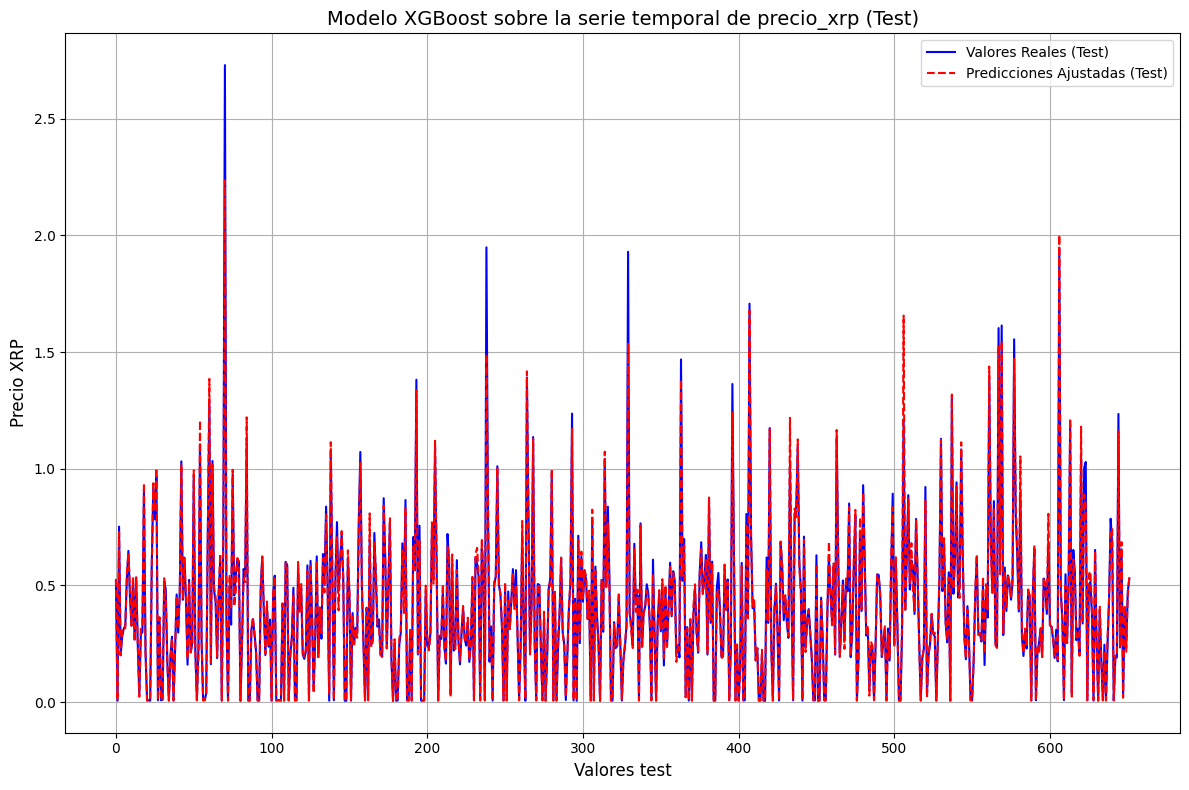

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


y = df['precio_xrp']
X = df.drop(columns=['precio_xrp', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=185,
    learning_rate=0.05,
    max_depth=7,
    reg_lambda=1.16,
    reg_alpha=0.03,
    subsample=0.62,
    colsample_bytree=0.70
)



model.fit(X_train, y_train)


y_test_pred = model.predict(X_test)


plt.figure(figsize=(12, 8))


plt.plot(range(len(y_test)), y_test, label='Valores Reales (Test)', color='blue')


plt.plot(range(len(y_test)), y_test_pred, label='Predicciones Ajustadas (Test)', color='red', linestyle='--')


plt.title('Modelo XGBoost sobre la serie temporal de precio_xrp (Test)', fontsize=14)
plt.xlabel('Valores test', fontsize=12)
plt.ylabel('Precio XRP', fontsize=12)


plt.legend()
plt.grid(True)


plt.tight_layout()


plt.show()


[0]	validation_0-rmse:0.32255
[1]	validation_0-rmse:0.30793
[2]	validation_0-rmse:0.29449
[3]	validation_0-rmse:0.28172
[4]	validation_0-rmse:0.26916
[5]	validation_0-rmse:0.25681
[6]	validation_0-rmse:0.24594
[7]	validation_0-rmse:0.23488
[8]	validation_0-rmse:0.22506
[9]	validation_0-rmse:0.21510
[10]	validation_0-rmse:0.20538
[11]	validation_0-rmse:0.19720
[12]	validation_0-rmse:0.18923
[13]	validation_0-rmse:0.18136
[14]	validation_0-rmse:0.17405
[15]	validation_0-rmse:0.16717
[16]	validation_0-rmse:0.16022
[17]	validation_0-rmse:0.15338
[18]	validation_0-rmse:0.14720
[19]	validation_0-rmse:0.14162
[20]	validation_0-rmse:0.13621
[21]	validation_0-rmse:0.13106
[22]	validation_0-rmse:0.12636
[23]	validation_0-rmse:0.12222
[24]	validation_0-rmse:0.11769
[25]	validation_0-rmse:0.11365
[26]	validation_0-rmse:0.11011
[27]	validation_0-rmse:0.10689
[28]	validation_0-rmse:0.10334
[29]	validation_0-rmse:0.10070
[30]	validation_0-rmse:0.09781
[31]	validation_0-rmse:0.09508
[32]	validation_0-

<Figure size 1000x500 with 0 Axes>

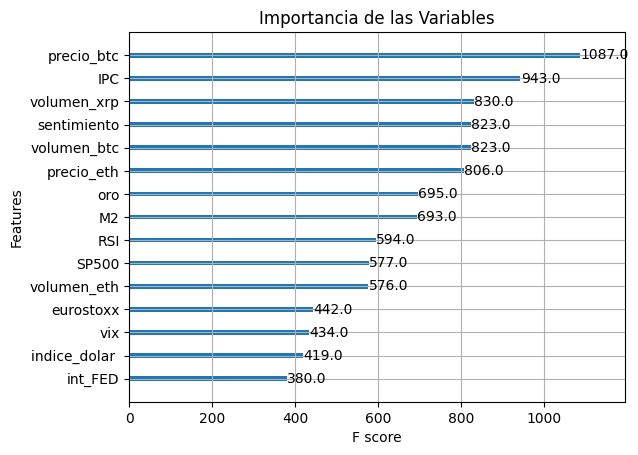

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


y = df['precio_xrp']
X = df.drop(columns=['precio_xrp', 'fecha'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=185,
    learning_rate=0.05,
    max_depth=7,
    reg_lambda=1.16,
    reg_alpha=0.03,
    subsample=0.62,
    colsample_bytree=0.70
)



model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


plt.figure(figsize=(10,5))
xgb.plot_importance(model)
plt.title("Importancia de las Variables")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


df = df[df['fecha'] >= '2021-01-01']


y = df['precio_xrp']
X = df.drop(columns=['precio_xrp', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=185,
    learning_rate=0.05,
    max_depth=7,
    reg_lambda=1.16,
    reg_alpha=0.03,
    subsample=0.62,
    colsample_bytree=0.70
)

model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_xrp'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_xrp:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_xrp:
Día 1: 1.407808542251587
Día 2: 1.0497474670410156
Día 3: 1.161221981048584
Día 4: 1.232722520828247
Día 5: 1.3598201274871826


In [ ]:
import pandas as pd


archivo_diciembre = "Datos reales diciembre 2024.xlsx"
df_diciembre = pd.read_excel(archivo_diciembre)


df_diciembre['fecha'] = pd.to_datetime(df_diciembre['fecha'], dayfirst=True)


df_diciembre['precio_xrp'] = df_diciembre['precio_xrp'].replace({',': ''}, regex=True).astype(float)


df_diciembre.set_index('fecha', inplace=True)


print(df_diciembre['precio_xrp'])

fecha
2024-12-01    2.2970
2024-12-02    2.7225
2024-12-03    2.5121
2024-12-04    2.3608
2024-12-05    2.2449
Name: precio_xrp, dtype: float64


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 2.2970     | 1.4078         | 0.8892      | -38.68%
2024-12-02  | 2.7225     | 1.0497         | 1.6728      | -61.39%
2024-12-03  | 2.5121     | 1.1612         | 1.3509      | -53.75%
2024-12-04  | 2.3608     | 1.2327         | 1.1281      | -47.76%
2024-12-05  | 2.2449     | 1.3598         | 0.8851      | -39.36%

Evaluación en Train:
MAE: 0.009248725093640648
MSE: 0.00016626023097787964
RMSE: 0.012894193692429149
R²: 0.9977497286988963

Evaluación en Test:
MAE: 0.0276642240530961
MSE: 0.0026813977095534436
RMSE: 0.05178221422026528
R²: 0.9581159619843475

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])


y = df['precio_xrp']
X = df.drop(columns=['precio_xrp', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=185,
    learning_rate=0.05,
    max_depth=7,
    reg_lambda=1.16,
    reg_alpha=0.03,
    subsample=0.62,
    colsample_bytree=0.70
)

model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_xrp'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_xrp:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_xrp:
Día 1: 1.4069123268127441
Día 2: 1.2390590906143188
Día 3: 1.2693896293640137
Día 4: 1.3968225717544556
Día 5: 1.2459899187088013


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 2.2970     | 1.4069         | 0.8901      | -38.74%
2024-12-02  | 2.7225     | 1.2391         | 1.4834      | -54.51%
2024-12-03  | 2.5121     | 1.2694         | 1.2427      | -49.47%
2024-12-04  | 2.3608     | 1.3968         | 0.9640      | -40.85%
2024-12-05  | 2.2449     | 1.2460         | 0.9989      | -44.47%

Evaluación en Train:
MAE: 0.010477149474586497
MSE: 0.0002554287418237842
RMSE: 0.015982138211884673
R²: 0.9977366543929398

Evaluación en Test:
MAE: 0.020473343131120997
MSE: 0.002086006750925777
RMSE: 0.04567282289201946
R²: 0.9815221514018483

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


df = pd.read_excel("DatosTFG.xlsx")


df['fecha'] = pd.to_datetime(df['fecha'])

df = df[df['fecha'] >= '2018-01-01']


y = df['precio_xrp']
X = df.drop(columns=['precio_xrp', 'fecha'])


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    reg_lambda=0,
    reg_alpha=0,
    subsample=0.7,
    colsample_bytree=0.6
)

model.fit(X_train, y_train)



df_nuevos_datos = df.iloc[-5:]


X_nuevos_datos = df_nuevos_datos.drop(columns=['fecha', 'precio_xrp'])


X_nuevos_datos_normalized = scaler.transform(X_nuevos_datos)


predicciones_5_dias = []
for i in range(5):
    pred = model.predict(X_nuevos_datos_normalized[i].reshape(1, -1))
    predicciones_5_dias.append(pred[0])


    if i < 4:
        X_nuevos_datos_normalized[i + 1][0] = pred[0]


print("Predicciones para los próximos 5 días de precio_xrp:")
for i, pred in enumerate(predicciones_5_dias):
    print(f"Día {i+1}: {pred}")


Predicciones para los próximos 5 días de precio_xrp:
Día 1: 1.3877607583999634
Día 2: 1.1976569890975952
Día 3: 1.0501129627227783
Día 4: 1.0747343301773071
Día 5: 1.1116211414337158


Fecha       | Valor Real | Valor Predicho | Diferencia  | Variación (%)
2024-12-01  | 2.2970     | 1.3878         | 0.9092      | -39.64%
2024-12-02  | 2.7225     | 1.1977         | 1.5248      | -55.96%
2024-12-03  | 2.5121     | 1.0501         | 1.4620      | -58.24%
2024-12-04  | 2.3608     | 1.0747         | 1.2861      | -54.44%
2024-12-05  | 2.2449     | 1.1116         | 1.1333      | -50.52%

Evaluación en Train:
MAE: 0.012116380256166553
MSE: 0.00025181629663961085
RMSE: 0.015868720699527446
R²: 0.9974094703564025

Evaluación en Test:
MAE: 0.029857291813942755
MSE: 0.0030907669129474047
RMSE: 0.055594666227502476
R²: 0.962377088089851

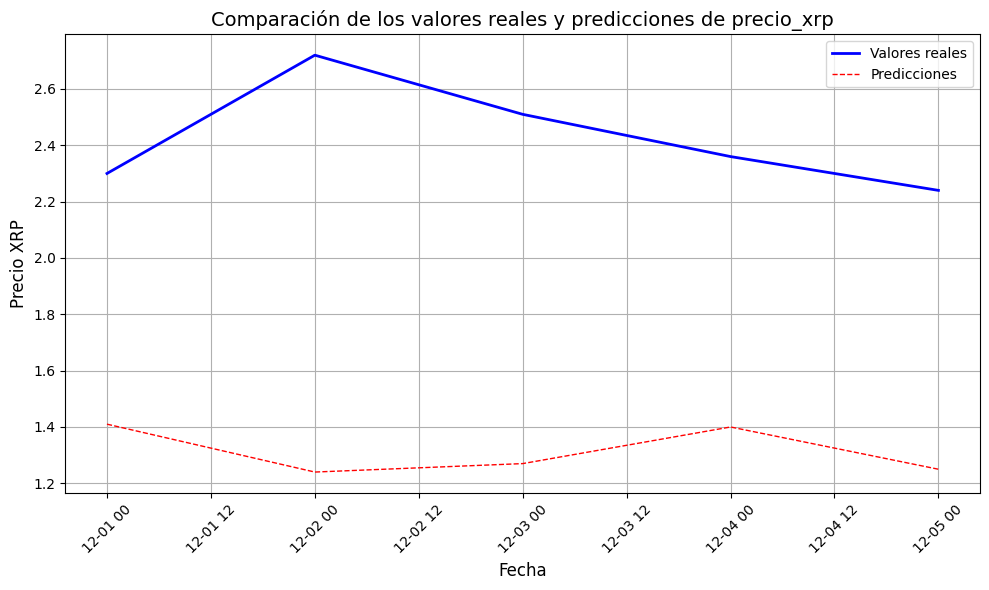

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


fechas_nuevas = pd.to_datetime(['2024-12-01', '2024-12-02', '2024-12-03', '2024-12-04', '2024-12-05'])
valor_real_nuevos = [2.30, 2.72, 2.51, 2.36, 2.24]


valor_predicho_nuevos = [1.41, 1.24, 1.27, 1.40, 1.25]


plt.figure(figsize=(10, 6))


plt.plot(fechas_nuevas, valor_real_nuevos, label='Valores reales', color='blue', linewidth=2)


plt.plot(fechas_nuevas, valor_predicho_nuevos, label='Predicciones', color='red', linestyle='--', linewidth=1)


plt.title('Comparación de los valores reales y predicciones de precio_xrp', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio XRP', fontsize=12)


plt.legend()
plt.grid(True)


plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


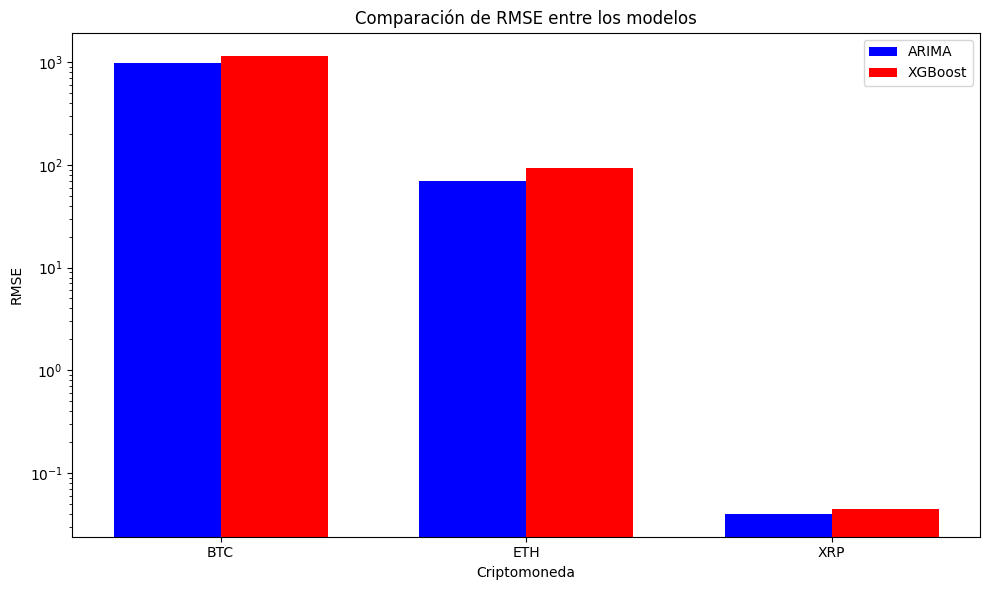

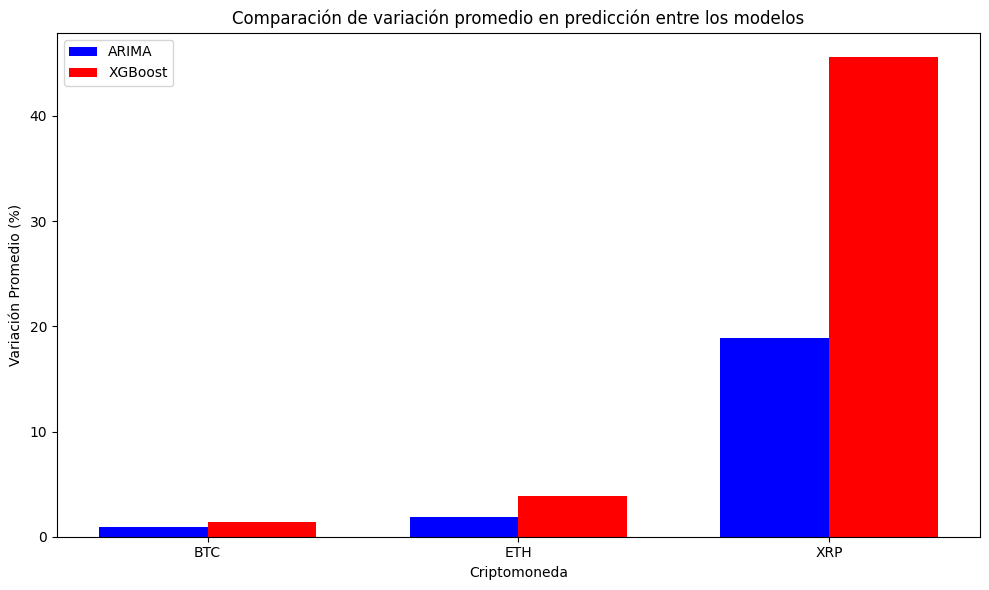

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = {
    'Criptomoneda': ['BTC', 'ETH', 'XRP'],
    'RMSE_ARIMA': [986.58, 69.95, 0.04],
    'RMSE_XGBoost': [1155.37, 92.4, 0.045],
    'Var_promedio_ARIMA': [0.93, 1.91, 18.86],
    'Var_promedio_XGBoost': [1.40, 3.89, 45.61]
}


df = pd.DataFrame(data)


plt.figure(figsize=(10, 6))
x = np.arange(len(df['Criptomoneda']))
width = 0.35


plt.bar(x - width/2, df['RMSE_ARIMA'], width, label='ARIMA', color='blue')
plt.bar(x + width/2, df['RMSE_XGBoost'], width, label='XGBoost', color='red')

plt.xlabel('Criptomoneda')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre los modelos')
plt.xticks(x, df['Criptomoneda'])
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))


plt.bar(x - width/2, df['Var_promedio_ARIMA'], width, label='ARIMA', color='blue')
plt.bar(x + width/2, df['Var_promedio_XGBoost'], width, label='XGBoost', color='red')

plt.xlabel('Criptomoneda')
plt.ylabel('Variación Promedio (%)')
plt.title('Comparación de variación promedio en predicción entre los modelos')
plt.xticks(x, df['Criptomoneda'])
plt.legend()
plt.tight_layout()
plt.show()
